In [1]:
import numpy as np
import pandas as pd
import polars as pl
import sys
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px


pd.set_option('display.max_columns',None)
import psycopg2


#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
import os
import pandas as pd

# Function to perform the matching and save the result as a TSV file
def process_file(input_path, output_path, df_gene):
    vcf = pd.read_csv(input_path, sep="\t", low_memory=False)
    
    replacements = {'0/1': 'HET', '1/1': 'HOM'}
    vcf['Zygosity'] = vcf['GT'].replace(replacements)
    vcf = vcf[['ID', 'INFO', 'Zygosity']]
    
    vcf["Gene_Name"] = vcf["INFO"].str.extract('GENEINFO=(?P<GENEINFO>.+?);')
    vcf['Gene'] = vcf['Gene_Name'].apply(lambda x: ','.join([segment.split(':')[0] for segment in x.split('|')]) if pd.notnull(x) else '')
    
    vcf['Gene_Match'] = 'No'
    vcf['Matched_Gene'] = ''
    
    # Iterate through each gene in vcf['Gene']
    for index, genes in vcf['Gene'].iteritems():
        if isinstance(genes, str):
            gene_list = genes.split(',')
            for gene in gene_list:
                if gene in df_gene['Gene'].values:
                    vcf.at[index, 'Gene_Match'] = 'Yes'
                    vcf.at[index, 'Matched_Gene'] = gene
                    break
    
    matched = vcf[vcf['Gene_Match'] == 'Yes']
    
    # Save the matched output as a TSV file in the specified output_path
    matched_output_filename = os.path.join(output_path, os.path.basename(input_path).replace('.tsv', '_matched.tsv'))
    matched.to_csv(matched_output_filename, sep="\t", index=False)

# Load the genes from the Excel file
df_gene = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Desktop/MODY_genes.xlsx')

# Set the input and output folder paths
input_folder = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/COVERED_TSV/Covered_new/'
output_folder = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/COVERED_TSV/Matched_output/'

# Iterate through each TSV file in the input folder and process it
for filename in os.listdir(input_folder):
    if filename.endswith('.tsv'):
        input_file_path = os.path.join(input_folder, filename)
        process_file(input_file_path, output_folder, df_gene)

print("Matching and saving process completed.")

In [3]:
import os
import pandas as pd

# Function to perform the matching and save the result as a TSV file
def process_file(input_path, output_path, df_gene, sample_name):
    vcf = pd.read_csv(input_path, sep="\t", low_memory=False)
    
    replacements = {'0/1': 'HET', '1/1': 'HOM'}
    vcf['Zygosity'] = vcf['GT'].replace(replacements)
    vcf = vcf[['ID', 'INFO', 'Zygosity']]
    
    vcf["Gene_Name"] = vcf["INFO"].str.extract('GENEINFO=(?P<GENEINFO>.+?);')
    vcf['Gene'] = vcf['Gene_Name'].apply(lambda x: ','.join([segment.split(':')[0] for segment in x.split('|')]) if pd.notnull(x) else '')
    
    vcf['Gene_Match'] = 'No'
    vcf['Matched_Gene'] = ''
    
    # Iterate through each gene in vcf['Gene']
    for index, genes in vcf['Gene'].iteritems():
        if isinstance(genes, str):
            gene_list = genes.split(',')
            for gene in gene_list:
                if gene in df_gene['Gene'].values:
                    vcf.at[index, 'Gene_Match'] = 'Yes'
                    vcf.at[index, 'Matched_Gene'] = gene
                    break
    
    matched = vcf[vcf['Gene_Match'] == 'Yes']
    
    # Add a new column with the sample name (extracted from the input file path)
    matched['Sample_Name'] = sample_name.split('_')[0]
    matched['CSQ'] = matched['INFO'].str.extract(r'CSQ=(.*)')
    matched = matched[['ID', 'INFO', 'CSQ', 'Zygosity', 'Matched_Gene', 'Sample_Name']]
    
    # Save the matched output as a TSV file in the specified output_path
    matched_output_filename = os.path.join(output_path, os.path.basename(input_path).replace('.tsv', '_matched_new.tsv'))
    matched.to_csv(matched_output_filename, sep="\t", index=False)

# Load the genes from the Excel file
df_gene = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Desktop/MODY_genes.xlsx')

# Set the input and output folder paths
input_folder = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/'
output_folder = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/matched/'

# Iterate through each TSV file in the input folder and process it
for filename in os.listdir(input_folder):
    if filename.endswith('.tsv'):
        input_file_path = os.path.join(input_folder, filename)
        sample_name = os.path.splitext(filename)[0]  # Extract the file name without extension
        process_file(input_file_path, output_folder, df_gene, sample_name)

print("Matching and saving process completed.")

Matching and saving process completed.


In [4]:
import os
import pandas as pd

def concatenate_tsv_files(folder_path, output_file):
    # Get a list of all TSV files in the folder
    tsv_files = [file for file in os.listdir(folder_path) if file.endswith('.tsv')]

    # Read each TSV file into a DataFrame and concatenate them
    dataframes = [pd.read_csv(os.path.join(folder_path, file), delimiter='\t') for file in tsv_files]
    concatenated_df = pd.concat(dataframes)

    # Save the concatenated DataFrame to a new TSV file
    concatenated_df.to_csv(output_file, sep='\t', index=False)

if __name__ == "__main__":
    folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/matched/'  # Replace this with the actual path to your TSV files
    output_file = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/matched/output_concatenated.tsv'  # Replace this with the desired output file name

    concatenate_tsv_files(folder_path, output_file)


In [5]:
df = pd.read_csv(r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/matched/output_concatenated.tsv', sep = '\t')
df

,ID,INFO,CSQ,Zygosity,Matched_Gene,Sample_Name
0,rs3842753,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,HOM,INS,12652700
1,rs5506,"ADP=144;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.06609,...",G|intron_variant|MODIFIER|INS|ENSG00000254647|...,HOM,INS,12652700
2,rs5213,ADP=143;WT=0;HET=0;HOM=1;NC=0;ASP;G5;GENEINFO=...,T|3_prime_UTR_variant|MODIFIER|KCNJ11|ENSG0000...,HOM,KCNJ11,12652700
3,rs5215,"ADP=371;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.2694,0...",T|missense_variant|MODERATE|KCNJ11|ENSG0000018...,HOM,KCNJ11,12652700
4,rs5219,"ADP=58;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.263,.,0...",C|downstream_gene_variant|MODIFIER|ABCC8|ENSG0...,HOM,KCNJ11,12652700
...,...,...,...,...,...,...
2283,rs2898289,"ADP=67;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.5347,0....",A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336
2284,rs62490888,"ADP=185;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9249,0...",A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336
2285,rs4841561,"ADP=193;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.496,.,...",T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336
2286,rs1042689,"ADP=40;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.4429,.,...",T|3_prime_UTR_variant|MODIFIER|BLK|ENSG0000013...,HET,BLK,19532336


In [224]:
# Function to extract the 6th position string from each entry in the CSQ column
def extract_sixth_position(row):
    return row.split('|')[14] if isinstance(row, str) else ''

# Extract the 6th position strings and store them in a new column
df['Protin'] = df['CSQ'].apply(extract_sixth_position)
#df['Amino'] = df['CSQ'].apply(extract_sixth_position)

# Display the DataFrame with the new column
df

,ID,CSQ,Zygosity,Matched_Gene,Sample_Name,Protin
0,rs3842753,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,HOM,INS,12652700,
1,rs5506,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,HOM,INS,12652700,
2,rs5213,T|3_prime_UTR_variant|MODIFIER|KCNJ11|ENSG0000...,HOM,KCNJ11,12652700,
3,rs5215,T|missense_variant|MODERATE|KCNJ11|ENSG0000018...,HOM,KCNJ11,12652700,337
4,rs5219,C|downstream_gene_variant|MODIFIER|ABCC8|ENSG0...,HOM,KCNJ11,12652700,
...,...,...,...,...,...,...
2283,rs2898289,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,
2284,rs62490888,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,
2285,rs4841561,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,
2286,rs1042689,T|3_prime_UTR_variant|MODIFIER|BLK|ENSG0000013...,HET,BLK,19532336,


In [225]:
# Function to extract the 6th position string from each entry in the CSQ column
def extract_sixth_position(row):
    return row.split('|')[15] if isinstance(row, str) else ''

# Extract the 6th position strings and store them in a new column
#df['Protin'] = df['CSQ'].apply(extract_sixth_position)
df['Amino'] = df['CSQ'].apply(extract_sixth_position)

# Display the DataFrame with the new column
df

,ID,CSQ,Zygosity,Matched_Gene,Sample_Name,Protin,Amino
0,rs3842753,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,HOM,INS,12652700,,
1,rs5506,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,HOM,INS,12652700,,
2,rs5213,T|3_prime_UTR_variant|MODIFIER|KCNJ11|ENSG0000...,HOM,KCNJ11,12652700,,
3,rs5215,T|missense_variant|MODERATE|KCNJ11|ENSG0000018...,HOM,KCNJ11,12652700,337,V/I
4,rs5219,C|downstream_gene_variant|MODIFIER|ABCC8|ENSG0...,HOM,KCNJ11,12652700,,
...,...,...,...,...,...,...,...
2283,rs2898289,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,
2284,rs62490888,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,
2285,rs4841561,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,
2286,rs1042689,T|3_prime_UTR_variant|MODIFIER|BLK|ENSG0000013...,HET,BLK,19532336,,


In [226]:
df['Protein_Amino_Acid'] = df['Amino'].str[0] + df['Protin'] + np.where(df['Amino'].str[-1] == df['Amino'].str[0], '', df['Amino'].str[-1])
df

,ID,CSQ,Zygosity,Matched_Gene,Sample_Name,Protin,Amino,Protein_Amino_Acid
0,rs3842753,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,HOM,INS,12652700,,,NaN
1,rs5506,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,HOM,INS,12652700,,,NaN
2,rs5213,T|3_prime_UTR_variant|MODIFIER|KCNJ11|ENSG0000...,HOM,KCNJ11,12652700,,,NaN
3,rs5215,T|missense_variant|MODERATE|KCNJ11|ENSG0000018...,HOM,KCNJ11,12652700,337,V/I,V337I
4,rs5219,C|downstream_gene_variant|MODIFIER|ABCC8|ENSG0...,HOM,KCNJ11,12652700,,,NaN
...,...,...,...,...,...,...,...,...
2283,rs2898289,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN
2284,rs62490888,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN
2285,rs4841561,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN
2286,rs1042689,T|3_prime_UTR_variant|MODIFIER|BLK|ENSG0000013...,HET,BLK,19532336,,,NaN


In [227]:
# Function to extract the 6th position string from each entry in the CSQ column
def extract_sixth_position(row):
    return row.split('|')[57] if isinstance(row, str) else ''

# Extract the 6th position strings and store them in a new column
#df['Protin'] = df['CSQ'].apply(extract_sixth_position)
df['gnomADg_AF'] = df['CSQ'].apply(extract_sixth_position)

# Display the DataFrame with the new column
df

,ID,CSQ,Zygosity,Matched_Gene,Sample_Name,Protin,Amino,Protein_Amino_Acid,gnomADg_AF
0,rs3842753,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,HOM,INS,12652700,,,NaN,0.6105
1,rs5506,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,HOM,INS,12652700,,,NaN,0.9381
2,rs5213,T|3_prime_UTR_variant|MODIFIER|KCNJ11|ENSG0000...,HOM,KCNJ11,12652700,,,NaN,0.7176
3,rs5215,T|missense_variant|MODERATE|KCNJ11|ENSG0000018...,HOM,KCNJ11,12652700,337,V/I,V337I,0.7075
4,rs5219,C|downstream_gene_variant|MODIFIER|ABCC8|ENSG0...,HOM,KCNJ11,12652700,,,NaN,0.7139
...,...,...,...,...,...,...,...,...,...
2283,rs2898289,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.3612
2284,rs62490888,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.1054
2285,rs4841561,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.3992
2286,rs1042689,T|3_prime_UTR_variant|MODIFIER|BLK|ENSG0000013...,HET,BLK,19532336,,,NaN,0.437


In [228]:
# Function to extract the 6th position string from each entry in the CSQ column
def extract_sixth_position(row):
    return row.split('|')[67] if isinstance(row, str) else ''

# Extract the 6th position strings and store them in a new column
#df['Protin'] = df['CSQ'].apply(extract_sixth_position)
df['gnomADg_SAS_AF'] = df['CSQ'].apply(extract_sixth_position)

# Display the DataFrame with the new column
df

,ID,CSQ,Zygosity,Matched_Gene,Sample_Name,Protin,Amino,Protein_Amino_Acid,gnomADg_AF,gnomADg_SAS_AF
0,rs3842753,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,HOM,INS,12652700,,,NaN,0.6105,0.8309
1,rs5506,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,HOM,INS,12652700,,,NaN,0.9381,0.999
2,rs5213,T|3_prime_UTR_variant|MODIFIER|KCNJ11|ENSG0000...,HOM,KCNJ11,12652700,,,NaN,0.7176,0.6275
3,rs5215,T|missense_variant|MODERATE|KCNJ11|ENSG0000018...,HOM,KCNJ11,12652700,337,V/I,V337I,0.7075,0.6253
4,rs5219,C|downstream_gene_variant|MODIFIER|ABCC8|ENSG0...,HOM,KCNJ11,12652700,,,NaN,0.7139,0.6268
...,...,...,...,...,...,...,...,...,...,...
2283,rs2898289,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.3612,0.4647
2284,rs62490888,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.1054,0.14
2285,rs4841561,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.3992,0.4694
2286,rs1042689,T|3_prime_UTR_variant|MODIFIER|BLK|ENSG0000013...,HET,BLK,19532336,,,NaN,0.437,0.5066


In [229]:
def get_fourth_position(row):
    elements = row.split(',')
    fourth_element = ''
    for item in elements:
        sub_elements = item.split('|')
        if len(sub_elements) >= 4:
            fourth_element += sub_elements[6] + ','
    return fourth_element.rstrip(',')

df['Transcript'] = df['CSQ'].apply(get_fourth_position)
df

,ID,CSQ,Zygosity,Matched_Gene,Sample_Name,Protin,Amino,Protein_Amino_Acid,gnomADg_AF,gnomADg_SAS_AF,Transcript
0,rs3842753,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,HOM,INS,12652700,,,NaN,0.6105,0.8309,"ENST00000250971,ENST00000333684,ENST0000035290..."
1,rs5506,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,HOM,INS,12652700,,,NaN,0.9381,0.999,"ENST00000250971,ENST00000324155,ENST0000033368..."
2,rs5213,T|3_prime_UTR_variant|MODIFIER|KCNJ11|ENSG0000...,HOM,KCNJ11,12652700,,,NaN,0.7176,0.6275,"ENST00000339994,ENST00000526747,ENST0000052691..."
3,rs5215,T|missense_variant|MODERATE|KCNJ11|ENSG0000018...,HOM,KCNJ11,12652700,337,V/I,V337I,0.7075,0.6253,"ENST00000339994,ENST00000526747,ENST0000052691..."
4,rs5219,C|downstream_gene_variant|MODIFIER|ABCC8|ENSG0...,HOM,KCNJ11,12652700,,,NaN,0.7139,0.6268,"ENST00000302539,ENST00000339994,ENST0000038981..."
...,...,...,...,...,...,...,...,...,...,...,...
2283,rs2898289,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.3612,0.4647,"ENST00000259089,ENST00000526097,ENST0000052677..."
2284,rs62490888,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.1054,0.14,"ENST00000259089,ENST00000526097,ENST0000052677..."
2285,rs4841561,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.3992,0.4694,"ENST00000259089,ENST00000526097,ENST0000052677..."
2286,rs1042689,T|3_prime_UTR_variant|MODIFIER|BLK|ENSG0000013...,HET,BLK,19532336,,,NaN,0.437,0.5066,"ENST00000259089,ENST00000526097,ENST0000052989..."


In [230]:
df['gnomADg_AF'] = pd.to_numeric(df['gnomADg_AF'], errors='coerce')
df['gnomADg_AF'] = df['gnomADg_AF'].astype(float)
df = df[df['gnomADg_AF'] >= 0.02]
df

,ID,CSQ,Zygosity,Matched_Gene,Sample_Name,Protin,Amino,Protein_Amino_Acid,gnomADg_AF,gnomADg_SAS_AF,Transcript
0,rs3842753,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,HOM,INS,12652700,,,NaN,0.6105,0.8309,"ENST00000250971,ENST00000333684,ENST0000035290..."
1,rs5506,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,HOM,INS,12652700,,,NaN,0.9381,0.999,"ENST00000250971,ENST00000324155,ENST0000033368..."
2,rs5213,T|3_prime_UTR_variant|MODIFIER|KCNJ11|ENSG0000...,HOM,KCNJ11,12652700,,,NaN,0.7176,0.6275,"ENST00000339994,ENST00000526747,ENST0000052691..."
3,rs5215,T|missense_variant|MODERATE|KCNJ11|ENSG0000018...,HOM,KCNJ11,12652700,337,V/I,V337I,0.7075,0.6253,"ENST00000339994,ENST00000526747,ENST0000052691..."
4,rs5219,C|downstream_gene_variant|MODIFIER|ABCC8|ENSG0...,HOM,KCNJ11,12652700,,,NaN,0.7139,0.6268,"ENST00000302539,ENST00000339994,ENST0000038981..."
...,...,...,...,...,...,...,...,...,...,...,...
2283,rs2898289,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.3612,0.4647,"ENST00000259089,ENST00000526097,ENST0000052677..."
2284,rs62490888,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.1054,0.14,"ENST00000259089,ENST00000526097,ENST0000052677..."
2285,rs4841561,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.3992,0.4694,"ENST00000259089,ENST00000526097,ENST0000052677..."
2286,rs1042689,T|3_prime_UTR_variant|MODIFIER|BLK|ENSG0000013...,HET,BLK,19532336,,,NaN,0.4370,0.5066,"ENST00000259089,ENST00000526097,ENST0000052989..."


In [266]:
import pandas as pd

file_path = r"C:/Users/GenepoweRx_Madhu/Downloads/252_rsids_information.txt"

# Read the text file into a DataFrame with tab delimiter
data_frame = pd.read_csv(file_path, sep='\t', header = None, usecols=[2,3,4,7])

# Display the contents of the DataFrame
#data_frame = data_frame.rename({'#Uploaded_variation':'rsID'}, axis=1)
data_frame.columns = ["ID", "REF", "ALT", "INFO"]
data_frame

,ID,REF,ALT,INFO
0,rs3842753,T,G,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0...."
1,rs5506,A,G,"ADP=144;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.06609,..."
2,rs5213,C,T,ADP=143;WT=0;HET=0;HOM=1;NC=0;ASP;G5;GENEINFO=...
3,rs5215,C,T,"ADP=371;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.2694,0..."
4,rs5219,T,C,"ADP=58;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.263,.,0..."
...,...,...,...,...
2067,rs2898289,G,A,"ADP=67;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.5347,0...."
2068,rs62490888,G,A,"ADP=185;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9249,0..."
2069,rs4841561,C,T,"ADP=193;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.496,.,..."
2070,rs1042689,C,T,"ADP=40;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.4429,.,..."


In [267]:
data_frame['CSQ'] = data_frame['INFO'].str.extract(r'CSQ=(.*)')
data_frame['csq'] = data_frame['CSQ'].str.split(',')
data_frame = data_frame.explode('csq')
data_frame

,ID,REF,ALT,INFO,CSQ,csq
0,rs3842753,T,G,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...
0,rs3842753,T,G,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|downstream_gene_variant|MODIFIER|TH|ENSG0000...
0,rs3842753,T,G,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|downstream_gene_variant|MODIFIER|TH|ENSG0000...
0,rs3842753,T,G,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|downstream_gene_variant|MODIFIER|TH|ENSG0000...
0,rs3842753,T,G,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|downstream_gene_variant|MODIFIER|TH|ENSG0000...
...,...,...,...,...,...,...
2071,rs7840433,A,G,"ADP=118;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.526,0....",G|downstream_gene_variant|MODIFIER|BLK|ENSG000...,G|downstream_gene_variant|MODIFIER|BLK|ENSG000...
2071,rs7840433,A,G,"ADP=118;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.526,0....",G|downstream_gene_variant|MODIFIER|BLK|ENSG000...,G|downstream_gene_variant|MODIFIER|BLK|ENSG000...
2071,rs7840433,A,G,"ADP=118;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.526,0....",G|downstream_gene_variant|MODIFIER|BLK|ENSG000...,G|regulatory_region_variant|MODIFIER|||Regulat...
2071,rs7840433,A,G,"ADP=118;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.526,0....",G|downstream_gene_variant|MODIFIER|BLK|ENSG000...,G|regulatory_region_variant|MODIFIER|||Regulat...


In [268]:
data_frame['Consequence'] = data_frame['csq'].str.split('|').str[1]
data_frame['IMPACT'] = data_frame['csq'].str.split('|').str[2]
data_frame['INTRON'] = data_frame['csq'].str.split('|').str[9]
data_frame['HGVSc'] = data_frame['csq'].str.split('|').str[10]
data_frame['HGVSp'] = data_frame['csq'].str.split('|').str[11]
data_frame['cDNA_position'] = data_frame['csq'].str.split('|').str[12]
data_frame['Protein_position'] = data_frame['csq'].str.split('|').str[14]
data_frame['Amino_acids'] = data_frame['csq'].str.split('|').str[15]
data_frame['Codons'] = data_frame['csq'].str.split('|').str[16]
data_frame['SIFT'] = data_frame['csq'].str.split('|').str[37]
data_frame['PolyPhen'] = data_frame['csq'].str.split('|').str[38]
data_frame

,ID,REF,ALT,INFO,CSQ,csq,Consequence,IMPACT,INTRON,HGVSc,HGVSp,cDNA_position,Protein_position,Amino_acids,Codons,SIFT,PolyPhen
0,rs3842753,T,G,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,3_prime_UTR_variant,MODIFIER,,ENST00000250971.7:c.*22A>C,,452,,,,,
0,rs3842753,T,G,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|downstream_gene_variant|MODIFIER|TH|ENSG0000...,downstream_gene_variant,MODIFIER,,,,,,,,,
0,rs3842753,T,G,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|downstream_gene_variant|MODIFIER|TH|ENSG0000...,downstream_gene_variant,MODIFIER,,,,,,,,,
0,rs3842753,T,G,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|downstream_gene_variant|MODIFIER|TH|ENSG0000...,downstream_gene_variant,MODIFIER,,,,,,,,,
0,rs3842753,T,G,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|downstream_gene_variant|MODIFIER|TH|ENSG0000...,downstream_gene_variant,MODIFIER,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,rs7840433,A,G,"ADP=118;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.526,0....",G|downstream_gene_variant|MODIFIER|BLK|ENSG000...,G|downstream_gene_variant|MODIFIER|BLK|ENSG000...,downstream_gene_variant,MODIFIER,,,,,,,,,
2071,rs7840433,A,G,"ADP=118;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.526,0....",G|downstream_gene_variant|MODIFIER|BLK|ENSG000...,G|downstream_gene_variant|MODIFIER|BLK|ENSG000...,downstream_gene_variant,MODIFIER,,,,,,,,,
2071,rs7840433,A,G,"ADP=118;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.526,0....",G|downstream_gene_variant|MODIFIER|BLK|ENSG000...,G|regulatory_region_variant|MODIFIER|||Regulat...,regulatory_region_variant,MODIFIER,,,,,,,,,
2071,rs7840433,A,G,"ADP=118;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.526,0....",G|downstream_gene_variant|MODIFIER|BLK|ENSG000...,G|regulatory_region_variant|MODIFIER|||Regulat...,regulatory_region_variant,MODIFIER,,,,,,,,,


In [278]:
grp1 = data_frame.groupby(['ID']).agg({'Consequence': lambda x: ','.join(str(i) for i in x.unique()),
                                        'IMPACT': lambda x: ','.join(str(i) for i in x.unique()),
                                        'INTRON': lambda x: ','.join(str(i) for i in x.unique()),
                                        'HGVSc': lambda x: ','.join(str(i) for i in x.unique()),
                                        'HGVSp': lambda x: ','.join(str(i) for i in x.unique()),
                                        'cDNA_position': lambda x: ','.join(str(i) for i in x.unique()),
                                        'Protein_position': lambda x: ','.join(str(i) for i in x.unique()),
                                        'Amino_acids': lambda x: ','.join(str(i) for i in x.unique()),
                                        'Codons': lambda x: ','.join(str(i) for i in x.unique()),
                                      'SIFT': lambda x: ','.join(str(i) for i in x.unique()),
                                      'PolyPhen': lambda x: ','.join(str(i) for i in x.unique())}).reset_index()
grp1

,ID,Consequence,IMPACT,INTRON,HGVSc,HGVSp,cDNA_position,Protein_position,Amino_acids,Codons,SIFT,PolyPhen
0,rs10093,"missense_variant,downstream_gene_variant,non_c...","MODERATE,MODIFIER",,"ENST00000343139.11:c.169C>G,ENST00000374949.2:...","ENSP00000339398.5:p.Gln57Glu,ENSP00000364087.2...","222,208,227,,197,1195","57,","Q/E,","Cag/Gag,","tolerated(0.29),,tolerated(0.27)","benign(0),,benign(0.006)"
1,rs10400389,"intron_variant,intron_variant&non_coding_trans...",MODIFIER,"3/38,3/33,3/11,3/30,3/12,,3/35,3/37,3/20,2/23,...","ENST00000302539.9:c.412+77G>A,ENST00000389817....",,",390",,,,,
2,rs1042689,"3_prime_UTR_variant,non_coding_transcript_exon...",MODIFIER,",1/8","ENST00000259089.9:c.*176C>T,ENST00000526097.1:...",,"1900,1634,1773,,1845,1802,578",,,,,
3,rs1048099,"synonymous_variant,non_coding_transcript_exon_...","LOW,MODIFIER",",1/23,1/37","ENST00000302539.9:c.207T>C,ENST00000389817.8:c...","ENSP00000303960.4:p.Pro69%3D,ENSP00000374467.4...","276,220,250,86,108,238,242,191,275,310,,303,28...","69,,29,64,67,35","P,","ccT/ccC,",,
4,rs1049053,"5_prime_UTR_variant,upstream_gene_variant,5_pr...",MODIFIER,,"ENST00000374943.8:c.-21G>A,ENST00000399079.7:c...",,"57,37,25,159,30,,11",,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
245,rs9274380,"missense_variant,intron_variant,downstream_gen...","MODERATE,MODIFIER",",1/2","ENST00000374943.8:c.353C>G,ENST00000399079.7:c...","ENSP00000364080.4:p.Ala118Gly,ENSP00000382029....","430,410,,532,403,384","118,","A/G,","gCg/gGg,","tolerated_low_confidence(0.46),tolerated_low_c...","benign(0.05),,benign(0.001)"
246,rs9274384,"missense_variant,intron_variant,downstream_gen...","MODERATE,MODIFIER",",1/2","ENST00000374943.8:c.319T>G,ENST00000399079.7:c...","ENSP00000364080.4:p.Leu107Val,ENSP00000382029....","396,376,,498,369,350","107,","L/V,","Ttg/Gtg,","tolerated_low_confidence(1),,tolerated(1)","benign(0.007),benign(0.003),"
247,rs9274390,"missense_variant,intron_variant,downstream_gen...","MODERATE,MODIFIER",",1/2","ENST00000374943.8:c.295G>A,ENST00000399079.7:c...","ENSP00000364080.4:p.Val99Ile,ENSP00000382029.3...","372,352,,474,345,326","99,","V/I,","Gtc/Atc,","tolerated_low_confidence(1),,tolerated(1)","benign(0),,benign(0.009)"
248,rs9274526,"upstream_gene_variant,intron_variant,regulator...",MODIFIER,",1/5",",ENST00000399084.5:c.-63-38T>G",,,,,,,


In [279]:
grp1.ID.value_counts()

rs10093       1
rs62490888    1
rs4999092     1
rs4999093     1
rs5213        1
             ..
rs1799857     1
rs1799858     1
rs1799859     1
rs1800467     1
rs9274528     1
Name: ID, Length: 250, dtype: int64

In [280]:
final_grp = pd.merge(df, grp1, on='ID', how = 'left', sort=False)
final_grp

,ID,CSQ,Zygosity,Matched_Gene,Sample_Name,Protin,Amino,Protein_Amino_Acid,gnomADg_AF,gnomADg_SAS_AF,Transcript,Consequence,IMPACT,INTRON,HGVSc,HGVSp,cDNA_position,Protein_position,Amino_acids,Codons,SIFT,PolyPhen
0,rs3842753,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,HOM,INS,12652700,,,NaN,0.6105,0.8309,"ENST00000250971,ENST00000333684,ENST0000035290...","3_prime_UTR_variant,downstream_gene_variant,mi...","MODIFIER,MODERATE",,"ENST00000250971.7:c.*22A>C,,ENST00000381330.5:...",",ENSP00000408400.1:p.His77Pro","452,,414,588,417",",77",",H/P",",cAc/cCc",",tolerated(0.21)",",benign(0)"
1,rs5506,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,HOM,INS,12652700,,,NaN,0.9381,0.999,"ENST00000250971,ENST00000324155,ENST0000033368...","intron_variant,downstream_gene_variant,upstrea...",MODIFIER,"2/2,,1/1","ENST00000250971.7:c.187+11T>C,,ENST00000381330...",,,,,,,
2,rs5213,T|3_prime_UTR_variant|MODIFIER|KCNJ11|ENSG0000...,HOM,KCNJ11,12652700,,,NaN,0.7176,0.6275,"ENST00000339994,ENST00000526747,ENST0000052691...","3_prime_UTR_variant,upstream_gene_variant,down...",MODIFIER,",2/2","ENST00000339994.5:c.*62G>A,,ENST00000528731.1:...",,"1803,,1148,1060",,,,,
3,rs5215,T|missense_variant|MODERATE|KCNJ11|ENSG0000018...,HOM,KCNJ11,12652700,337,V/I,V337I,0.7075,0.6253,"ENST00000339994,ENST00000526747,ENST0000052691...","missense_variant,upstream_gene_variant,downstr...","MODERATE,MODIFIER",,"ENST00000339994.5:c.1009G>A,,ENST00000528731.1...","ENSP00000345708.4:p.Val337Ile,,ENSP00000434755...","1577,,922,834,818","337,,250","V/I,","Gtc/Atc,","tolerated(0.14),,tolerated(0.17)",
4,rs5219,C|downstream_gene_variant|MODIFIER|ABCC8|ENSG0...,HOM,KCNJ11,12652700,,,NaN,0.7139,0.6268,"ENST00000302539,ENST00000339994,ENST0000038981...","downstream_gene_variant,missense_variant,upstr...","MODIFIER,MODERATE",",1/1,1/2",",ENST00000339994.5:c.67A>G,ENST00000526912.1:c...",",ENSP00000345708.4:p.Lys23Glu",",635,297,84",",23",",K/E",",Aag/Gag",",tolerated(0.24)",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,rs2898289,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.3612,0.4647,"ENST00000259089,ENST00000526097,ENST0000052677...","intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,,9/11,1/8","ENST00000259089.9:c.1030-426G>A,ENST0000052609...",,",544",,,,,
2068,rs62490888,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.1054,0.14,"ENST00000259089,ENST00000526097,ENST0000052677...","intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,,9/11,1/8","ENST00000259089.9:c.1030-45G>A,ENST00000526097...",,",925",,,,,
2069,rs4841561,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.3992,0.4694,"ENST00000259089,ENST00000526097,ENST0000052677...","intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,,9/11,1/8","ENST00000259089.9:c.1030-38C>T,ENST00000526097...",,",932",,,,,
2070,rs1042689,T|3_prime_UTR_variant|MODIFIER|BLK|ENSG0000013...,HET,BLK,19532336,,,NaN,0.4370,0.5066,"ENST00000259089,ENST00000526097,ENST0000052989...","3_prime_UTR_variant,non_coding_transcript_exon...",MODIFIER,",1/8","ENST00000259089.9:c.*176C>T,ENST00000526097.1:...",,"1900,1634,1773,,1845,1802,578",,,,,


In [281]:
final_grp.columns

Index(['ID', 'CSQ', 'Zygosity', 'Matched_Gene', 'Sample_Name', 'Protin',
       'Amino', 'Protein_Amino_Acid', 'gnomADg_AF', 'gnomADg_SAS_AF',
       'Transcript', 'Consequence', 'IMPACT', 'INTRON', 'HGVSc', 'HGVSp',
       'cDNA_position', 'Protein_position', 'Amino_acids', 'Codons', 'SIFT',
       'PolyPhen'],
      dtype='object')

In [285]:
final_df = final_grp[['Sample_Name', 'Matched_Gene','ID', 'Zygosity', 'Protein_Amino_Acid', 'gnomADg_AF', 'gnomADg_SAS_AF',
       'Transcript', 'Consequence', 'IMPACT', 'INTRON', 'HGVSc', 'HGVSp',
       'cDNA_position', 'Protein_position', 'Amino_acids', 'Codons', 'SIFT',
       'PolyPhen']]
final_df

,Sample_Name,Matched_Gene,ID,Zygosity,Protein_Amino_Acid,gnomADg_AF,gnomADg_SAS_AF,Transcript,Consequence,IMPACT,INTRON,HGVSc,HGVSp,cDNA_position,Protein_position,Amino_acids,Codons,SIFT,PolyPhen
0,12652700,INS,rs3842753,HOM,NaN,0.6105,0.8309,"ENST00000250971,ENST00000333684,ENST0000035290...","3_prime_UTR_variant,downstream_gene_variant,mi...","MODIFIER,MODERATE",,"ENST00000250971.7:c.*22A>C,,ENST00000381330.5:...",",ENSP00000408400.1:p.His77Pro","452,,414,588,417",",77",",H/P",",cAc/cCc",",tolerated(0.21)",",benign(0)"
1,12652700,INS,rs5506,HOM,NaN,0.9381,0.999,"ENST00000250971,ENST00000324155,ENST0000033368...","intron_variant,downstream_gene_variant,upstrea...",MODIFIER,"2/2,,1/1","ENST00000250971.7:c.187+11T>C,,ENST00000381330...",,,,,,,
2,12652700,KCNJ11,rs5213,HOM,NaN,0.7176,0.6275,"ENST00000339994,ENST00000526747,ENST0000052691...","3_prime_UTR_variant,upstream_gene_variant,down...",MODIFIER,",2/2","ENST00000339994.5:c.*62G>A,,ENST00000528731.1:...",,"1803,,1148,1060",,,,,
3,12652700,KCNJ11,rs5215,HOM,V337I,0.7075,0.6253,"ENST00000339994,ENST00000526747,ENST0000052691...","missense_variant,upstream_gene_variant,downstr...","MODERATE,MODIFIER",,"ENST00000339994.5:c.1009G>A,,ENST00000528731.1...","ENSP00000345708.4:p.Val337Ile,,ENSP00000434755...","1577,,922,834,818","337,,250","V/I,","Gtc/Atc,","tolerated(0.14),,tolerated(0.17)",
4,12652700,KCNJ11,rs5219,HOM,NaN,0.7139,0.6268,"ENST00000302539,ENST00000339994,ENST0000038981...","downstream_gene_variant,missense_variant,upstr...","MODIFIER,MODERATE",",1/1,1/2",",ENST00000339994.5:c.67A>G,ENST00000526912.1:c...",",ENSP00000345708.4:p.Lys23Glu",",635,297,84",",23",",K/E",",Aag/Gag",",tolerated(0.24)",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,19532336,BLK,rs2898289,HET,NaN,0.3612,0.4647,"ENST00000259089,ENST00000526097,ENST0000052677...","intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,,9/11,1/8","ENST00000259089.9:c.1030-426G>A,ENST0000052609...",,",544",,,,,
2068,19532336,BLK,rs62490888,HET,NaN,0.1054,0.14,"ENST00000259089,ENST00000526097,ENST0000052677...","intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,,9/11,1/8","ENST00000259089.9:c.1030-45G>A,ENST00000526097...",,",925",,,,,
2069,19532336,BLK,rs4841561,HET,NaN,0.3992,0.4694,"ENST00000259089,ENST00000526097,ENST0000052677...","intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,,9/11,1/8","ENST00000259089.9:c.1030-38C>T,ENST00000526097...",,",932",,,,,
2070,19532336,BLK,rs1042689,HET,NaN,0.4370,0.5066,"ENST00000259089,ENST00000526097,ENST0000052989...","3_prime_UTR_variant,non_coding_transcript_exon...",MODIFIER,",1/8","ENST00000259089.9:c.*176C>T,ENST00000526097.1:...",,"1900,1634,1773,,1845,1802,578",,,,,


In [286]:
final_df['Transcript_new'] = final_df['Transcript'].apply(lambda x: ','.join(sorted(set(x.split(',')))))
final_df

,Sample_Name,Matched_Gene,ID,Zygosity,Protein_Amino_Acid,gnomADg_AF,gnomADg_SAS_AF,Transcript,Consequence,IMPACT,INTRON,HGVSc,HGVSp,cDNA_position,Protein_position,Amino_acids,Codons,SIFT,PolyPhen,Transcript_new
0,12652700,INS,rs3842753,HOM,NaN,0.6105,0.8309,"ENST00000250971,ENST00000333684,ENST0000035290...","3_prime_UTR_variant,downstream_gene_variant,mi...","MODIFIER,MODERATE",,"ENST00000250971.7:c.*22A>C,,ENST00000381330.5:...",",ENSP00000408400.1:p.His77Pro","452,,414,588,417",",77",",H/P",",cAc/cCc",",tolerated(0.21)",",benign(0)","ENST00000250971,ENST00000333684,ENST0000035290..."
1,12652700,INS,rs5506,HOM,NaN,0.9381,0.999,"ENST00000250971,ENST00000324155,ENST0000033368...","intron_variant,downstream_gene_variant,upstrea...",MODIFIER,"2/2,,1/1","ENST00000250971.7:c.187+11T>C,,ENST00000381330...",,,,,,,,"ENST00000250971,ENST00000324155,ENST0000033368..."
2,12652700,KCNJ11,rs5213,HOM,NaN,0.7176,0.6275,"ENST00000339994,ENST00000526747,ENST0000052691...","3_prime_UTR_variant,upstream_gene_variant,down...",MODIFIER,",2/2","ENST00000339994.5:c.*62G>A,,ENST00000528731.1:...",,"1803,,1148,1060",,,,,,"ENSM00522477480,ENSR00000263063,ENST0000033999..."
3,12652700,KCNJ11,rs5215,HOM,V337I,0.7075,0.6253,"ENST00000339994,ENST00000526747,ENST0000052691...","missense_variant,upstream_gene_variant,downstr...","MODERATE,MODIFIER",,"ENST00000339994.5:c.1009G>A,,ENST00000528731.1...","ENSP00000345708.4:p.Val337Ile,,ENSP00000434755...","1577,,922,834,818","337,,250","V/I,","Gtc/Atc,","tolerated(0.14),,tolerated(0.17)",,"ENSR00000263063,ENST00000339994,ENST0000052674..."
4,12652700,KCNJ11,rs5219,HOM,NaN,0.7139,0.6268,"ENST00000302539,ENST00000339994,ENST0000038981...","downstream_gene_variant,missense_variant,upstr...","MODIFIER,MODERATE",",1/1,1/2",",ENST00000339994.5:c.67A>G,ENST00000526912.1:c...",",ENSP00000345708.4:p.Lys23Glu",",635,297,84",",23",",K/E",",Aag/Gag",",tolerated(0.24)",,"ENSR00000954041,ENST00000302539,ENST0000033999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,19532336,BLK,rs2898289,HET,NaN,0.3612,0.4647,"ENST00000259089,ENST00000526097,ENST0000052677...","intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,,9/11,1/8","ENST00000259089.9:c.1030-426G>A,ENST0000052609...",,",544",,,,,,"ENST00000259089,ENST00000526097,ENST0000052677..."
2068,19532336,BLK,rs62490888,HET,NaN,0.1054,0.14,"ENST00000259089,ENST00000526097,ENST0000052677...","intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,,9/11,1/8","ENST00000259089.9:c.1030-45G>A,ENST00000526097...",,",925",,,,,,"ENST00000259089,ENST00000526097,ENST0000052677..."
2069,19532336,BLK,rs4841561,HET,NaN,0.3992,0.4694,"ENST00000259089,ENST00000526097,ENST0000052677...","intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,,9/11,1/8","ENST00000259089.9:c.1030-38C>T,ENST00000526097...",,",932",,,,,,"ENST00000259089,ENST00000526097,ENST0000052677..."
2070,19532336,BLK,rs1042689,HET,NaN,0.4370,0.5066,"ENST00000259089,ENST00000526097,ENST0000052989...","3_prime_UTR_variant,non_coding_transcript_exon...",MODIFIER,",1/8","ENST00000259089.9:c.*176C>T,ENST00000526097.1:...",,"1900,1634,1773,,1845,1802,578",,,,,,"ENSR00000847807,ENSR00000847808,ENST0000025908..."


In [287]:
final_df.columns

Index(['Sample_Name', 'Matched_Gene', 'ID', 'Zygosity', 'Protein_Amino_Acid',
       'gnomADg_AF', 'gnomADg_SAS_AF', 'Transcript', 'Consequence', 'IMPACT',
       'INTRON', 'HGVSc', 'HGVSp', 'cDNA_position', 'Protein_position',
       'Amino_acids', 'Codons', 'SIFT', 'PolyPhen', 'Transcript_new'],
      dtype='object')

In [288]:
final_df = final_df[['Sample_Name', 'Matched_Gene', 'ID', 'Zygosity', 'Protein_Amino_Acid',
       'gnomADg_AF', 'gnomADg_SAS_AF', 'Transcript_new', 'Consequence', 'IMPACT',
       'INTRON', 'HGVSc', 'HGVSp', 'cDNA_position', 'Protein_position',
       'Amino_acids', 'Codons', 'SIFT', 'PolyPhen']]
final_df

,Sample_Name,Matched_Gene,ID,Zygosity,Protein_Amino_Acid,gnomADg_AF,gnomADg_SAS_AF,Transcript_new,Consequence,IMPACT,INTRON,HGVSc,HGVSp,cDNA_position,Protein_position,Amino_acids,Codons,SIFT,PolyPhen
0,12652700,INS,rs3842753,HOM,NaN,0.6105,0.8309,"ENST00000250971,ENST00000333684,ENST0000035290...","3_prime_UTR_variant,downstream_gene_variant,mi...","MODIFIER,MODERATE",,"ENST00000250971.7:c.*22A>C,,ENST00000381330.5:...",",ENSP00000408400.1:p.His77Pro","452,,414,588,417",",77",",H/P",",cAc/cCc",",tolerated(0.21)",",benign(0)"
1,12652700,INS,rs5506,HOM,NaN,0.9381,0.999,"ENST00000250971,ENST00000324155,ENST0000033368...","intron_variant,downstream_gene_variant,upstrea...",MODIFIER,"2/2,,1/1","ENST00000250971.7:c.187+11T>C,,ENST00000381330...",,,,,,,
2,12652700,KCNJ11,rs5213,HOM,NaN,0.7176,0.6275,"ENSM00522477480,ENSR00000263063,ENST0000033999...","3_prime_UTR_variant,upstream_gene_variant,down...",MODIFIER,",2/2","ENST00000339994.5:c.*62G>A,,ENST00000528731.1:...",,"1803,,1148,1060",,,,,
3,12652700,KCNJ11,rs5215,HOM,V337I,0.7075,0.6253,"ENSR00000263063,ENST00000339994,ENST0000052674...","missense_variant,upstream_gene_variant,downstr...","MODERATE,MODIFIER",,"ENST00000339994.5:c.1009G>A,,ENST00000528731.1...","ENSP00000345708.4:p.Val337Ile,,ENSP00000434755...","1577,,922,834,818","337,,250","V/I,","Gtc/Atc,","tolerated(0.14),,tolerated(0.17)",
4,12652700,KCNJ11,rs5219,HOM,NaN,0.7139,0.6268,"ENSR00000954041,ENST00000302539,ENST0000033999...","downstream_gene_variant,missense_variant,upstr...","MODIFIER,MODERATE",",1/1,1/2",",ENST00000339994.5:c.67A>G,ENST00000526912.1:c...",",ENSP00000345708.4:p.Lys23Glu",",635,297,84",",23",",K/E",",Aag/Gag",",tolerated(0.24)",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,19532336,BLK,rs2898289,HET,NaN,0.3612,0.4647,"ENST00000259089,ENST00000526097,ENST0000052677...","intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,,9/11,1/8","ENST00000259089.9:c.1030-426G>A,ENST0000052609...",,",544",,,,,
2068,19532336,BLK,rs62490888,HET,NaN,0.1054,0.14,"ENST00000259089,ENST00000526097,ENST0000052677...","intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,,9/11,1/8","ENST00000259089.9:c.1030-45G>A,ENST00000526097...",,",925",,,,,
2069,19532336,BLK,rs4841561,HET,NaN,0.3992,0.4694,"ENST00000259089,ENST00000526097,ENST0000052677...","intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,,9/11,1/8","ENST00000259089.9:c.1030-38C>T,ENST00000526097...",,",932",,,,,
2070,19532336,BLK,rs1042689,HET,NaN,0.4370,0.5066,"ENSR00000847807,ENSR00000847808,ENST0000025908...","3_prime_UTR_variant,non_coding_transcript_exon...",MODIFIER,",1/8","ENST00000259089.9:c.*176C>T,ENST00000526097.1:...",,"1900,1634,1773,,1845,1802,578",,,,,


In [289]:
final_df.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/data_new_mapped.xlsx', index=False)

In [222]:
df.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/My_data_rsid_17genes.xlsx', index=False)

In [215]:
rsid_df = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/New_summary_rsID_zygo_0.02_CLIN_SIG.xlsx')
rsid_df = rsid_df.rename({'File name':'Sample_Name', 'rsID':'ID'}, axis=1)
rsid_df

,Sample_Name,ID,GT,Gene Name,gnomADg_AF,gnomADg_SAS_AF,CLIN_SIG,Consequence,IMPACT,INTRON,HGVSc,HGVSp,cDNA_position,Protein_position,Amino_acids,Codons
0,12652700,rs5213,HOM,KCNJ11,0.7176,0.6275,uncertain_significance&benign,"3_prime_UTR_variant,upstream_gene_variant,down...",MODIFIER,"-,2/2",-,-,"1803,-,1148,1060",-,-,-
1,12652700,rs5215,HOM,KCNJ11,0.7075,0.6253,association&benign&likely_benign&benign/likely...,"missense_variant,upstream_gene_variant,downstr...","MODERATE,MODIFIER",-,-,-,"1577,-,922,834,818","337,-,250","V/I,-","Gtc/Atc,-"
2,12652700,rs5219,HOM,KCNJ11,0.7139,0.6268,benign/likely_benign&risk_factor&drug_response...,"downstream_gene_variant,stop_gained,missense_v...","MODIFIER,HIGH,MODERATE","-,1/1,1/2",-,-,"-,635,297,84","-,23","-,K/*,K/E,K/Q","-,Aag/Tag,Aag/Gag,Aag/Cag"
3,12652700,rs4148646,HOM,ABCC8,0.7092,0.6274,benign,"intron_variant,upstream_gene_variant,intron_va...",MODIFIER,"38/38,-,33/33,3/3,5/5,11/11,25/25,13/13,26/26,...",-,-,-,-,-,-
4,12652700,rs739689,HET,ABCC8,0.4398,0.3527,uncertain_significance&benign&likely_benign,"intron_variant,intron_variant,non_coding_trans...",MODIFIER,"33/38,28/33,-,6/11,20/25,21/26,32/37,18/22,5/9...",-,-,"-,3326,5293,5222,4942,5235,5392,5740,5336",-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,19532336,rs2898289,HET,BLK,0.3612,0.4647,NaN,"intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,-,1/8,9/11",-,-,"-,544",-,-,-
882,19532336,rs62490888,HET,BLK,0.1054,0.1400,benign,"intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,-,1/8,9/11",-,-,"-,925",-,-,-
883,19532336,rs4841561,HET,BLK,0.3992,0.4694,benign,"intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,-,1/8,9/11",-,-,"-,932",-,-,-
884,19532336,rs1042689,HET,BLK,0.4370,0.5066,benign,"3_prime_UTR_variant,non_coding_transcript_exon...",MODIFIER,"-,1/8",-,-,"1900,1634,-,1845,1802,578",-,-,-


In [216]:
merged_new = pd.merge(df, rsid_df, on=['Sample_Name', 'ID'], how='left', sort=False)
merged_new

,ID,CSQ,Zygosity,Matched_Gene,Sample_Name,Protin,Amino,Protein_Amino_Acid,gnomADg_AF_x,gnomADg_SAS_AF_x,Transcript,GT,Gene Name,gnomADg_AF_y,gnomADg_SAS_AF_y,CLIN_SIG,Consequence,IMPACT,INTRON,HGVSc,HGVSp,cDNA_position,Protein_position,Amino_acids,Codons
0,rs3842753,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,HOM,INS,12652700,,,NaN,0.6105,0.8309,"ENST00000250971,ENST00000333684,ENST0000035290...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rs5506,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,HOM,INS,12652700,,,NaN,0.9381,0.999,"ENST00000250971,ENST00000324155,ENST0000033368...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,rs5213,T|3_prime_UTR_variant|MODIFIER|KCNJ11|ENSG0000...,HOM,KCNJ11,12652700,,,NaN,0.7176,0.6275,"ENST00000339994,ENST00000526747,ENST0000052691...",HOM,KCNJ11,0.7176,0.6275,uncertain_significance&benign,"3_prime_UTR_variant,upstream_gene_variant,down...",MODIFIER,"-,2/2",-,-,"1803,-,1148,1060",-,-,-
3,rs5215,T|missense_variant|MODERATE|KCNJ11|ENSG0000018...,HOM,KCNJ11,12652700,337,V/I,V337I,0.7075,0.6253,"ENST00000339994,ENST00000526747,ENST0000052691...",HOM,KCNJ11,0.7075,0.6253,association&benign&likely_benign&benign/likely...,"missense_variant,upstream_gene_variant,downstr...","MODERATE,MODIFIER",-,-,-,"1577,-,922,834,818","337,-,250","V/I,-","Gtc/Atc,-"
4,rs5219,C|downstream_gene_variant|MODIFIER|ABCC8|ENSG0...,HOM,KCNJ11,12652700,,,NaN,0.7139,0.6268,"ENST00000302539,ENST00000339994,ENST0000038981...",HOM,KCNJ11,0.7139,0.6268,benign/likely_benign&risk_factor&drug_response...,"downstream_gene_variant,stop_gained,missense_v...","MODIFIER,HIGH,MODERATE","-,1/1,1/2",-,-,"-,635,297,84","-,23","-,K/*,K/E,K/Q","-,Aag/Tag,Aag/Gag,Aag/Cag"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,rs2898289,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.3612,0.4647,"ENST00000259089,ENST00000526097,ENST0000052677...",HET,BLK,0.3612,0.4647,NaN,"intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,-,1/8,9/11",-,-,"-,544",-,-,-
2068,rs62490888,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.1054,0.14,"ENST00000259089,ENST00000526097,ENST0000052677...",HET,BLK,0.1054,0.1400,benign,"intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,-,1/8,9/11",-,-,"-,925",-,-,-
2069,rs4841561,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,HET,BLK,19532336,,,NaN,0.3992,0.4694,"ENST00000259089,ENST00000526097,ENST0000052677...",HET,BLK,0.3992,0.4694,benign,"intron_variant,non_coding_transcript_exon_vari...",MODIFIER,"10/12,-,1/8,9/11",-,-,"-,932",-,-,-
2070,rs1042689,T|3_prime_UTR_variant|MODIFIER|BLK|ENSG0000013...,HET,BLK,19532336,,,NaN,0.4370,0.5066,"ENST00000259089,ENST00000526097,ENST0000052989...",HET,BLK,0.4370,0.5066,benign,"3_prime_UTR_variant,non_coding_transcript_exon...",MODIFIER,"-,1/8",-,-,"1900,1634,-,1845,1802,578",-,-,-


In [217]:
merged_new.columns

Index(['ID', 'CSQ', 'Zygosity', 'Matched_Gene', 'Sample_Name', 'Protin',
       'Amino', 'Protein_Amino_Acid', 'gnomADg_AF_x', 'gnomADg_SAS_AF_x',
       'Transcript', 'GT', 'Gene Name', 'gnomADg_AF_y', 'gnomADg_SAS_AF_y',
       'CLIN_SIG', 'Consequence', 'IMPACT', 'INTRON', 'HGVSc', 'HGVSp',
       'cDNA_position', 'Protein_position', 'Amino_acids', 'Codons'],
      dtype='object')

In [ ]:
import pandas as pd

file_path = r"C:/Users/GenepoweRx_Madhu/Downloads/8dxy87zUMUvrsHEy.txt"

# Read the text file into a DataFrame with tab delimiter
data_frame = pd.read_csv(file_path, sep='\t')

# Display the contents of the DataFrame
data_frame = data_frame.rename({'#Uploaded_variation':'rsID'}, axis=1)
data_frame

In [ ]:
grp1 = data_frame.groupby(['rsID']).agg({'Consequence': lambda x: ','.join(str(i) for i in x.unique()),
                                        'IMPACT': lambda x: ','.join(str(i) for i in x.unique()),
                                        'INTRON': lambda x: ','.join(str(i) for i in x.unique()),
                                        'HGVSc': lambda x: ','.join(str(i) for i in x.unique()),
                                        'HGVSp': lambda x: ','.join(str(i) for i in x.unique()),
                                        'cDNA_position': lambda x: ','.join(str(i) for i in x.unique()),
                                        'Protein_position': lambda x: ','.join(str(i) for i in x.unique()),
                                        'Amino_acids': lambda x: ','.join(str(i) for i in x.unique()),
                                        'Codons': lambda x: ','.join(str(i) for i in x.unique())}).reset_index()
grp1

In [196]:
df = df[['ID', 'Zygosity', 'Matched_Gene', 'Sample_Name', 'Transcript']]
df['new_Transcript'] = df['Transcript'].str.split(',')
df = df.explode('new_Transcript')
df = df.reset_index()
df = df[['ID', 'Zygosity', 'Matched_Gene', 'Sample_Name', 'new_Transcript']]
df

,ID,Zygosity,Matched_Gene,Sample_Name,new_Transcript
0,rs3842753,HOM,INS,12652700,ENST00000250971
1,rs3842753,HOM,INS,12652700,ENST00000333684
2,rs3842753,HOM,INS,12652700,ENST00000352909
3,rs3842753,HOM,INS,12652700,ENST00000381175
4,rs3842753,HOM,INS,12652700,ENST00000381178
...,...,...,...,...,...
40694,rs7840433,HET,BLK,19532336,ENST00000696154
40695,rs7840433,HET,BLK,19532336,ENST00000696155
40696,rs7840433,HET,BLK,19532336,ENSR00000847807
40697,rs7840433,HET,BLK,19532336,ENSR00000847808


In [200]:
# Filter and drop rows based on the condition
prefix_to_drop = 'ENSR'
filtered_df = df[~df['new_Transcript'].str.startswith(prefix_to_drop)]

filtered_df

,ID,Zygosity,Matched_Gene,Sample_Name,new_Transcript
0,rs3842753,HOM,INS,12652700,ENST00000250971
1,rs3842753,HOM,INS,12652700,ENST00000333684
2,rs3842753,HOM,INS,12652700,ENST00000352909
3,rs3842753,HOM,INS,12652700,ENST00000381175
4,rs3842753,HOM,INS,12652700,ENST00000381178
...,...,...,...,...,...
40692,rs7840433,HET,BLK,19532336,ENST00000602626
40693,rs7840433,HET,BLK,19532336,ENST00000645242
40694,rs7840433,HET,BLK,19532336,ENST00000696154
40695,rs7840433,HET,BLK,19532336,ENST00000696155


In [201]:
# Filter and drop rows based on the condition
prefix_to_drop = 'ENSM'
filtered_df = filtered_df[~filtered_df['new_Transcript'].str.startswith(prefix_to_drop)]

filtered_df

,ID,Zygosity,Matched_Gene,Sample_Name,new_Transcript
0,rs3842753,HOM,INS,12652700,ENST00000250971
1,rs3842753,HOM,INS,12652700,ENST00000333684
2,rs3842753,HOM,INS,12652700,ENST00000352909
3,rs3842753,HOM,INS,12652700,ENST00000381175
4,rs3842753,HOM,INS,12652700,ENST00000381178
...,...,...,...,...,...
40691,rs7840433,HET,BLK,19532336,ENST00000533322
40692,rs7840433,HET,BLK,19532336,ENST00000602626
40693,rs7840433,HET,BLK,19532336,ENST00000645242
40694,rs7840433,HET,BLK,19532336,ENST00000696154


In [172]:
df.isnull().sum()

ID                0
Zygosity          0
Matched_Gene      0
Sample_Name       0
Transcript        0
new_Transcript    0
dtype: int64

In [203]:
# Function to filter out empty strings and NaN values
def filter_empty(lst):
    return [str(item) for item in lst if isinstance(item, str) and item != '']

# Filter rows with non-empty 'new_Transcript' values
filtered_df = filtered_df[filtered_df['new_Transcript'].notna()]

# Group by Sample_Name and Matched_Gene, and aggregate Transcript for HET and HOM
grouped_df = filtered_df.groupby(['Sample_Name', 'Matched_Gene']).agg({
    'new_Transcript': [('HET_Transcript', lambda x: ','.join(filter_empty(x[df['Zygosity'] == 'HET']))),
                       ('HOM_Transcript', lambda x: ','.join(filter_empty(x[df['Zygosity'] == 'HOM'])))],
}).reset_index()

# Flatten the multi-level column index
grouped_df.columns = ['Sample_Name', 'Matched_Gene', 'HET_Transcript', 'HOM_Transcript']

# Display the result
grouped_df

,Sample_Name,Matched_Gene,HET_Transcript,HOM_Transcript
0,12652700,ABCC8,"ENST00000302539,ENST00000389817,ENST0000052456...","ENST00000302539,ENST00000339994,ENST0000038981..."
1,12652700,BLK,"ENST00000259089,ENST00000529894,ENST0000053382...","ENST00000259089,ENST00000526778,ENST0000052989..."
2,12652700,GCK,"ENST00000223364,ENST00000336642,ENST0000034537...",
3,12652700,HLA-DQA1,,"ENST00000343139,ENST00000374949,ENST0000039536..."
4,12652700,HLA-DQB1,,"ENST00000374943,ENST00000399079,ENST0000039908..."
...,...,...,...,...
389,19532336,INS,"ENST00000250971,ENST00000333684,ENST0000035290...","ENST00000250971,ENST00000324155,ENST0000033368..."
390,19532336,KCNJ11,"ENST00000339994,ENST00000526747,ENST0000052691...",
391,19532336,KLF11,,"ENST00000305883,ENST00000401510,ENST0000044032..."
392,19532336,NEUROD1,,"ENST00000295108,ENST00000440371,ENST0000047955..."


In [204]:
grouped_df['HET_Transcript_new'] = grouped_df['HET_Transcript'].apply(lambda x: ','.join(sorted(set(x.split(',')))))
grouped_df['HOM_Transcript_new'] = grouped_df['HOM_Transcript'].apply(lambda x: ','.join(sorted(set(x.split(',')))))
grouped_df

,Sample_Name,Matched_Gene,HET_Transcript,HOM_Transcript,HET_Transcript_new,HOM_Transcript_new
0,12652700,ABCC8,"ENST00000302539,ENST00000389817,ENST0000052456...","ENST00000302539,ENST00000339994,ENST0000038981...","ENST00000302539,ENST00000389817,ENST0000052456...","ENST00000302539,ENST00000339994,ENST0000038981..."
1,12652700,BLK,"ENST00000259089,ENST00000529894,ENST0000053382...","ENST00000259089,ENST00000526778,ENST0000052989...","ENST00000259089,ENST00000526097,ENST0000052677...","ENST00000259089,ENST00000526097,ENST0000052677..."
2,12652700,GCK,"ENST00000223364,ENST00000336642,ENST0000034537...",,"ENST00000223364,ENST00000336642,ENST0000034537...",
3,12652700,HLA-DQA1,,"ENST00000343139,ENST00000374949,ENST0000039536...",,"ENST00000343139,ENST00000374949,ENST0000039536..."
4,12652700,HLA-DQB1,,"ENST00000374943,ENST00000399079,ENST0000039908...",,"ENST00000374943,ENST00000399079,ENST0000039908..."
...,...,...,...,...,...,...
389,19532336,INS,"ENST00000250971,ENST00000333684,ENST0000035290...","ENST00000250971,ENST00000324155,ENST0000033368...","ENST00000250971,ENST00000333684,ENST0000035290...","ENST00000250971,ENST00000324155,ENST0000033368..."
390,19532336,KCNJ11,"ENST00000339994,ENST00000526747,ENST0000052691...",,"ENST00000302539,ENST00000339994,ENST0000038981...",
391,19532336,KLF11,,"ENST00000305883,ENST00000401510,ENST0000044032...",,"ENST00000305883,ENST00000401510,ENST0000044032..."
392,19532336,NEUROD1,,"ENST00000295108,ENST00000440371,ENST0000047955...",,"ENST00000295108,ENST00000440371,ENST0000047955..."


In [205]:
grouped_df.to_excel(r'C:/Users/GenepoweRx_Madhu/Desktop/Transcript.xlsx', index=False)

In [115]:
df['New_Transcript'] = df['Transcript'].str.split(',')
df = df.explode('New_Transcript')
df

,ID,CSQ,Zygosity,Matched_Gene,Sample_Name,Protin,Amino,Protein_Amino_Acid,gnomADg_AF,gnomADg_SAS_AF,Transcript,New_Transcript
0,rs3842753,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,HOM,INS,12652700,,,NaN,0.6105,0.8309,"ENST00000250971,ENST00000333684,ENST0000035290...",ENST00000250971
0,rs3842753,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,HOM,INS,12652700,,,NaN,0.6105,0.8309,"ENST00000250971,ENST00000333684,ENST0000035290...",ENST00000333684
0,rs3842753,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,HOM,INS,12652700,,,NaN,0.6105,0.8309,"ENST00000250971,ENST00000333684,ENST0000035290...",ENST00000352909
0,rs3842753,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,HOM,INS,12652700,,,NaN,0.6105,0.8309,"ENST00000250971,ENST00000333684,ENST0000035290...",ENST00000381175
0,rs3842753,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,HOM,INS,12652700,,,NaN,0.6105,0.8309,"ENST00000250971,ENST00000333684,ENST0000035290...",ENST00000381178
...,...,...,...,...,...,...,...,...,...,...,...,...
2287,rs7840433,G|downstream_gene_variant|MODIFIER|BLK|ENSG000...,HET,BLK,19532336,,,NaN,0.5891,0.4986,"ENST00000259089,ENST00000526097,ENST0000052989...",ENST00000696154
2287,rs7840433,G|downstream_gene_variant|MODIFIER|BLK|ENSG000...,HET,BLK,19532336,,,NaN,0.5891,0.4986,"ENST00000259089,ENST00000526097,ENST0000052989...",ENST00000696155
2287,rs7840433,G|downstream_gene_variant|MODIFIER|BLK|ENSG000...,HET,BLK,19532336,,,NaN,0.5891,0.4986,"ENST00000259089,ENST00000526097,ENST0000052989...",ENSR00000847807
2287,rs7840433,G|downstream_gene_variant|MODIFIER|BLK|ENSG000...,HET,BLK,19532336,,,NaN,0.5891,0.4986,"ENST00000259089,ENST00000526097,ENST0000052989...",ENSR00000847808


In [43]:
df.to_excel(r'C:/Users/GenepoweRx_Madhu/Desktop/data.xlsx', index=False)

In [42]:
df.Transcript.iloc[0]

'ENST00000250971,ENST00000333684,ENST00000352909,ENST00000381175,ENST00000381178,ENST00000381330,ENST00000397262,ENST00000421783,ENST00000476874,ENST00000481781,ENST00000512523'

In [59]:
# Function to join unique values and handle NaN
def join_unique(x):
    return ','.join(pd.unique(x.dropna()))

# Group by Sample_Name and Matched_Gene, and calculate counts and list of unique Protein_Amino_Acid and Transcript
grouped_df = df.groupby(['Sample_Name', 'Matched_Gene']).agg({
    'ID': 'count',
    'Zygosity': [count_het, lambda x: (x == 'HOM').sum()],
    'Protein_Amino_Acid': join_unique,
    'Transcript': join_unique
}).reset_index()

# Rename the columns
grouped_df.columns = ['Sample_Name', 'Matched_Gene', 'ID_Count', 'HET_Count', 'HOM_Count', 'Protein_Amino_Acid', 'Transcript']

# Display the result
grouped_df

,Sample_Name,Matched_Gene,ID_Count,HET_Count,HOM_Count,Protein_Amino_Acid,Transcript
0,12652700,ABCC8,921,687,234,"A1370S,R1274,K649,H562,A110","ENST00000302539,ENST00000339994,ENST0000038981..."
1,12652700,BLK,42,24,18,"S110,F281","ENST00000259089,ENST00000529894,ENST0000053382..."
2,12652700,CEL,1,1,0,,ENST00000372080
3,12652700,GCK,38,38,0,,"ENST00000223364,ENST00000336642,ENST0000034537..."
4,12652700,HLA-DQA1,27,0,27,"D25G,Q57E,M230V","ENST00000343139,ENST00000374949,ENST0000039536..."
...,...,...,...,...,...,...,...
403,19532336,INS,26,11,15,,"ENST00000250971,ENST00000333684,ENST0000035290..."
404,19532336,KCNJ11,96,96,0,V337I,"ENST00000339994,ENST00000526747,ENST0000052691..."
405,19532336,KLF11,8,0,8,V395,"ENST00000305883,ENST00000401510,ENST0000044032..."
406,19532336,NEUROD1,9,0,9,T45A,"ENST00000295108,ENST00000440371,ENST0000047955..."


In [139]:
# Function to calculate HET count
def count_het(x):
    return (x == 'HET').sum()

# Function to calculate HOM count
def count_hom(x):
    return (x == 'HOM').sum()

# Function to calculate unique count
def unique_count(x):
    return len(set(x.dropna()))

# Function to join unique values and handle NaN
def join_unique(x):
    return ','.join(pd.unique(x.dropna()))

# Group by Sample_Name and Matched_Gene, and calculate counts and list of unique Protein_Amino_Acid and Transcript
grouped_df = df.groupby(['Sample_Name', 'Matched_Gene']).agg({
    'ID': unique_count,
    'Protein_Amino_Acid': join_unique,
    'Transcript': join_unique,
    'Zygosity': join_unique  # Include Zygosity in the aggregation
}).reset_index()

# Rename the columns
grouped_df.columns = ['Sample_Name', 'Matched_Gene', 'ID_Count', 'Protein_Amino_Acid', 'Transcript', 'Zygosity']

# Separate Protein_Amino_Acid and Transcript for HET and HOM
grouped_df['Protein_Amino_Acid_HET'] = grouped_df.apply(lambda row: ', '.join(set([pa for pa, zyg in zip(row['Protein_Amino_Acid'], row['Zygosity']) if zyg == 'HET'])), axis=1)
grouped_df['Protein_Amino_Acid_HOM'] = grouped_df.apply(lambda row: ', '.join(set([pa for pa, zyg in zip(row['Protein_Amino_Acid'], row['Zygosity']) if zyg == 'HOM'])), axis=1)
grouped_df['Transcript_HET'] = grouped_df.apply(lambda row: ', '.join(set([tr for tr, zyg in zip(row['Transcript'], row['Zygosity']) if zyg == 'HET'])), axis=1)
grouped_df['Transcript_HOM'] = grouped_df.apply(lambda row: ', '.join(set([tr for tr, zyg in zip(row['Transcript'], row['Zygosity']) if zyg == 'HOM'])), axis=1)

# Display the result
grouped_df

,Sample_Name,Matched_Gene,ID_Count,Protein_Amino_Acid,Transcript,Zygosity,Protein_Amino_Acid_HET,Protein_Amino_Acid_HOM,Transcript_HET,Transcript_HOM
0,12652700,ABCC8,12,"A1370S,R1274,K649,H562,A110","ENST00000302539,ENST00000339994,ENST0000038981...","HOM,HET",,,,
1,12652700,BLK,5,"S110,F281","ENST00000259089,ENST00000529894,ENST0000053382...","HET,HOM",,,,
2,12652700,GCK,2,,"ENST00000223364,ENST00000336642,ENST0000034537...",HET,,,,
3,12652700,HLA-DQA1,4,"D25G,Q57E,M230V","ENST00000343139,ENST00000374949,ENST0000039536...",HOM,,,,
4,12652700,HLA-DQB1,45,"T186,N182,L179,V148I,F119Y,T109R,L107V,E106A,E...","ENST00000374943,ENST00000399079,ENST0000039908...",HOM,,,,
...,...,...,...,...,...,...,...,...,...,...
389,19532336,INS,2,,"ENST00000250971,ENST00000333684,ENST0000035290...","HET,HOM",,,,
390,19532336,KCNJ11,3,V337I,"ENST00000339994,ENST00000526747,ENST0000052691...",HET,,,,
391,19532336,KLF11,1,V395,"ENST00000305883,ENST00000401510,ENST0000044032...",HOM,,,,
392,19532336,NEUROD1,1,T45A,"ENST00000295108,ENST00000440371,ENST0000047955...",HOM,,,,


In [141]:
df.to_excel(r'C:/Users/GenepoweRx_Madhu/Desktop/Ini_data.xlsx', index=False)

In [142]:
# Function to calculate HET count
def count_het(x):
    return (x == 'HET').sum()

# Function to calculate HOM count
def count_hom(x):
    return (x == 'HOM').sum()

# Function to calculate unique count
def unique_count(x):
    return len(set(x.dropna()))

# Function to join unique values and handle NaN
def join_unique(x):
    return ','.join(pd.unique(x.dropna()))

# Group by Sample_Name and Matched_Gene, and calculate counts and list of unique Protein_Amino_Acid and Transcript
grouped_df = df.groupby(['Sample_Name', 'Matched_Gene']).agg({
    'ID': unique_count,
    'Protein_Amino_Acid': join_unique,
    'Transcript': join_unique,
    'Zygosity': join_unique  # Include Zygosity in the aggregation
}).reset_index()

# Rename the columns
grouped_df.columns = ['Sample_Name', 'Matched_Gene', 'ID_Count', 'Protein_Amino_Acid', 'Transcript', 'Zygosity']

# Separate Protein_Amino_Acid and Transcript for HET and HOM
grouped_df['Protein_Amino_Acid_HET'] = grouped_df.apply(lambda row: ', '.join(set([pa for pa, zyg in zip(row['Protein_Amino_Acid'].split(','), row['Zygosity'].split(',')) if zyg == 'HET'])), axis=1)
grouped_df['Protein_Amino_Acid_HOM'] = grouped_df.apply(lambda row: ', '.join(set([pa for pa, zyg in zip(row['Protein_Amino_Acid'].split(','), row['Zygosity'].split(',')) if zyg == 'HOM'])), axis=1)
grouped_df['Transcript_HET'] = grouped_df.apply(lambda row: ', '.join(set([tr for tr, zyg in zip(row['Transcript'].split(','), row['Zygosity'].split(',')) if zyg == 'HET'])), axis=1)
grouped_df['Transcript_HOM'] = grouped_df.apply(lambda row: ', '.join(set([tr for tr, zyg in zip(row['Transcript'].split(','), row['Zygosity'].split(',')) if zyg == 'HOM'])), axis=1)

# Display the result
grouped_df

,Sample_Name,Matched_Gene,ID_Count,Protein_Amino_Acid,Transcript,Zygosity,Protein_Amino_Acid_HET,Protein_Amino_Acid_HOM,Transcript_HET,Transcript_HOM
0,12652700,ABCC8,12,"A1370S,R1274,K649,H562,A110","ENST00000302539,ENST00000339994,ENST0000038981...","HOM,HET",R1274,A1370S,ENST00000339994,ENST00000302539
1,12652700,BLK,5,"S110,F281","ENST00000259089,ENST00000529894,ENST0000053382...","HET,HOM",S110,F281,ENST00000259089,ENST00000529894
2,12652700,GCK,2,,"ENST00000223364,ENST00000336642,ENST0000034537...",HET,,,ENST00000223364,
3,12652700,HLA-DQA1,4,"D25G,Q57E,M230V","ENST00000343139,ENST00000374949,ENST0000039536...",HOM,,D25G,,ENST00000343139
4,12652700,HLA-DQB1,45,"T186,N182,L179,V148I,F119Y,T109R,L107V,E106A,E...","ENST00000374943,ENST00000399079,ENST0000039908...",HOM,,T186,,ENST00000374943
...,...,...,...,...,...,...,...,...,...,...
389,19532336,INS,2,,"ENST00000250971,ENST00000333684,ENST0000035290...","HET,HOM",,,ENST00000250971,ENST00000333684
390,19532336,KCNJ11,3,V337I,"ENST00000339994,ENST00000526747,ENST0000052691...",HET,V337I,,ENST00000339994,
391,19532336,KLF11,1,V395,"ENST00000305883,ENST00000401510,ENST0000044032...",HOM,,V395,,ENST00000305883
392,19532336,NEUROD1,1,T45A,"ENST00000295108,ENST00000440371,ENST0000047955...",HOM,,T45A,,ENST00000295108


In [143]:
# Function to calculate HET count
def count_het(x):
    return (x == 'HET').sum()

# Function to calculate HOM count
def count_hom(x):
    return (x == 'HOM').sum()

# Function to calculate unique count
def unique_count(x):
    return len(set(x.dropna()))

# Function to join unique values and handle NaN
def join_unique(x):
    return ','.join(pd.unique(x.dropna()))

# Group by Sample_Name and Matched_Gene, and calculate counts and list of unique Protein_Amino_Acid and Transcript
grouped_df = df.groupby(['Sample_Name', 'Matched_Gene']).agg({
    'ID': unique_count,
    'Protein_Amino_Acid': join_unique,
    'Transcript': join_unique,
    'Zygosity': join_unique  # Include Zygosity in the aggregation
}).reset_index()

# Rename the columns
grouped_df.columns = ['Sample_Name', 'Matched_Gene', 'ID_Count', 'Protein_Amino_Acid', 'Transcript', 'Zygosity']

# Separate Protein_Amino_Acid and Transcript for HET and HOM
grouped_df['Protein_Amino_Acid_HET'] = grouped_df.apply(lambda row: ', '.join(set([pa for pa, zyg in zip(row['Protein_Amino_Acid'].split(','), row['Zygosity'].split(',')) if zyg == 'HET'])), axis=1)
grouped_df['Protein_Amino_Acid_HOM'] = grouped_df.apply(lambda row: ', '.join(set([pa for pa, zyg in zip(row['Protein_Amino_Acid'].split(','), row['Zygosity'].split(',')) if zyg == 'HOM'])), axis=1)
grouped_df['Transcript_HET'] = grouped_df.apply(lambda row: ', '.join(set([tr for tr, zyg in zip(row['Transcript'].split(','), row['Zygosity'].split(',')) if zyg == 'HET'])), axis=1)
grouped_df['Transcript_HOM'] = grouped_df.apply(lambda row: ', '.join(set([tr for tr, zyg in zip(row['Transcript'].split(','), row['Zygosity'].split(',')) if zyg == 'HOM'])), axis=1)

# Display all rows of the result
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    grouped_df

In [144]:
grouped_df

,Sample_Name,Matched_Gene,ID_Count,Protein_Amino_Acid,Transcript,Zygosity,Protein_Amino_Acid_HET,Protein_Amino_Acid_HOM,Transcript_HET,Transcript_HOM
0,12652700,ABCC8,12,"A1370S,R1274,K649,H562,A110","ENST00000302539,ENST00000339994,ENST0000038981...","HOM,HET",R1274,A1370S,ENST00000339994,ENST00000302539
1,12652700,BLK,5,"S110,F281","ENST00000259089,ENST00000529894,ENST0000053382...","HET,HOM",S110,F281,ENST00000259089,ENST00000529894
2,12652700,GCK,2,,"ENST00000223364,ENST00000336642,ENST0000034537...",HET,,,ENST00000223364,
3,12652700,HLA-DQA1,4,"D25G,Q57E,M230V","ENST00000343139,ENST00000374949,ENST0000039536...",HOM,,D25G,,ENST00000343139
4,12652700,HLA-DQB1,45,"T186,N182,L179,V148I,F119Y,T109R,L107V,E106A,E...","ENST00000374943,ENST00000399079,ENST0000039908...",HOM,,T186,,ENST00000374943
...,...,...,...,...,...,...,...,...,...,...
389,19532336,INS,2,,"ENST00000250971,ENST00000333684,ENST0000035290...","HET,HOM",,,ENST00000250971,ENST00000333684
390,19532336,KCNJ11,3,V337I,"ENST00000339994,ENST00000526747,ENST0000052691...",HET,V337I,,ENST00000339994,
391,19532336,KLF11,1,V395,"ENST00000305883,ENST00000401510,ENST0000044032...",HOM,,V395,,ENST00000305883
392,19532336,NEUROD1,1,T45A,"ENST00000295108,ENST00000440371,ENST0000047955...",HOM,,T45A,,ENST00000295108


In [147]:
# Function to calculate HET count
def count_het(x):
    return (x == 'HET').sum()

# Function to calculate HOM count
def count_hom(x):
    return (x == 'HOM').sum()

# Function to filter out empty strings
def filter_empty(lst):
    return [item for item in lst if item != '']

# Group by Sample_Name and Matched_Gene, and calculate counts and list of unique Protein_Amino_Acid and Transcript
grouped_df = df.groupby(['Sample_Name', 'Matched_Gene']).agg({
    'Zygosity': [('HET_Count', count_het), ('HOM_Count', count_hom)],
    'Protein_Amino_Acid': [('HET_Protein_Amino_Acid', lambda x: ','.join(filter_empty(set([pa for pa, zyg in zip(x.split(','), df[df['Zygosity'] == 'HET']['Zygosity']) if zyg == 'HET']))))),
                          ('HOM_Protein_Amino_Acid', lambda x: ','.join(filter_empty(set([pa for pa, zyg in zip(x.split(','), df[df['Zygosity'] == 'HOM']['Zygosity']) if zyg == 'HOM']))))],
    'Transcript': [('HET_Transcript', lambda x: ','.join(filter_empty(set([tr for tr, zyg in zip(x.split(','), df[df['Zygosity'] == 'HET']['Zygosity']) if zyg == 'HET']))))),
                   ('HOM_Transcript', lambda x: ','.join(filter_empty(set([tr for tr, zyg in zip(x.split(','), df[df['Zygosity'] == 'HOM']['Zygosity']) if zyg == 'HOM']))))],
}).reset_index()

# Flatten the multi-level column index
grouped_df.columns = ['Sample_Name', 'Matched_Gene', 'HET_Count', 'HOM_Count', 'HET_Protein_Amino_Acid', 'HOM_Protein_Amino_Acid', 'HET_Transcript', 'HOM_Transcript']

# Display the result
grouped_df

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3305835672.py, line 16)

In [63]:
# Function to calculate HET count
def count_het(x):
    return (x == 'HET').sum()

# Function to calculate HOM count
def count_hom(x):
    return (x == 'HOM').sum()

# Function to calculate unique count
def unique_count(x):
    return len(set(x.dropna()))

# Function to join unique values and handle NaN
def join_unique(x):
    return ','.join(pd.unique(x.dropna()))

# Group by Sample_Name and Matched_Gene, and calculate counts and list of unique Protein_Amino_Acid and Transcript
grouped_df = df.groupby(['Sample_Name', 'Matched_Gene']).agg({
    'ID': unique_count,
    'Zygosity': [count_het, count_hom],
    'Protein_Amino_Acid': join_unique,
    'Transcript': join_unique
}).reset_index()

# Rename the columns
grouped_df.columns = ['Sample_Name', 'Matched_Gene', 'ID_Count', 'HET_Count', 'HOM_Count', 'Protein_Amino_Acid', 'Transcript']

# Display the result
grouped_df

,Sample_Name,Matched_Gene,ID_Count,HET_Count,HOM_Count,Protein_Amino_Acid,Transcript
0,12652700,ABCC8,12,687,234,"A1370S,R1274,K649,H562,A110","ENST00000302539,ENST00000339994,ENST0000038981..."
1,12652700,BLK,5,24,18,"S110,F281","ENST00000259089,ENST00000529894,ENST0000053382..."
2,12652700,CEL,1,1,0,,ENST00000372080
3,12652700,GCK,2,38,0,,"ENST00000223364,ENST00000336642,ENST0000034537..."
4,12652700,HLA-DQA1,4,0,27,"D25G,Q57E,M230V","ENST00000343139,ENST00000374949,ENST0000039536..."
...,...,...,...,...,...,...,...
403,19532336,INS,2,11,15,,"ENST00000250971,ENST00000333684,ENST0000035290..."
404,19532336,KCNJ11,3,96,0,V337I,"ENST00000339994,ENST00000526747,ENST0000052691..."
405,19532336,KLF11,1,0,8,V395,"ENST00000305883,ENST00000401510,ENST0000044032..."
406,19532336,NEUROD1,1,0,9,T45A,"ENST00000295108,ENST00000440371,ENST0000047955..."


In [116]:
# Function to calculate unique count of each element in a Series
def unique_count(x):
    return len(set(x.dropna()))

# Function to join unique values and handle NaN
def join_unique(x):
    return ','.join(pd.unique(x.dropna()))

# Group by Sample_Name and Matched_Gene, and calculate counts and list of unique Protein_Amino_Acid and Transcript
grouped_df = df.groupby(['Sample_Name', 'Matched_Gene']).agg({
    'ID': 'count',
    'Zygosity': [lambda x: (x == 'HET').sum(), lambda x: (x == 'HOM').sum()],
    'Protein_Amino_Acid': join_unique,
    'Transcript': join_unique
}).reset_index()

# Rename the columns
grouped_df.columns = ['Sample_Name', 'Matched_Gene', 'ID_Count', 'HET_Count', 'HOM_Count', 'Protein_Amino_Acid', 'Transcript']

# Display the result
grouped_df

,Sample_Name,Matched_Gene,ID_Count,HET_Count,HOM_Count,Protein_Amino_Acid,Transcript
0,12652700,ABCC8,921,687,234,"A1370S,R1274,K649,H562,A110","ENST00000302539,ENST00000339994,ENST0000038981..."
1,12652700,BLK,42,24,18,"S110,F281","ENST00000259089,ENST00000529894,ENST0000053382..."
2,12652700,GCK,38,38,0,,"ENST00000223364,ENST00000336642,ENST0000034537..."
3,12652700,HLA-DQA1,27,0,27,"D25G,Q57E,M230V","ENST00000343139,ENST00000374949,ENST0000039536..."
4,12652700,HLA-DQB1,474,0,474,"T186,N182,L179,V148I,F119Y,T109R,L107V,E106A,E...","ENST00000374943,ENST00000399079,ENST0000039908..."
...,...,...,...,...,...,...,...
389,19532336,INS,26,11,15,,"ENST00000250971,ENST00000333684,ENST0000035290..."
390,19532336,KCNJ11,96,96,0,V337I,"ENST00000339994,ENST00000526747,ENST0000052691..."
391,19532336,KLF11,8,0,8,V395,"ENST00000305883,ENST00000401510,ENST0000044032..."
392,19532336,NEUROD1,9,0,9,T45A,"ENST00000295108,ENST00000440371,ENST0000047955..."


In [82]:
# Group by Sample_Name and Matched_Gene, and calculate counts and list of Protein_Amino_Acid and Transcript
grouped_df = df.groupby(['Sample_Name', 'Matched_Gene']).agg({
    'ID': 'count',
    'Zygosity': lambda x: (x == 'HOM').sum(),
    'Protein_Amino_Acid': 'unique',
    'Transcript': 'unique'
}).reset_index()

# Rename the columns
grouped_df.columns = ['Sample_Name', 'Matched_Gene', 'ID_Count', 'HOM_Count', 'Protein_Amino_Acid', 'Transcript']

# Display the result
grouped_df

,Sample_Name,Matched_Gene,ID_Count,HOM_Count,Protein_Amino_Acid,Transcript
0,12652700,ABCC8,12,3,"[nan, A1370S, R1274, K649, H562, A110]","[ENST00000302539,ENST00000339994,ENST000003898..."
1,12652700,BLK,5,2,"[nan, S110, F281]","[ENST00000259089,ENST00000529894,ENST000005338..."
2,12652700,CEL,1,0,[nan],[ENST00000372080]
3,12652700,GCK,2,0,[nan],"[ENST00000223364,ENST00000336642,ENST000003453..."
4,12652700,HLA-DQA1,4,4,"[D25G, Q57E, M230V, nan]","[ENST00000343139,ENST00000374949,ENST000003953..."
...,...,...,...,...,...,...
403,19532336,INS,2,1,[nan],"[ENST00000250971,ENST00000333684,ENST000003529..."
404,19532336,KCNJ11,3,0,"[nan, V337I]","[ENST00000339994,ENST00000526747,ENST000005269..."
405,19532336,KLF11,1,1,[V395],"[ENST00000305883,ENST00000401510,ENST000004403..."
406,19532336,NEUROD1,1,1,[T45A],"[ENST00000295108,ENST00000440371,ENST000004795..."


In [117]:
grouped_df.to_excel(r'C:/Users/GenepoweRx_Madhu/Desktop/data_new_cut_0.02.xlsx', index=False)

In [122]:
data = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Desktop/data_new_cut_0.02.xlsx')
data

,Sample_Name,Matched_Gene,ID_Count,HET_Count,HOM_Count,Protein_Amino_Acid,Transcript
0,12652700,ABCC8,12,9,3,"A1370S,R1274,K649,H562,A110","ENST00000302539,ENST00000339994,ENST0000038981..."
1,12652700,BLK,5,3,2,"S110,F281","ENST00000259089,ENST00000529894,ENST0000053382..."
2,12652700,GCK,2,2,0,NaN,"ENST00000223364,ENST00000336642,ENST0000034537..."
3,12652700,HLA-DQA1,4,0,4,"D25G,Q57E,M230V","ENST00000343139,ENST00000374949,ENST0000039536..."
4,12652700,HLA-DQB1,45,0,45,"T186,N182,L179,V148I,F119Y,T109R,L107V,E106A,E...","ENST00000374943,ENST00000399079,ENST0000039908..."
...,...,...,...,...,...,...,...
389,19532336,INS,2,1,1,NaN,"ENST00000250971,ENST00000333684,ENST0000035290..."
390,19532336,KCNJ11,3,3,0,V337I,"ENST00000339994,ENST00000526747,ENST0000052691..."
391,19532336,KLF11,1,0,1,V395,"ENST00000305883,ENST00000401510,ENST0000044032..."
392,19532336,NEUROD1,1,0,1,T45A,"ENST00000295108,ENST00000440371,ENST0000047955..."


In [123]:
data['Transcript_new'] = data['Transcript'].apply(lambda x: ','.join(sorted(set(x.split(',')))))
data

AttributeError: 'float' object has no attribute 'split'

In [121]:
data.to_excel(r'C:/Users/GenepoweRx_Madhu/Desktop/Final_data_0.02.xlsx', index=False)

In [67]:
import os
import pandas as pd

# Step 1: Import the necessary libraries

# Step 2: Get a list of TSV files in the folder
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/COVERED_TSV/Covered_new/'
file_list = [file for file in os.listdir(folder_path) if file.endswith('.tsv')]

# Step 3: Read each TSV file and store them in a list of dataframes
dataframes_list = []
for file in file_list:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, sep='\t', low_memory=False)
    # Add a new column 'samples' with the file name in each dataframe
    df['samples'] = file.replace('.tsv', '')
    dataframes_list.append(df)

# Step 4: Concatenate the dataframes row-wise with the same column names
concatenated_df = pd.concat(dataframes_list, ignore_index=True)

# Apply your replacements and select the desired columns as shown in your code
replacements = {'0/1': 'HET', '1/1': 'HOM'}
concatenated_df['Zygosity'] = concatenated_df['GT'].replace(replacements)
concatenated_df = concatenated_df[['ID', 'INFO', 'Zygosity', 'samples']]

# Now, concatenated_df contains all the TSV files concatenated row-wise with the specified columns and the 'samples' column.
concatenated_df

MemoryError: 

In [51]:
vcf = pd.read_csv(r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/COVERED_TSV/Covered_new/12652700_Depth.tsv', sep="\t", low_memory=False)
replacements = {'0/1': 'HET', '1/1': 'HOM'}
# Use the replace() method with the replacements dictionary
vcf['Zygosity'] = vcf['GT'].replace(replacements)
vcf = vcf[['ID', 'INFO', 'Zygosity']]

vcf["Gene_Name"] = vcf["INFO"].str.extract('GENEINFO=(?P<GENEINFO>.+?);')
vcf['Gene'] = vcf['Gene_Name'].apply(lambda x: ','.join([segment.split(':')[0] for segment in x.split('|')]) if pd.notnull(x) else '')

df_gene = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Desktop/MODY_genes.xlsx')

vcf['Gene_Match'] = 'No'
vcf['Matched_Gene'] = ''

# Iterate through each gene in df1
for index, genes in vcf['Gene'].iteritems():  # Using iteritems to get both index and value
    if isinstance(genes, str):  # Check if the gene value is a non-null string
        gene_list = genes.split(',')  # Split the genes by comma to create a list
        for gene in gene_list:
            if gene in df_gene['Gene'].values:  # Check if the gene exists in df2
                vcf.at[index, 'Gene_Match'] = 'Yes'
                vcf.at[index, 'Matched_Gene'] = gene  # Save the first matched gene only
                break  # Exit the loop after the first match is found

# Now vcf['Gene_Match'] contains 'Yes' for rows with matching genes
# And vcf['Matched_Gene'] contains the first matched gene name (if any)
matched = vcf[vcf['Gene_Match'] == 'Yes']

,ID,INFO,Zygosity
0,rs2691305,ADP=525;WT=0;HET=0;HOM=1;NC=0;ASP;G5;GENEINFO=...,HOM
1,rs3115849,"ADP=294;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.2682,0...",HET
2,rs145493205,ADP=267;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=LIN...,HET
3,rs12095200,"ADP=264;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.8339,0...",HET
4,rs4372192,"ADP=25;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.08686,0...",HOM
...,...,...,...
44343,rs867343413,ADP=8;WT=0;HET=0;HOM=1;NC=0;ASP;RS=867343413;R...,HOM
44344,.,ADP=173;WT=0;HET=1;HOM=0;NC=0;CSQ=G|intergenic...,HET
44345,.,ADP=131;WT=0;HET=1;HOM=0;NC=0;CSQ=T|intergenic...,HET
44346,.,ADP=669;WT=0;HET=1;HOM=0;NC=0;CSQ=C|splice_pol...,HET


In [52]:
vcf["Gene_Name"] = vcf["INFO"].str.extract('GENEINFO=(?P<GENEINFO>.+?);')
vcf['Gene'] = vcf['Gene_Name'].apply(lambda x: ','.join([segment.split(':')[0] for segment in x.split('|')]) if pd.notnull(x) else '')
vcf

,ID,INFO,Zygosity,Gene_Name,Gene
0,rs2691305,ADP=525;WT=0;HET=0;HOM=1;NC=0;ASP;G5;GENEINFO=...,HOM,OR4F5:79501,OR4F5
1,rs3115849,"ADP=294;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.2682,0...",HET,LINC01128:643837|LINC00115:79854,"LINC01128,LINC00115"
2,rs145493205,ADP=267;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=LIN...,HET,LINC01128:643837|LINC00115:79854,"LINC01128,LINC00115"
3,rs12095200,"ADP=264;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.8339,0...",HET,LINC01128:643837|LINC00115:79854,"LINC01128,LINC00115"
4,rs4372192,"ADP=25;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.08686,0...",HOM,SAMD11:148398,SAMD11
...,...,...,...,...,...
44343,rs867343413,ADP=8;WT=0;HET=0;HOM=1;NC=0;ASP;RS=867343413;R...,HOM,NaN,
44344,.,ADP=173;WT=0;HET=1;HOM=0;NC=0;CSQ=G|intergenic...,HET,NaN,
44345,.,ADP=131;WT=0;HET=1;HOM=0;NC=0;CSQ=T|intergenic...,HET,NaN,
44346,.,ADP=669;WT=0;HET=1;HOM=0;NC=0;CSQ=C|splice_pol...,HET,NaN,


In [53]:
df_gene = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Desktop/MODY_genes.xlsx')
df_gene

,Gene
0,HNF1A
1,CEL
2,HNF1B
3,PAX4
4,HNF4A
5,INS
6,GCK
7,BLK
8,NEUROD1
9,ABCC8


In [54]:
vcf['Gene_Match'] = 'No'
vcf['Matched_Gene'] = ''

# Iterate through each gene in df1
for index, genes in vcf['Gene'].iteritems():  # Using iteritems to get both index and value
    if isinstance(genes, str):  # Check if the gene value is a non-null string
        gene_list = genes.split(',')  # Split the genes by comma to create a list
        for gene in gene_list:
            if gene in df_gene['Gene'].values:  # Check if the gene exists in df2
                vcf.at[index, 'Gene_Match'] = 'Yes'
                vcf.at[index, 'Matched_Gene'] = gene  # Save the first matched gene only
                break  # Exit the loop after the first match is found

# Now vcf['Gene_Match'] contains 'Yes' for rows with matching genes
# And vcf['Matched_Gene'] contains the first matched gene name (if any)
vcf

,ID,INFO,Zygosity,Gene_Name,Gene,Gene_Match,Matched_Gene
0,rs2691305,ADP=525;WT=0;HET=0;HOM=1;NC=0;ASP;G5;GENEINFO=...,HOM,OR4F5:79501,OR4F5,No,
1,rs3115849,"ADP=294;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.2682,0...",HET,LINC01128:643837|LINC00115:79854,"LINC01128,LINC00115",No,
2,rs145493205,ADP=267;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=LIN...,HET,LINC01128:643837|LINC00115:79854,"LINC01128,LINC00115",No,
3,rs12095200,"ADP=264;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.8339,0...",HET,LINC01128:643837|LINC00115:79854,"LINC01128,LINC00115",No,
4,rs4372192,"ADP=25;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.08686,0...",HOM,SAMD11:148398,SAMD11,No,
...,...,...,...,...,...,...,...
44343,rs867343413,ADP=8;WT=0;HET=0;HOM=1;NC=0;ASP;RS=867343413;R...,HOM,NaN,,No,
44344,.,ADP=173;WT=0;HET=1;HOM=0;NC=0;CSQ=G|intergenic...,HET,NaN,,No,
44345,.,ADP=131;WT=0;HET=1;HOM=0;NC=0;CSQ=T|intergenic...,HET,NaN,,No,
44346,.,ADP=669;WT=0;HET=1;HOM=0;NC=0;CSQ=C|splice_pol...,HET,NaN,,No,


In [58]:
matched = vcf[vcf['Gene_Match'] == 'Yes']
matched

,ID,INFO,Zygosity,Gene_Name,Gene,Gene_Match,Matched_Gene
6674,rs3842753,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",HOM,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,INS
6675,rs5506,"ADP=144;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.06609,...",HOM,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,INS
7191,rs5213,ADP=143;WT=0;HET=0;HOM=1;NC=0;ASP;G5;GENEINFO=...,HOM,KCNJ11:3767,KCNJ11,Yes,KCNJ11
7192,rs5215,"ADP=371;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.2694,0...",HOM,KCNJ11:3767,KCNJ11,Yes,KCNJ11
7193,rs5219,"ADP=58;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.263,.,0...",HOM,KCNJ11:3767,KCNJ11,Yes,KCNJ11
...,...,...,...,...,...,...,...
40218,rs3816668,"ADP=112;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.5831,0...",HOM,BLK:640,BLK,Yes,BLK
40219,rs2306234,"ADP=219;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.1723,0...",HET,BLK:640|LOC105379241:105379241,"BLK,LOC105379241",Yes,BLK
40220,rs4841557,"ADP=105;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.5401,0...",HOM,BLK:640,BLK,Yes,BLK
40221,rs62490888,"ADP=162;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9249,0...",HET,BLK:640,BLK,Yes,BLK


In [59]:
matched[matched['Gene'] == 'BLK']

,ID,INFO,Zygosity,Gene_Name,Gene,Gene_Match,Matched_Gene
40217,rs2245232,"ADP=49;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.7029,.,...",HET,BLK:640,BLK,Yes,BLK
40218,rs3816668,"ADP=112;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.5831,0...",HOM,BLK:640,BLK,Yes,BLK
40220,rs4841557,"ADP=105;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.5401,0...",HOM,BLK:640,BLK,Yes,BLK
40221,rs62490888,"ADP=162;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9249,0...",HET,BLK:640,BLK,Yes,BLK


In [60]:
matched['CSQ'] = matched['INFO'].str.extract(r'CSQ=(.*)')
matched['csq'] = matched['CSQ'].str.split(',')
matched = matched.explode('csq')

matched['Protein_position'] = matched['csq'].str.split('|').str[14]
matched['Amino_acids'] = matched['csq'].str.split('|').str[15]
matched['Transcript'] = matched['csq'].str.split('|').str[6]

matched['Protein_Amino_Acid_Change'] = matched['Amino_acids'].str[0] + matched['Protein_position'] + np.where(matched['Amino_acids'].str[-1] == matched['Amino_acids'].str[0], '', matched['Amino_acids'].str[-1])
matched

,ID,INFO,Zygosity,Gene_Name,Gene,Gene_Match,Matched_Gene,CSQ,csq,Protein_position,Amino_acids,Transcript,Protein_Amino_Acid_Change
6674,rs3842753,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",HOM,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,INS,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,,,ENST00000250971,NaN
6674,rs3842753,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",HOM,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,INS,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|downstream_gene_variant|MODIFIER|TH|ENSG0000...,,,ENST00000333684,NaN
6674,rs3842753,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",HOM,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,INS,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|downstream_gene_variant|MODIFIER|TH|ENSG0000...,,,ENST00000352909,NaN
6674,rs3842753,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",HOM,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,INS,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|downstream_gene_variant|MODIFIER|TH|ENSG0000...,,,ENST00000381175,NaN
6674,rs3842753,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",HOM,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,INS,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|downstream_gene_variant|MODIFIER|TH|ENSG0000...,,,ENST00000381178,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40221,rs62490888,"ADP=162;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9249,0...",HET,BLK:640,BLK,Yes,BLK,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,A|intron_variant&non_coding_transcript_variant...,,,ENST00000602626,NaN
40221,rs62490888,"ADP=162;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9249,0...",HET,BLK:640,BLK,Yes,BLK,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,A|intron_variant&non_coding_transcript_variant...,,,ENST00000645242,NaN
40221,rs62490888,"ADP=162;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9249,0...",HET,BLK:640,BLK,Yes,BLK,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,A|intron_variant&NMD_transcript_variant|MODIFI...,,,ENST00000696154,NaN
40221,rs62490888,"ADP=162;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9249,0...",HET,BLK:640,BLK,Yes,BLK,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,A|upstream_gene_variant|MODIFIER|BLK|ENSG00000...,,,ENST00000696155,NaN


In [61]:
matched[matched['Gene'] == 'BLK']

,ID,INFO,Zygosity,Gene_Name,Gene,Gene_Match,Matched_Gene,CSQ,csq,Protein_position,Amino_acids,Transcript,Protein_Amino_Acid_Change
40217,rs2245232,"ADP=49;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.7029,.,...",HET,BLK:640,BLK,Yes,BLK,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,,,ENST00000259089,NaN
40217,rs2245232,"ADP=49;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.7029,.,...",HET,BLK:640,BLK,Yes,BLK,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,,,ENST00000529894,NaN
40217,rs2245232,"ADP=49;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.7029,.,...",HET,BLK:640,BLK,Yes,BLK,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,T|upstream_gene_variant|MODIFIER|BLK|ENSG00000...,,,ENST00000533828,NaN
40217,rs2245232,"ADP=49;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.7029,.,...",HET,BLK:640,BLK,Yes,BLK,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,T|intron_variant&non_coding_transcript_variant...,,,ENST00000645242,NaN
40217,rs2245232,"ADP=49;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.7029,.,...",HET,BLK:640,BLK,Yes,BLK,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,T|intron_variant&NMD_transcript_variant|MODIFI...,,,ENST00000696154,NaN
40218,rs3816668,"ADP=112;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.5831,0...",HOM,BLK:640,BLK,Yes,BLK,C|synonymous_variant|LOW|BLK|ENSG00000136573|T...,C|synonymous_variant|LOW|BLK|ENSG00000136573|T...,110,S,ENST00000259089,S110
40218,rs3816668,"ADP=112;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.5831,0...",HOM,BLK:640,BLK,Yes,BLK,C|synonymous_variant|LOW|BLK|ENSG00000136573|T...,C|upstream_gene_variant|MODIFIER|BLK|ENSG00000...,,,ENST00000526778,NaN
40218,rs3816668,"ADP=112;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.5831,0...",HOM,BLK:640,BLK,Yes,BLK,C|synonymous_variant|LOW|BLK|ENSG00000136573|T...,C|synonymous_variant|LOW|BLK|ENSG00000136573|T...,39,S,ENST00000529894,S39
40218,rs3816668,"ADP=112;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.5831,0...",HOM,BLK:640,BLK,Yes,BLK,C|synonymous_variant|LOW|BLK|ENSG00000136573|T...,C|non_coding_transcript_exon_variant|MODIFIER|...,,,ENST00000533828,NaN
40218,rs3816668,"ADP=112;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.5831,0...",HOM,BLK:640,BLK,Yes,BLK,C|synonymous_variant|LOW|BLK|ENSG00000136573|T...,C|downstream_gene_variant|MODIFIER||ENSG000002...,,,ENST00000602626,NaN


In [64]:
matched['Protein_Amino_Acid_Change'] = matched['Protein_Amino_Acid_Change'].astype('str')

In [66]:
import pandas as pd

# Convert 'Zygosity' column to string to avoid TypeError
matched['Zygosity'] = matched['Zygosity'].astype(str)

# Define a function to get the count of 'HET' and 'HOM' in the 'Zygosity' column
def count_het_hom(zygosity_series):
    return (zygosity_series == 'HET').sum(), (zygosity_series == 'HOM').sum()

# Groupby and aggregate
grp1 = matched.groupby(['Matched_Gene']).agg({
    'ID': 'nunique',
    'Transcript': lambda x: ','.join(x.unique()),
    'Protein_Amino_Acid_Change': lambda x: ','.join(x.unique()),
    'Zygosity': count_het_hom
}).reset_index()

# Extract individual counts for 'HET' and 'HOM'
grp1['HET_Count'] = grp1['Zygosity'].apply(lambda x: x[0])
grp1['HOM_Count'] = grp1['Zygosity'].apply(lambda x: x[1])

# Drop the original 'Zygosity' column and the combined count column
grp1.drop(columns=['Zygosity'], inplace=True)
grp1

,Matched_Gene,ID,Transcript,Protein_Amino_Acid_Change,HET_Count,HOM_Count
0,ABCC8,12,"ENST00000302539,ENST00000339994,ENST0000038981...","nan,A1370S,A1369S,A233S,A1368S,A721S,A1391S,A1...",687,234
1,BLK,5,"ENST00000259089,ENST00000529894,ENST0000053382...","nan,S110,S39,F281,F210",24,18
2,CEL,1,ENST00000372080,nan,1,0
3,GCK,2,"ENST00000223364,ENST00000336642,ENST0000034537...",nan,38,0
4,HLA-DQA1,4,"ENST00000343139,ENST00000374949,ENST0000039536...","D25G,nan,Q57E,M230V",0,27
5,HLA-DQB1,45,"ENST00000374943,ENST00000399079,ENST0000039908...","nan,T186,T96,L132P,N182,N92,M128T,L179,L89,V14...",0,474
6,HLA-DRB1,14,"ENST00000360004,ENST00000696610,ENST0000069661...","nan,Q260P,T174,V130,V124",0,97
7,HNF1A,3,"ENST00000257555,ENST00000400024,ENST0000040292...","R171*,nan,R219*,G288,G226A,L551S",46,0
8,HNF4A,2,"ENST00000316099,ENST00000316673,ENST0000037292...",nan,10,7
9,INS,2,"ENST00000250971,ENST00000333684,ENST0000035290...","nan,H77P",0,26


In [69]:
import os
import pandas as pd

# Step 1: Import the necessary libraries

# Step 2: Get a list of TSV files in the folder
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/COVERED_TSV/Covered_new/'
file_list = [file for file in os.listdir(folder_path) if file.endswith('.tsv')]

# Initialize an empty list to store individual dataframes after analysis
individual_dfs_list = []

# Step 3: Read each TSV file and perform analysis on them
for file in file_list:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, sep='\t', low_memory=False)
    # Perform your analysis on the dataframe (example: replace '0/1' and '1/1' with 'HET' and 'HOM')
    replacements = {'0/1': 'HET', '1/1': 'HOM'}
    df['Zygosity'] = df['GT'].replace(replacements)
    df = df[['ID', 'INFO', 'Zygosity']]
    # Add a new column 'samples' with the file name in each dataframe
    df['samples'] = file.replace('.tsv', '')
    
    # Now you can do further analysis on 'df' as needed before appending it to the list
    # Example: df = some_analysis_function(df)

    # Append the analyzed dataframe to the list
    individual_dfs_list.append(df)

# Step 4: Concatenate the individual dataframes row-wise with the same column names
concatenated_df = pd.concat(individual_dfs_list, ignore_index=True)

# ... (Continue with the rest of the code, e.g., extracting gene names and matching genes, if needed)

# Extract Gene Names from the 'INFO' column
concatenated_df["Gene_Name"] = concatenated_df["INFO"].str.extract('GENEINFO=(?P<GENEINFO>.+?);')
concatenated_df['Gene'] = concatenated_df['Gene_Name'].apply(lambda x: ','.join([segment.split(':')[0] for segment in x.split('|')]) if pd.notnull(x) else '')

# Read the gene data from the Excel file
df_gene = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Desktop/MODY_genes.xlsx')
concatenated_df['Gene_Match'] = 'No'
concatenated_df['Matched_Gene'] = ''

# Iterate through each gene in concatenated_df
for index, genes in concatenated_df['Gene'].iteritems():
    if isinstance(genes, str):
        gene_list = genes.split(',')
        for gene in gene_list:
            if gene in df_gene['Gene'].values:
                concatenated_df.at[index, 'Gene_Match'] = 'Yes'
                concatenated_df.at[index, 'Matched_Gene'] = gene
                break

# Now concatenated_df['Gene_Match'] contains 'Yes' for rows with matching genes
# And concatenated_df['Matched_Gene'] contains the first matched gene name (if any)

# Filter the rows with matching genes
matched_df = concatenated_df[concatenated_df['Gene_Match'] == 'Yes']

# Do further analysis or operations as needed on concatenated_df and matched_df.
# For example, you can save the dataframes to new files or perform additional computations.


MemoryError: Unable to allocate 78.1 KiB for an array with shape (10000,) and data type int64

In [65]:
import pandas as pd

# Convert 'Zygosity' column to string to avoid TypeError
matched['Zygosity'] = matched['Zygosity'].astype(str)

# Define a function to get the count of 'HET' and 'HOM' in the 'Zygosity' column
def count_het_hom(zygosity_series):
    return zygosity_series[zygosity_series == 'HET'].count(), zygosity_series[zygosity_series == 'HOM'].count()

# Groupby and aggregate
grp1 = matched.groupby(['Matched_Gene']).agg({
    'ID': 'nunique',
    'Transcript': lambda x: ','.join(x.unique()),
    'Protein_Amino_Acid_Change': lambda x: ','.join(x.unique()),
    'Zygosity': count_het_hom
}).reset_index()

# Extract individual counts for 'HET' and 'HOM'
grp1['HET_Count'] = grp1['Zygosity'].apply(lambda x: x[0])
grp1['HOM_Count'] = grp1['Zygosity'].apply(lambda x: x[1])

# Drop the original 'Zygosity' column and the combined count column
grp1.drop(columns=['Zygosity'], inplace=True)
grp1

,Matched_Gene,ID,Transcript,Protein_Amino_Acid_Change,HET_Count,HOM_Count
0,ABCC8,12,"ENST00000302539,ENST00000339994,ENST0000038981...","nan,A1370S,A1369S,A233S,A1368S,A721S,A1391S,A1...",687,234
1,BLK,5,"ENST00000259089,ENST00000529894,ENST0000053382...","nan,S110,S39,F281,F210",24,18
2,CEL,1,ENST00000372080,nan,1,0
3,GCK,2,"ENST00000223364,ENST00000336642,ENST0000034537...",nan,38,0
4,HLA-DQA1,4,"ENST00000343139,ENST00000374949,ENST0000039536...","D25G,nan,Q57E,M230V",0,27
5,HLA-DQB1,45,"ENST00000374943,ENST00000399079,ENST0000039908...","nan,T186,T96,L132P,N182,N92,M128T,L179,L89,V14...",0,474
6,HLA-DRB1,14,"ENST00000360004,ENST00000696610,ENST0000069661...","nan,Q260P,T174,V130,V124",0,97
7,HNF1A,3,"ENST00000257555,ENST00000400024,ENST0000040292...","R171*,nan,R219*,G288,G226A,L551S",46,0
8,HNF4A,2,"ENST00000316099,ENST00000316673,ENST0000037292...",nan,10,7
9,INS,2,"ENST00000250971,ENST00000333684,ENST0000035290...","nan,H77P",0,26


In [ ]:
grp1 = matched.groupby(['Matched_Gene']).agg({'ID': lambda x: ','.join(str(i) for i in x.unique()),
                                        'Transcript': lambda x: ','.join(str(i) for i in x.unique()),
                                        'Protein_Amino_Acid_Change': lambda x: ','.join(str(i) for i in x.unique()),
                                        'Zygosity': lambda x: ','.join(str(i) for i in x.unique())}).reset_index()
grp1

In [47]:
matched.Zygosity.value_counts()

HOM    79
HET    20
Name: Zygosity, dtype: int64

In [34]:
vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')
vcf['csq'] = vcf['CSQ'].str.split(',')
vcf = vcf.explode('csq')

vcf['Protein_position'] = vcf['csq'].str.split('|').str[14]
vcf['Amino_acids'] = vcf['csq'].str.split('|').str[15]
vcf['Transcript'] = vcf['csq'].str.split('|').str[6]

vcf['Protein Position and Amino Acid'] = vcf['Amino_acids'].str[0] + vcf['Protein_position'] + np.where(vcf['Amino_acids'].str[-1] == vcf['Amino_acids'].str[0], '', vcf['Amino_acids'].str[-1])
vcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR,Gene_Name,Gene,CSQ,csq,Protein_position,Amino_acids,Transcript,Protein Position and Amino Acid
0,chr1,69511,rs2691305,A,G,.,PASS,ADP=525;WT=0;HET=0;HOM=1;NC=0;ASP;G5;GENEINFO=...,1/1,255,528,525,0,524,99.81%,1.345600e-314,0,0,366,158,OR4F5:79501,OR4F5,G|missense_variant|MODERATE|OR4F5|ENSG00000186...,G|missense_variant|MODERATE|OR4F5|ENSG00000186...,162,T/A,ENST00000641515,T162A
1,chr1,826893,rs3115849,G,A,.,PASS,"ADP=294;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.2682,0...",0/1,255,296,294,210,84,28.57%,4.997300e-29,66,144,25,59,LINC01128:643837|LINC00115:79854,"LINC01128,LINC00115",A|upstream_gene_variant|MODIFIER|LINC01128|ENS...,A|upstream_gene_variant|MODIFIER|LINC01128|ENS...,,,ENST00000415295,NaN
1,chr1,826893,rs3115849,G,A,.,PASS,"ADP=294;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.2682,0...",0/1,255,296,294,210,84,28.57%,4.997300e-29,66,144,25,59,LINC01128:643837|LINC00115:79854,"LINC01128,LINC00115",A|upstream_gene_variant|MODIFIER|LINC01128|ENS...,A|upstream_gene_variant|MODIFIER|LINC01128|ENS...,,,ENST00000416570,NaN
1,chr1,826893,rs3115849,G,A,.,PASS,"ADP=294;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.2682,0...",0/1,255,296,294,210,84,28.57%,4.997300e-29,66,144,25,59,LINC01128:643837|LINC00115:79854,"LINC01128,LINC00115",A|upstream_gene_variant|MODIFIER|LINC01128|ENS...,A|upstream_gene_variant|MODIFIER|LINC01128|ENS...,,,ENST00000441765,NaN
1,chr1,826893,rs3115849,G,A,.,PASS,"ADP=294;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.2682,0...",0/1,255,296,294,210,84,28.57%,4.997300e-29,66,144,25,59,LINC01128:643837|LINC00115:79854,"LINC01128,LINC00115",A|upstream_gene_variant|MODIFIER|LINC01128|ENS...,A|upstream_gene_variant|MODIFIER|LINC01128|ENS...,,,ENST00000445118,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44346,chrY,57128393,.,G,C,.,PASS,ADP=669;WT=0;HET=1;HOM=0;NC=0;CSQ=C|splice_pol...,0/1,255,669,669,373,295,44.1%,7.317900e-108,313,60,231,64,NaN,,C|splice_polypyrimidine_tract_variant&intron_v...,C|splice_polypyrimidine_tract_variant&intron_v...,,,ENST00000488344,NaN
44347,chrY,57194147,.,A,C,.,PASS,ADP=58;WT=0;HET=1;HOM=0;NC=0;CSQ=C|intron_vari...,0/1,64,59,58,39,19,32.76%,3.266900e-07,17,22,11,8,NaN,,C|intron_variant|MODIFIER|IL9R|ENSG00000124334...,C|intron_variant|MODIFIER|IL9R|ENSG00000124334...,,,ENST00000244174,NaN
44347,chrY,57194147,.,A,C,.,PASS,ADP=58;WT=0;HET=1;HOM=0;NC=0;CSQ=C|intron_vari...,0/1,64,59,58,39,19,32.76%,3.266900e-07,17,22,11,8,NaN,,C|intron_variant|MODIFIER|IL9R|ENSG00000124334...,C|intron_variant|MODIFIER|IL9R|ENSG00000124334...,,,ENST00000369423,NaN
44347,chrY,57194147,.,A,C,.,PASS,ADP=58;WT=0;HET=1;HOM=0;NC=0;CSQ=C|intron_vari...,0/1,64,59,58,39,19,32.76%,3.266900e-07,17,22,11,8,NaN,,C|intron_variant|MODIFIER|IL9R|ENSG00000124334...,C|downstream_gene_variant|MODIFIER|IL9R|ENSG00...,,,ENST00000489233,NaN


In [ ]:
grp1 = data_frame.groupby(['Gene']).agg({'Consequence': lambda x: ','.join(str(i) for i in x.unique()),
                                        'IMPACT': lambda x: ','.join(str(i) for i in x.unique()),
                                        'INTRON': lambda x: ','.join(str(i) for i in x.unique()),
                                        'HGVSc': lambda x: ','.join(str(i) for i in x.unique()),
                                        'HGVSp': lambda x: ','.join(str(i) for i in x.unique()),
                                        'cDNA_position': lambda x: ','.join(str(i) for i in x.unique()),
                                        'Protein_position': lambda x: ','.join(str(i) for i in x.unique()),
                                        'Amino_acids': lambda x: ','.join(str(i) for i in x.unique()),
                                        'Codons': lambda x: ','.join(str(i) for i in x.unique())}).reset_index()
grp1

In [24]:
vcf.INFO.iloc[29657]

'ADP=139;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.6366,0.3634;COMMON=1;G5;G5A;GENEINFO=AXDND1:126859;GNO;INT;KGPhase1;KGPhase3;RS=61173288;RSPOS=179395256;SAO=0;SLO;SSR=0;TOPMED=0.66508186799184505,0.33491813200815494;VC=SNV;VLD;VP=0x05010008000517013e000100;WGT=1;dbSNPBuildID=129;CSQ=G|intron_variant|MODIFIER|AXDND1|ENSG00000162779|Transcript|ENST00000367618|protein_coding||11/25|ENST00000367618.8:c.1109+54A>G|||||||rs61173288&COSV62651342||1||SNV|HGNC|HGNC:26564|YES|NM_144696.6||1|P2|CCDS30948.1|ENSP00000356590|Q5T1B0.115||UPI000022AC91|Q5T1B0-1||||||||0.3634|0.1884|0.4135|0.4246|0.4294|0.4335||||||||||0.3331|0.219|0.3816|0.4252|0.3225|0.409|0.2862|0.4459|0.378|0.3538|0.3927|0.4459|gnomADg_MID||0&1|0&1||||||||||,G|intron_variant|MODIFIER|AXDND1|ENSG00000162779|Transcript|ENST00000434088|protein_coding||9/21|ENST00000434088.1:c.911+54A>G|||||||rs61173288&COSV62651342||1|cds_start_NF|SNV|HGNC|HGNC:26564||||1|||ENSP00000391716||B1AM31.75|UPI000046FE26|||||||||0.3634|0.1884|0.4135|0.4246|0.4294|0

In [25]:
vcf[vcf['ID'] == 'rs76999397']

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR,CSQ,csq,Amino_acids,Transcript
29657,chr3,9933125,rs76999397,G,A,.,PASS,"ADP=39;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9692,0....",0/1,69,39,39,20,19,48.72%,1.026800e-07,19,1,15,4,A|synonymous_variant|LOW|IL17RC|ENSG0000016370...,A|synonymous_variant|LOW|IL17RC|ENSG0000016370...,A,ENSG00000163702
29657,chr3,9933125,rs76999397,G,A,.,PASS,"ADP=39;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9692,0....",0/1,69,39,39,20,19,48.72%,1.026800e-07,19,1,15,4,A|synonymous_variant|LOW|IL17RC|ENSG0000016370...,A|upstream_gene_variant|MODIFIER|CRELD1|ENSG00...,,ENSG00000163703
29657,chr3,9933125,rs76999397,G,A,.,PASS,"ADP=39;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9692,0....",0/1,69,39,39,20,19,48.72%,1.026800e-07,19,1,15,4,A|synonymous_variant|LOW|IL17RC|ENSG0000016370...,A|upstream_gene_variant|MODIFIER|CRELD1|ENSG00...,,ENSG00000163703
29657,chr3,9933125,rs76999397,G,A,.,PASS,"ADP=39;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9692,0....",0/1,69,39,39,20,19,48.72%,1.026800e-07,19,1,15,4,A|synonymous_variant|LOW|IL17RC|ENSG0000016370...,A|synonymous_variant|LOW|IL17RC|ENSG0000016370...,A,ENSG00000163702
29657,chr3,9933125,rs76999397,G,A,.,PASS,"ADP=39;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9692,0....",0/1,69,39,39,20,19,48.72%,1.026800e-07,19,1,15,4,A|synonymous_variant|LOW|IL17RC|ENSG0000016370...,A|upstream_gene_variant|MODIFIER|CRELD1|ENSG00...,,ENSG00000163703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29657,chr3,9933125,rs76999397,G,A,.,PASS,"ADP=39;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9692,0....",0/1,69,39,39,20,19,48.72%,1.026800e-07,19,1,15,4,A|synonymous_variant|LOW|IL17RC|ENSG0000016370...,A|3_prime_UTR_variant|MODIFIER|IL17RC|ENSG0000...,,ENSG00000163702
29657,chr3,9933125,rs76999397,G,A,.,PASS,"ADP=39;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9692,0....",0/1,69,39,39,20,19,48.72%,1.026800e-07,19,1,15,4,A|synonymous_variant|LOW|IL17RC|ENSG0000016370...,A|synonymous_variant|LOW|IL17RC|ENSG0000016370...,A,ENSG00000163702
29657,chr3,9933125,rs76999397,G,A,.,PASS,"ADP=39;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9692,0....",0/1,69,39,39,20,19,48.72%,1.026800e-07,19,1,15,4,A|synonymous_variant|LOW|IL17RC|ENSG0000016370...,A|downstream_gene_variant|MODIFIER|IL17RC|ENSG...,,ENSG00000163702
29657,chr3,9933125,rs76999397,G,A,.,PASS,"ADP=39;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9692,0....",0/1,69,39,39,20,19,48.72%,1.026800e-07,19,1,15,4,A|synonymous_variant|LOW|IL17RC|ENSG0000016370...,A|downstream_gene_variant|MODIFIER|IL17RC|ENSG...,,ENSG00000163702


In [26]:
vcf.Amino_acids.value_counts()

       334301
L        4295
A        4034
P        3840
S        3712
        ...  
I/R         2
*/L         2
G/*         1
S/*         1
K/*         1
Name: Amino_acids, Length: 190, dtype: int64

In [27]:
vcf.Transcript.value_counts()

                   17133
ENSG00000237298     1535
ENSG00000177239     1182
ENSG00000006071      979
ENSG00000104763      907
                   ...  
ENSG00000250838        1
ENSG00000230532        1
ENSG00000248278        1
ENSG00000244514        1
ENSG00000186092        1
Name: Transcript, Length: 20393, dtype: int64

In [29]:
vcf["Gene_Name"] = vcf["INFO"].str.extract('GENEINFO=(?P<GENEINFO>.+?);')
vcf['Gene Name'] = vcf['Gene_Name'].apply(lambda x: ','.join([segment.split(':')[0] for segment in x.split('|')]) if pd.notnull(x) else '')
vcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR,Gene_Name,Gene Name
0,chr1,12198,rs62635282,G,C,.,PASS,ADP=240;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX...,0/1,255,240,240,129,111,46.25%,1.991400e-41,78,51,84,27,DDX11L1:100287102,DDX11L1
1,chr1,12383,rs62635283,G,A,.,PASS,ADP=93;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,161,94,93,49,44,47.31%,6.684800e-17,7,42,7,37,DDX11L1:100287102,DDX11L1
2,chr1,12807,rs62635285,C,T,.,PASS,ADP=31;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,33,31,31,20,10,32.26%,3.985100e-04,3,17,2,8,DDX11L1:100287102,DDX11L1
3,chr1,12839,rs747124606,G,C,.,PASS,ADP=39;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,36,39,39,28,11,28.21%,2.154700e-04,8,20,2,9,DDX11L1:100287102,DDX11L1
4,chr1,14210,rs1449130326,G,A,.,PASS,ADP=114;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX...,0/1,78,116,114,90,24,21.05%,1.541200e-08,78,12,23,1,DDX11L1:100287102|WASH7P:653635,"DDX11L1,WASH7P"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177000,chrY,57213294,.,C,T,.,PASS,ADP=36;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream_...,0/1,29,36,36,27,9,25%,1.106100e-03,8,19,4,5,NaN,
177001,chrY,57213827,.,C,T,.,PASS,ADP=74;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream_...,0/1,74,74,74,52,22,29.73%,3.805700e-08,38,14,12,10,NaN,
177002,chrY,57214087,.,C,G,.,PASS,ADP=49;WT=0;HET=1;HOM=0;NC=0;CSQ=G|downstream_...,0/1,32,49,49,39,10,20.41%,5.867500e-04,21,18,6,4,NaN,
177003,chrY,57214292,.,C,T,.,PASS,ADP=207;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream...,0/1,198,207,207,148,59,28.5%,1.378700e-20,101,47,48,11,NaN,


In [30]:
df = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/Gene.xlsx')
df

,Gene Name
0,HNF1A
1,CEL
2,HNF1B
3,PAX4
4,HNF4A
5,INS
6,GCK
7,BLK
8,NEUROD1
9,ABCC8


In [32]:
vcf['Gene_Match'] = 'No'

# Iterate through each gene in df1
for genes in vcf['Gene Name']:
    if isinstance(genes, str):  # Check if the gene value is a non-null string
        gene_list = genes.split(',')  # Split the genes by comma to create a list
        match = any(gene in df['Gene Name'].values for gene in gene_list)  # Check if any gene in the list exists in df2
        if match:
            vcf.loc[vcf['Gene Name'] == genes, 'Gene_Match'] = 'Yes'
            
vcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR,Gene_Name,Gene Name,Gene_Match
0,chr1,12198,rs62635282,G,C,.,PASS,ADP=240;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX...,0/1,255,240,240,129,111,46.25%,1.991400e-41,78,51,84,27,DDX11L1:100287102,DDX11L1,No
1,chr1,12383,rs62635283,G,A,.,PASS,ADP=93;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,161,94,93,49,44,47.31%,6.684800e-17,7,42,7,37,DDX11L1:100287102,DDX11L1,No
2,chr1,12807,rs62635285,C,T,.,PASS,ADP=31;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,33,31,31,20,10,32.26%,3.985100e-04,3,17,2,8,DDX11L1:100287102,DDX11L1,No
3,chr1,12839,rs747124606,G,C,.,PASS,ADP=39;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,36,39,39,28,11,28.21%,2.154700e-04,8,20,2,9,DDX11L1:100287102,DDX11L1,No
4,chr1,14210,rs1449130326,G,A,.,PASS,ADP=114;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX...,0/1,78,116,114,90,24,21.05%,1.541200e-08,78,12,23,1,DDX11L1:100287102|WASH7P:653635,"DDX11L1,WASH7P",No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177000,chrY,57213294,.,C,T,.,PASS,ADP=36;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream_...,0/1,29,36,36,27,9,25%,1.106100e-03,8,19,4,5,NaN,,No
177001,chrY,57213827,.,C,T,.,PASS,ADP=74;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream_...,0/1,74,74,74,52,22,29.73%,3.805700e-08,38,14,12,10,NaN,,No
177002,chrY,57214087,.,C,G,.,PASS,ADP=49;WT=0;HET=1;HOM=0;NC=0;CSQ=G|downstream_...,0/1,32,49,49,39,10,20.41%,5.867500e-04,21,18,6,4,NaN,,No
177003,chrY,57214292,.,C,T,.,PASS,ADP=207;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream...,0/1,198,207,207,148,59,28.5%,1.378700e-20,101,47,48,11,NaN,,No


In [33]:
vcf.Gene_Match.value_counts()

No     176910
Yes        95
Name: Gene_Match, dtype: int64

In [36]:
yes = vcf[vcf['Gene_Match'] == 'Yes']
yes

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR,Gene_Name,Gene Name,Gene_Match
23740,chr11,2159830,rs3842753,T,G,.,PASS,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",1/1,255,88,87,0,87,100%,6.914200e-52,0,0,39,48,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes
23741,chr11,2160165,rs3842748,C,G,.,PASS,"ADP=11;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3115,0....",1/1,58,11,11,0,11,100%,1.417600e-06,0,0,2,9,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes
23742,chr11,2160774,rs5506,A,G,.,PASS,"ADP=144;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.06609,...",1/1,255,144,144,0,144,100%,4.280500e-86,0,0,95,49,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes
23743,chr11,2160994,rs689,A,T,.,PASS,"ADP=93;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3504,0....",1/1,255,94,93,0,93,100%,1.745100e-55,0,0,15,78,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes
23744,chr11,2161130,rs3842741,T,C,.,PASS,"ADP=19;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.01078,....",1/1,105,19,19,0,19,100%,2.829200e-11,0,0,0,19,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148502,chr8,11562838,rs191571437,C,T,.,PASS,"ADP=128;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9976,....",0/1,248,131,128,62,66,51.56%,1.382800e-25,55,7,63,3,BLK:640,BLK,Yes
148503,chr8,11563389,rs11776201,G,A,.,PASS,"ADP=10;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.08686,0...",1/1,52,11,10,0,10,100%,5.412500e-06,0,0,1,9,BLK:640,BLK,Yes
160497,chr9,133062859,rs777279123,A,G,.,PASS,ADP=73;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=LOC1...,0/1,82,73,73,49,24,32.88%,6.176100e-09,46,3,22,2,LOC100996574:100996574|CEL:1056,"LOC100996574,CEL",Yes
160498,chr9,133063072,rs371021041,C,T,.,PASS,ADP=87;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=LOC1...,0/1,159,87,87,44,43,49.43%,1.045400e-16,3,41,9,34,LOC100996574:100996574|CEL:1056,"LOC100996574,CEL",Yes


In [37]:
yes.ID.value_counts()

rs3842753     1
rs79320906    1
rs41282712    1
rs12534623    1
rs2268573     1
             ..
rs2301703     1
rs77462644    1
rs77466400    1
rs2073587     1
rs8193019     1
Name: ID, Length: 95, dtype: int64

In [38]:
yes['CSQ'] = yes['INFO'].str.extract(r'CSQ=(.*)')
yes['csq'] = yes['CSQ'].str.split(',').str[0]
yes

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR,Gene_Name,Gene Name,Gene_Match,CSQ,csq
23740,chr11,2159830,rs3842753,T,G,.,PASS,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",1/1,255,88,87,0,87,100%,6.914200e-52,0,0,39,48,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...
23741,chr11,2160165,rs3842748,C,G,.,PASS,"ADP=11;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3115,0....",1/1,58,11,11,0,11,100%,1.417600e-06,0,0,2,9,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,G|intron_variant|MODIFIER|INS|ENSG00000254647|...
23742,chr11,2160774,rs5506,A,G,.,PASS,"ADP=144;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.06609,...",1/1,255,144,144,0,144,100%,4.280500e-86,0,0,95,49,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,G|intron_variant|MODIFIER|INS|ENSG00000254647|...
23743,chr11,2160994,rs689,A,T,.,PASS,"ADP=93;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3504,0....",1/1,255,94,93,0,93,100%,1.745100e-55,0,0,15,78,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,T|splice_polypyrimidine_tract_variant&splice_r...,T|splice_polypyrimidine_tract_variant&splice_r...
23744,chr11,2161130,rs3842741,T,C,.,PASS,"ADP=19;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.01078,....",1/1,105,19,19,0,19,100%,2.829200e-11,0,0,0,19,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,C|intron_variant|MODIFIER|INS|ENSG00000254647|...,C|intron_variant|MODIFIER|INS|ENSG00000254647|...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148502,chr8,11562838,rs191571437,C,T,.,PASS,"ADP=128;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9976,....",0/1,248,131,128,62,66,51.56%,1.382800e-25,55,7,63,3,BLK:640,BLK,Yes,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...
148503,chr8,11563389,rs11776201,G,A,.,PASS,"ADP=10;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.08686,0...",1/1,52,11,10,0,10,100%,5.412500e-06,0,0,1,9,BLK:640,BLK,Yes,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...
160497,chr9,133062859,rs777279123,A,G,.,PASS,ADP=73;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=LOC1...,0/1,82,73,73,49,24,32.88%,6.176100e-09,46,3,22,2,LOC100996574:100996574|CEL:1056,"LOC100996574,CEL",Yes,G|downstream_gene_variant|MODIFIER|GTF3C5|ENSG...,G|downstream_gene_variant|MODIFIER|GTF3C5|ENSG...
160498,chr9,133063072,rs371021041,C,T,.,PASS,ADP=87;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=LOC1...,0/1,159,87,87,44,43,49.43%,1.045400e-16,3,41,9,34,LOC100996574:100996574|CEL:1056,"LOC100996574,CEL",Yes,T|downstream_gene_variant|MODIFIER|GTF3C5|ENSG...,T|downstream_gene_variant|MODIFIER|GTF3C5|ENSG...


In [41]:
yes['gnomADg_AF'] = yes['csq'].str.split('|').str[57].replace('', 0).astype(float)
yes['gnomADg_SAS_AF'] = yes['csq'].str.split('|').str[67].replace('', 0).astype(float)
yes

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR,Gene_Name,Gene Name,Gene_Match,CSQ,csq,gnomADg_AF,gnomADg_SAS_AF
23740,chr11,2159830,rs3842753,T,G,.,PASS,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",1/1,255,88,87,0,87,100%,6.914200e-52,0,0,39,48,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,0.610500,0.830900
23741,chr11,2160165,rs3842748,C,G,.,PASS,"ADP=11;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3115,0....",1/1,58,11,11,0,11,100%,1.417600e-06,0,0,2,9,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,0.664400,0.865200
23742,chr11,2160774,rs5506,A,G,.,PASS,"ADP=144;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.06609,...",1/1,255,144,144,0,144,100%,4.280500e-86,0,0,95,49,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,0.938100,0.999000
23743,chr11,2160994,rs689,A,T,.,PASS,"ADP=93;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3504,0....",1/1,255,94,93,0,93,100%,1.745100e-55,0,0,15,78,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,T|splice_polypyrimidine_tract_variant&splice_r...,T|splice_polypyrimidine_tract_variant&splice_r...,0.610600,0.831000
23744,chr11,2161130,rs3842741,T,C,.,PASS,"ADP=19;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.01078,....",1/1,105,19,19,0,19,100%,2.829200e-11,0,0,0,19,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,C|intron_variant|MODIFIER|INS|ENSG00000254647|...,C|intron_variant|MODIFIER|INS|ENSG00000254647|...,0.991900,0.999600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148502,chr8,11562838,rs191571437,C,T,.,PASS,"ADP=128;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9976,....",0/1,248,131,128,62,66,51.56%,1.382800e-25,55,7,63,3,BLK:640,BLK,Yes,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,0.000965,0.009106
148503,chr8,11563389,rs11776201,G,A,.,PASS,"ADP=10;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.08686,0...",1/1,52,11,10,0,10,100%,5.412500e-06,0,0,1,9,BLK:640,BLK,Yes,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,0.929100,0.906900
160497,chr9,133062859,rs777279123,A,G,.,PASS,ADP=73;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=LOC1...,0/1,82,73,73,49,24,32.88%,6.176100e-09,46,3,22,2,LOC100996574:100996574|CEL:1056,"LOC100996574,CEL",Yes,G|downstream_gene_variant|MODIFIER|GTF3C5|ENSG...,G|downstream_gene_variant|MODIFIER|GTF3C5|ENSG...,0.083580,0.147200
160498,chr9,133063072,rs371021041,C,T,.,PASS,ADP=87;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=LOC1...,0/1,159,87,87,44,43,49.43%,1.045400e-16,3,41,9,34,LOC100996574:100996574|CEL:1056,"LOC100996574,CEL",Yes,T|downstream_gene_variant|MODIFIER|GTF3C5|ENSG...,T|downstream_gene_variant|MODIFIER|GTF3C5|ENSG...,0.092380,0.083090


In [42]:
yes_new = yes[yes['gnomADg_AF'].astype(float) >= 0.02]
yes_new

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR,Gene_Name,Gene Name,Gene_Match,CSQ,csq,gnomADg_AF,gnomADg_SAS_AF
23740,chr11,2159830,rs3842753,T,G,.,PASS,"ADP=87;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3508,0....",1/1,255,88,87,0,87,100%,6.914200e-52,0,0,39,48,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,G|3_prime_UTR_variant|MODIFIER|INS|ENSG0000025...,0.61050,0.83090
23741,chr11,2160165,rs3842748,C,G,.,PASS,"ADP=11;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3115,0....",1/1,58,11,11,0,11,100%,1.417600e-06,0,0,2,9,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,0.66440,0.86520
23742,chr11,2160774,rs5506,A,G,.,PASS,"ADP=144;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.06609,...",1/1,255,144,144,0,144,100%,4.280500e-86,0,0,95,49,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,G|intron_variant|MODIFIER|INS|ENSG00000254647|...,0.93810,0.99900
23743,chr11,2160994,rs689,A,T,.,PASS,"ADP=93;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3504,0....",1/1,255,94,93,0,93,100%,1.745100e-55,0,0,15,78,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,T|splice_polypyrimidine_tract_variant&splice_r...,T|splice_polypyrimidine_tract_variant&splice_r...,0.61060,0.83100
23744,chr11,2161130,rs3842741,T,C,.,PASS,"ADP=19;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.01078,....",1/1,105,19,19,0,19,100%,2.829200e-11,0,0,0,19,INS:3630|INS-IGF2:723961,"INS,INS-IGF2",Yes,C|intron_variant|MODIFIER|INS|ENSG00000254647|...,C|intron_variant|MODIFIER|INS|ENSG00000254647|...,0.99190,0.99960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148500,chr8,11558088,rs4841558,C,T,.,PASS,"ADP=79;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.5455,0....",1/1,255,80,79,0,79,100%,4.318500e-47,0,0,8,71,BLK:640,BLK,Yes,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,T|intron_variant|MODIFIER|BLK|ENSG00000136573|...,0.57010,0.43430
148501,chr8,11561257,rs62490888,G,A,.,PASS,"ADP=162;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9249,0...",0/1,255,165,162,70,92,56.79%,1.864800e-36,26,44,39,53,BLK:640,BLK,Yes,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,0.10540,0.14000
148503,chr8,11563389,rs11776201,G,A,.,PASS,"ADP=10;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.08686,0...",1/1,52,11,10,0,10,100%,5.412500e-06,0,0,1,9,BLK:640,BLK,Yes,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,A|intron_variant|MODIFIER|BLK|ENSG00000136573|...,0.92910,0.90690
160497,chr9,133062859,rs777279123,A,G,.,PASS,ADP=73;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=LOC1...,0/1,82,73,73,49,24,32.88%,6.176100e-09,46,3,22,2,LOC100996574:100996574|CEL:1056,"LOC100996574,CEL",Yes,G|downstream_gene_variant|MODIFIER|GTF3C5|ENSG...,G|downstream_gene_variant|MODIFIER|GTF3C5|ENSG...,0.08358,0.14720


In [45]:
yes_new.GT.value_counts()

0/1    60
1/1    31
Name: GT, dtype: int64

In [50]:
yes_new.to_excel(r'C:/Users/GenepoweRx_Madhu/Desktop/12652700.xlsx', index=False)

In [20]:
vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')

vcf['csq'] = vcf['CSQ'].str.split(',').str[0]

#vcf['csq'] = vcf['CSQ'].str.split(',')
#vcf = vcf.explode('csq')
vcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR,CSQ,csq
0,chr1,12198,rs62635282,G,C,.,PASS,ADP=240;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX...,0/1,255,240,240,129,111,46.25%,1.991400e-41,78,51,84,27,C|non_coding_transcript_exon_variant|MODIFIER|...,C|non_coding_transcript_exon_variant|MODIFIER|...
1,chr1,12383,rs62635283,G,A,.,PASS,ADP=93;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,161,94,93,49,44,47.31%,6.684800e-17,7,42,7,37,A|intron_variant&non_coding_transcript_variant...,A|intron_variant&non_coding_transcript_variant...
2,chr1,12807,rs62635285,C,T,.,PASS,ADP=31;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,33,31,31,20,10,32.26%,3.985100e-04,3,17,2,8,T|intron_variant&non_coding_transcript_variant...,T|intron_variant&non_coding_transcript_variant...
3,chr1,12839,rs747124606,G,C,.,PASS,ADP=39;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,36,39,39,28,11,28.21%,2.154700e-04,8,20,2,9,C|intron_variant&non_coding_transcript_variant...,C|intron_variant&non_coding_transcript_variant...
4,chr1,14210,rs1449130326,G,A,.,PASS,ADP=114;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX...,0/1,78,116,114,90,24,21.05%,1.541200e-08,78,12,23,1,A|downstream_gene_variant|MODIFIER|DDX11L1|ENS...,A|downstream_gene_variant|MODIFIER|DDX11L1|ENS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177000,chrY,57213294,.,C,T,.,PASS,ADP=36;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream_...,0/1,29,36,36,27,9,25%,1.106100e-03,8,19,4,5,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...
177001,chrY,57213827,.,C,T,.,PASS,ADP=74;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream_...,0/1,74,74,74,52,22,29.73%,3.805700e-08,38,14,12,10,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...
177002,chrY,57214087,.,C,G,.,PASS,ADP=49;WT=0;HET=1;HOM=0;NC=0;CSQ=G|downstream_...,0/1,32,49,49,39,10,20.41%,5.867500e-04,21,18,6,4,G|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,G|downstream_gene_variant|MODIFIER|WASH6P|ENSG...
177003,chrY,57214292,.,C,T,.,PASS,ADP=207;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream...,0/1,198,207,207,148,59,28.5%,1.378700e-20,101,47,48,11,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...


In [21]:
vcf.csq.iloc[0]

'C|non_coding_transcript_exon_variant|MODIFIER|DDX11L1|ENSG00000223972|Transcript|ENST00000450305|transcribed_unprocessed_pseudogene|2/6||ENST00000450305.2:n.68G>C||68|||||rs62635282||1||SNV|HGNC|HGNC:37102|YES||||||||||||||||||||||||||||||||||||||||||||||||||||||||||'

In [22]:
vcf['CLIN_SIG'] = vcf['csq'].str.split('|').str[70]
vcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR,CSQ,csq,CLIN_SIG
0,chr1,12198,rs62635282,G,C,.,PASS,ADP=240;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX...,0/1,255,240,240,129,111,46.25%,1.991400e-41,78,51,84,27,C|non_coding_transcript_exon_variant|MODIFIER|...,C|non_coding_transcript_exon_variant|MODIFIER|...,
1,chr1,12383,rs62635283,G,A,.,PASS,ADP=93;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,161,94,93,49,44,47.31%,6.684800e-17,7,42,7,37,A|intron_variant&non_coding_transcript_variant...,A|intron_variant&non_coding_transcript_variant...,
2,chr1,12807,rs62635285,C,T,.,PASS,ADP=31;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,33,31,31,20,10,32.26%,3.985100e-04,3,17,2,8,T|intron_variant&non_coding_transcript_variant...,T|intron_variant&non_coding_transcript_variant...,
3,chr1,12839,rs747124606,G,C,.,PASS,ADP=39;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,36,39,39,28,11,28.21%,2.154700e-04,8,20,2,9,C|intron_variant&non_coding_transcript_variant...,C|intron_variant&non_coding_transcript_variant...,
4,chr1,14210,rs1449130326,G,A,.,PASS,ADP=114;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX...,0/1,78,116,114,90,24,21.05%,1.541200e-08,78,12,23,1,A|downstream_gene_variant|MODIFIER|DDX11L1|ENS...,A|downstream_gene_variant|MODIFIER|DDX11L1|ENS...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177000,chrY,57213294,.,C,T,.,PASS,ADP=36;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream_...,0/1,29,36,36,27,9,25%,1.106100e-03,8,19,4,5,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,
177001,chrY,57213827,.,C,T,.,PASS,ADP=74;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream_...,0/1,74,74,74,52,22,29.73%,3.805700e-08,38,14,12,10,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,
177002,chrY,57214087,.,C,G,.,PASS,ADP=49;WT=0;HET=1;HOM=0;NC=0;CSQ=G|downstream_...,0/1,32,49,49,39,10,20.41%,5.867500e-04,21,18,6,4,G|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,G|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,
177003,chrY,57214292,.,C,T,.,PASS,ADP=207;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream...,0/1,198,207,207,148,59,28.5%,1.378700e-20,101,47,48,11,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,


In [23]:
vcf['CLIN_SIG_new'] = vcf['CLIN_SIG'].str.split('&').str[0]
vcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR,CSQ,csq,CLIN_SIG,CLIN_SIG_new
0,chr1,12198,rs62635282,G,C,.,PASS,ADP=240;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX...,0/1,255,240,240,129,111,46.25%,1.991400e-41,78,51,84,27,C|non_coding_transcript_exon_variant|MODIFIER|...,C|non_coding_transcript_exon_variant|MODIFIER|...,,
1,chr1,12383,rs62635283,G,A,.,PASS,ADP=93;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,161,94,93,49,44,47.31%,6.684800e-17,7,42,7,37,A|intron_variant&non_coding_transcript_variant...,A|intron_variant&non_coding_transcript_variant...,,
2,chr1,12807,rs62635285,C,T,.,PASS,ADP=31;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,33,31,31,20,10,32.26%,3.985100e-04,3,17,2,8,T|intron_variant&non_coding_transcript_variant...,T|intron_variant&non_coding_transcript_variant...,,
3,chr1,12839,rs747124606,G,C,.,PASS,ADP=39;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,36,39,39,28,11,28.21%,2.154700e-04,8,20,2,9,C|intron_variant&non_coding_transcript_variant...,C|intron_variant&non_coding_transcript_variant...,,
4,chr1,14210,rs1449130326,G,A,.,PASS,ADP=114;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX...,0/1,78,116,114,90,24,21.05%,1.541200e-08,78,12,23,1,A|downstream_gene_variant|MODIFIER|DDX11L1|ENS...,A|downstream_gene_variant|MODIFIER|DDX11L1|ENS...,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177000,chrY,57213294,.,C,T,.,PASS,ADP=36;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream_...,0/1,29,36,36,27,9,25%,1.106100e-03,8,19,4,5,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,,
177001,chrY,57213827,.,C,T,.,PASS,ADP=74;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream_...,0/1,74,74,74,52,22,29.73%,3.805700e-08,38,14,12,10,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,,
177002,chrY,57214087,.,C,G,.,PASS,ADP=49;WT=0;HET=1;HOM=0;NC=0;CSQ=G|downstream_...,0/1,32,49,49,39,10,20.41%,5.867500e-04,21,18,6,4,G|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,G|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,,
177003,chrY,57214292,.,C,T,.,PASS,ADP=207;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream...,0/1,198,207,207,148,59,28.5%,1.378700e-20,101,47,48,11,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,,


In [9]:
set2 = set(vcf['CLIN_SIG_new'])
print(set2)

{'', 'benign', 'protective', 'uncertain_significance', 'likely_pathogenic', 'likely_benign', 'conflicting_interpretations_of_pathogenicity', 'benign/likely_benign', 'pathogenic', 'likely_risk_allele', 'risk_factor', 'affects', 'other', 'drug_response', 'association', 'not_provided'}


In [11]:
set3 = set(vcf['CLIN_SIG_new_Final'])
print(set3)

{'', 'benign', 'uncertain_significance', 'likely_pathogenic', 'likely_benign', 'conflicting_interpretations_of_pathogenicity', 'pathogenic', 'other', 'likely_risk_allele', 'risk_factor', 'affects', 'protective', 'drug_response', 'association', 'not_provided'}


In [24]:
vcf['CLIN_SIG_new_Final'] = vcf['CLIN_SIG_new'].str.split('/').str[0]
vcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR,CSQ,csq,CLIN_SIG,CLIN_SIG_new,CLIN_SIG_new_Final
0,chr1,12198,rs62635282,G,C,.,PASS,ADP=240;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX...,0/1,255,240,240,129,111,46.25%,1.991400e-41,78,51,84,27,C|non_coding_transcript_exon_variant|MODIFIER|...,C|non_coding_transcript_exon_variant|MODIFIER|...,,,
1,chr1,12383,rs62635283,G,A,.,PASS,ADP=93;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,161,94,93,49,44,47.31%,6.684800e-17,7,42,7,37,A|intron_variant&non_coding_transcript_variant...,A|intron_variant&non_coding_transcript_variant...,,,
2,chr1,12807,rs62635285,C,T,.,PASS,ADP=31;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,33,31,31,20,10,32.26%,3.985100e-04,3,17,2,8,T|intron_variant&non_coding_transcript_variant...,T|intron_variant&non_coding_transcript_variant...,,,
3,chr1,12839,rs747124606,G,C,.,PASS,ADP=39;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,36,39,39,28,11,28.21%,2.154700e-04,8,20,2,9,C|intron_variant&non_coding_transcript_variant...,C|intron_variant&non_coding_transcript_variant...,,,
4,chr1,14210,rs1449130326,G,A,.,PASS,ADP=114;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX...,0/1,78,116,114,90,24,21.05%,1.541200e-08,78,12,23,1,A|downstream_gene_variant|MODIFIER|DDX11L1|ENS...,A|downstream_gene_variant|MODIFIER|DDX11L1|ENS...,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177000,chrY,57213294,.,C,T,.,PASS,ADP=36;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream_...,0/1,29,36,36,27,9,25%,1.106100e-03,8,19,4,5,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,,,
177001,chrY,57213827,.,C,T,.,PASS,ADP=74;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream_...,0/1,74,74,74,52,22,29.73%,3.805700e-08,38,14,12,10,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,,,
177002,chrY,57214087,.,C,G,.,PASS,ADP=49;WT=0;HET=1;HOM=0;NC=0;CSQ=G|downstream_...,0/1,32,49,49,39,10,20.41%,5.867500e-04,21,18,6,4,G|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,G|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,,,
177003,chrY,57214292,.,C,T,.,PASS,ADP=207;WT=0;HET=1;HOM=0;NC=0;CSQ=T|downstream...,0/1,198,207,207,148,59,28.5%,1.378700e-20,101,47,48,11,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,T|downstream_gene_variant|MODIFIER|WASH6P|ENSG...,,,


In [27]:
vcf[vcf['CLIN_SIG'] == 'risk_factor&benign&uncertain_significance']

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR,CSQ,csq,CLIN_SIG,CLIN_SIG_new,CLIN_SIG_new_Final
144785,chr7,113878379,rs1799999,C,A,.,PASS,"ADP=129;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.6913,0...",0/1,197,129,129,74,55,42.64%,1.718600e-20,49,25,37,18,A|missense_variant|MODERATE|PPP1R3A|ENSG000001...,A|missense_variant|MODERATE|PPP1R3A|ENSG000001...,risk_factor&benign&uncertain_significance,risk_factor,risk_factor


In [7]:
set1 = set(vcf['CLIN_SIG'])
print(set1)

{'', 'benign', 'risk_factor&benign&uncertain_significance', 'uncertain_significance', 'risk_factor&drug_response', 'benign/likely_benign&conflicting_interpretations_of_pathogenicity', 'benign&drug_response', 'benign&likely_benign&risk_factor', 'benign&likely_benign&not_provided', 'benign/likely_benign&pathogenic&benign&likely_benign', 'benign/likely_benign&likely_pathogenic&benign&conflicting_interpretations_of_pathogenicity', 'likely_benign&uncertain_significance&benign/likely_benign', 'likely_benign', 'pathogenic&benign/likely_benign', 'benign&conflicting_interpretations_of_pathogenicity&likely_benign', 'risk_factor&association', 'benign&uncertain_significance', 'not_provided&risk_factor', 'benign/likely_benign&risk_factor&drug_response&benign&likely_benign', 'risk_factor&benign&benign/likely_benign', 'benign/likely_benign&benign', 'not_provided&benign', 'risk_factor', 'risk_factor&benign&likely_benign&association&pathogenic&other&likely_pathogenic&conflicting_interpretations_of_path

In [19]:
vcf[vcf['ID'] == 'rs2401811']

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR,CSQ,csq,gnomADg_AF,gnomADg_SAS_AF
125037,chr5,13737591,rs2401811,A,G,.,PASS,"ADP=115;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.3496,0...",0/1,212,118,115,58,57,49.57%,5.923000e-22,2,56,2,55,G|intron_variant|MODIFIER|DNAH5|ENSG0000003913...,[G|intron_variant|MODIFIER|DNAH5|ENSG000000391...,0.6525,0.5476


In [18]:
vcf.gnomADg_AF.value_counts()

             20649
0              748
0.5            688
1              379
0.9999         169
             ...  
1.583e-05        1
1.551e-05        1
3.617e-05        1
1.933e-05        1
0.01299          1
Name: gnomADg_AF, Length: 22009, dtype: int64

In [5]:
vcf.gnomADg_AF.value_counts()

             46453
0             3217
1             2958
0.5           2546
0.9999        1256
             ...  
0.008879         1
0.0005389        1
0.004159         1
0.004886         1
0.01299          1
Name: gnomADg_AF, Length: 22009, dtype: int64

In [6]:
vcf.columns

Index(['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'GT',
       'GQ', 'SDP', 'DP', 'RD', 'AD', 'FREQ', 'PVAL', 'RDF', 'RDR', 'ADF',
       'ADR', 'CSQ', 'csq', 'gnomADg_AF', 'gnomADg_SAS_AF'],
      dtype='object')

In [13]:
vcf_set = set(vcf['ID'])
vcf_set

{'rs75737682',
 'rs76514370',
 'rs888808',
 'rs11260538',
 'rs7181462',
 'rs945394',
 'rs55818719',
 'rs2401811',
 'rs1085638',
 'rs2244492',
 'rs439793',
 'rs6954885',
 'rs3848662',
 'rs11071895',
 'rs8064733',
 'rs946590',
 'rs7552864',
 'rs144237315',
 'rs4719552',
 'rs2516932',
 'rs3136745',
 'rs2303926',
 'rs3933618',
 'rs949032431',
 'rs375358711',
 'rs6430000',
 'rs55677157',
 'rs4735513',
 'rs921135',
 'rs7776594',
 'rs11111205',
 'rs2227169',
 'rs1318210670',
 'rs1451262713',
 'rs35646762',
 'rs28499367',
 'rs2291365',
 'rs2926743',
 'rs1516580',
 'rs12807757',
 'rs1246014',
 'rs61903174',
 'rs4762896',
 'rs237252',
 'rs6975345',
 'rs140026381',
 'rs1378953088',
 'rs12566866',
 'rs11655678',
 'rs2703806',
 'rs407530',
 'rs231244',
 'rs62599873',
 'rs61770972',
 'rs2246945',
 'rs411254',
 'rs201496659',
 'rs3859514',
 'rs1366257',
 'rs2240478',
 'rs186262',
 'rs4984683',
 'rs112066219',
 'rs13306679',
 'rs2073193',
 'rs117818290',
 'rs141462947',
 'rs12916010',
 'rs57808680',
 

In [7]:
vcf = vcf[['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'GT',
       'GQ', 'SDP', 'DP', 'RD', 'AD', 'FREQ', 'PVAL', 'RDF', 'RDR', 'ADF',
       'ADR', 'gnomADg_AF', 'gnomADg_SAS_AF']]
vcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR,gnomADg_AF,gnomADg_SAS_AF
0,chr1,12198,rs62635282,G,C,.,PASS,ADP=240;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX...,0/1,255,240,240,129,111,46.25%,1.991400e-41,78,51,84,27,,
0,chr1,12198,rs62635282,G,C,.,PASS,ADP=240;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX...,0/1,255,240,240,129,111,46.25%,1.991400e-41,78,51,84,27,,
0,chr1,12198,rs62635282,G,C,.,PASS,ADP=240;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX...,0/1,255,240,240,129,111,46.25%,1.991400e-41,78,51,84,27,,
1,chr1,12383,rs62635283,G,A,.,PASS,ADP=93;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,161,94,93,49,44,47.31%,6.684800e-17,7,42,7,37,,
1,chr1,12383,rs62635283,G,A,.,PASS,ADP=93;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...,0/1,161,94,93,49,44,47.31%,6.684800e-17,7,42,7,37,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177004,chrY,57217141,.,T,G,.,PASS,ADP=45;WT=0;HET=1;HOM=0;NC=0;CSQ=G|downstream_...,0/1,29,45,45,35,9,20%,1.240800e-03,13,22,4,5,,
177004,chrY,57217141,.,T,G,.,PASS,ADP=45;WT=0;HET=1;HOM=0;NC=0;CSQ=G|downstream_...,0/1,29,45,45,35,9,20%,1.240800e-03,13,22,4,5,,
177004,chrY,57217141,.,T,G,.,PASS,ADP=45;WT=0;HET=1;HOM=0;NC=0;CSQ=G|downstream_...,0/1,29,45,45,35,9,20%,1.240800e-03,13,22,4,5,,
177004,chrY,57217141,.,T,G,.,PASS,ADP=45;WT=0;HET=1;HOM=0;NC=0;CSQ=G|downstream_...,0/1,29,45,45,35,9,20%,1.240800e-03,13,22,4,5,,


In [14]:
vcf[vcf['ID'] == 'rs2401811']

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR,gnomADg_AF,gnomADg_SAS_AF
125037,chr5,13737591,rs2401811,A,G,.,PASS,"ADP=115;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.3496,0...",0/1,212,118,115,58,57,49.57%,5.923000e-22,2,56,2,55,0.6525,0.5476
125037,chr5,13737591,rs2401811,A,G,.,PASS,"ADP=115;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.3496,0...",0/1,212,118,115,58,57,49.57%,5.923000e-22,2,56,2,55,0.6525,0.5476


In [ ]:
vcf = pd.read_csv(r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/12652700_Depth.tsv', sep="\t", low_memory=False)
vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')
vcf['gnomADg_AF'] = vcf['CSQ'].str.split('|').str[57]
vcf['gnomADg_SAS_AF'] = vcf['CSQ'].str.split('|').str[67]
vcf = vcf[['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'GT',
       'GQ', 'SDP', 'DP', 'RD', 'AD', 'FREQ', 'PVAL', 'RDF', 'RDR', 'ADF',
       'ADR', 'gnomADg_AF', 'gnomADg_SAS_AF']]

In [3]:
import os
import pandas as pd

# Folder path containing the TSV files
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/'

# Get a list of all files in the folder
tsv_files = [file for file in os.listdir(folder_path) if file.endswith('.tsv')]

# Loop through each TSV file and process them
for tsv_file in tsv_files:
    # Read the TSV file into a DataFrame
    vcf = pd.read_csv(os.path.join(folder_path, tsv_file), sep="\t", low_memory=False)
    
    # Extract the 'CSQ' column
    vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')
    
    # Split the 'CSQ' column to get the desired columns
    vcf['gnomADg_AF'] = vcf['CSQ'].str.split('|').str[57]
    vcf['gnomADg_SAS_AF'] = vcf['CSQ'].str.split('|').str[67]
    
    # Select only the desired columns
    vcf = vcf[['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'GT',
               'GQ', 'SDP', 'DP', 'RD', 'AD', 'FREQ', 'PVAL', 'RDF', 'RDR', 'ADF',
               'ADR', 'gnomADg_AF', 'gnomADg_SAS_AF']]
    
    # Save the processed DataFrame as a CSV file in the same folder
    csv_file = tsv_file.replace('.tsv', '.csv')
    vcf.to_csv(os.path.join(folder_path, csv_file), index=False)


KeyboardInterrupt: 

In [4]:
import os
import pandas as pd

# Folder path containing the TSV files
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/new/'

# Get a list of all files in the folder
tsv_files = [file for file in os.listdir(folder_path) if file.endswith('.tsv')]

# Loop through each TSV file and process them
for tsv_file in tsv_files:
    # Read the TSV file into a DataFrame
    vcf = pd.read_csv(os.path.join(folder_path, tsv_file), sep="\t", low_memory=False)
    
    # Extract the 'CSQ' column
    vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')
    vcf['GT'] = vcf['GT'].astype(str) 
    
    # Split the 'CSQ' column to get the desired columns
    csq_split = vcf['CSQ'].str.split('|')
    vcf['gnomADg_AF'] = csq_split.str[57].fillna('NA')
    vcf['gnomADg_SAS_AF'] = csq_split.str[67].fillna('NA')
    
    # Select only the desired columns
    vcf = vcf[['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'GT',
               'GQ', 'SDP', 'DP', 'RD', 'AD', 'FREQ', 'PVAL', 'RDF', 'RDR', 'ADF',
               'ADR', 'gnomADg_AF', 'gnomADg_SAS_AF']]
    
    # Save the processed DataFrame as a CSV file in the same folder
    csv_file = tsv_file.replace('.tsv', '.csv')
    vcf.to_csv(os.path.join(folder_path, csv_file), index=False)


In [9]:
import os
import pandas as pd

# Folder path containing the TSV files
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/'

# Get a list of all files in the folder
tsv_files = [file for file in os.listdir(folder_path) if file.endswith('.tsv')]

# Loop through each TSV file and process them
for tsv_file in tsv_files:
    # Read the TSV file into a DataFrame
    vcf = pd.read_csv(os.path.join(folder_path, tsv_file), sep="\t", low_memory=False)
    
    # Extract the 'CSQ' column
    vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')
    vcf['GT'] = vcf['GT'].astype(str)
    
    # Split the 'CSQ' column to get the desired columns
    csq_values = vcf['CSQ'].str.split('|')
    vcf['gnomADg_AF'] = csq_values.str[57]
    vcf['gnomADg_SAS_AF'] = csq_values.str[67]
    vcf['gnomADg_AF'] = vcf['gnomADg_AF'].fillna('NA')
    vcf['gnomADg_SAS_AF'] = vcf['gnomADg_SAS_AF'].fillna('NA')
    
    # Select only the desired columns
    vcf = vcf[['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'GT',
               'GQ', 'SDP', 'DP', 'RD', 'AD', 'FREQ', 'PVAL', 'RDF', 'RDR', 'ADF',
               'ADR', 'gnomADg_AF', 'gnomADg_SAS_AF']]
    
    # Save the processed DataFrame as a CSV file in the same folder
    csv_file = tsv_file.replace('.tsv', '.csv')
    vcf.to_csv(os.path.join(folder_path, csv_file), index=False)


In [ ]:
import os
import pandas as pd

# Folder path containing the TSV files
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/'

# Get a list of all files in the folder
tsv_files = [file for file in os.listdir(folder_path) if file.endswith('.tsv')]

# Loop through each TSV file and process them
for tsv_file in tsv_files:
    # Read the TSV file into a DataFrame
    vcf = pd.read_csv(os.path.join(folder_path, tsv_file), sep="\t", low_memory=False)
    
    # Extract the 'CSQ' column
    vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')
    vcf['HET'] = vcf['INFO'].str.extract(r'HET=(\d)')
    vcf['HOM'] = vcf['INFO'].str.extract(r'HOM=(\d)')
    
    # Split the 'CSQ' column to get the desired columns
    csq_values = vcf['CSQ'].str.split('|')
    vcf['gnomADg_AF'] = csq_values.str[57].fillna('NA')
    vcf['gnomADg_SAS_AF'] = csq_values.str[67].fillna('NA')
    
    # Select only the desired columns
    vcf = vcf[['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'GT',
               'GQ', 'SDP', 'DP', 'RD', 'AD', 'FREQ', 'PVAL', 'RDF', 'RDR', 'ADF',
               'ADR', 'gnomADg_AF', 'gnomADg_SAS_AF', 'HET', 'HOM']]
    
    # Filter rows with gnomADg_AF >= 0.001
    vcf = vcf[vcf['gnomADg_AF'].astype(float) >= 0.001]
    
    # Save the processed DataFrame as a CSV file in the same folder
    csv_file = tsv_file.replace('.tsv', '_filtered.csv')
    vcf.to_csv(os.path.join(folder_path, csv_file), index=False)


# correct code

In [6]:
import os
import pandas as pd

# Folder path containing the TSV files
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/COVERED_TSV/Covered_new/'

# Get a list of all files in the folder
tsv_files = [file for file in os.listdir(folder_path) if file.endswith('.tsv')]

# Create a list to store the data for the Excel file
excel_data = []

# Loop through each TSV file and process them
for tsv_file in tsv_files:
    # Read the TSV file into a DataFrame
    vcf = pd.read_csv(os.path.join(folder_path, tsv_file), sep="\t", low_memory=False)
    
    # Extract the 'CSQ' column
    vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')
    vcf['HET'] = vcf['INFO'].str.extract(r'HET=(\d)')
    vcf['HOM'] = vcf['INFO'].str.extract(r'HOM=(\d)')
    
    # Split the 'CSQ' column to get the desired columns
    csq_values = vcf['CSQ'].str.split('|')
    vcf['gnomADg_AF'] = csq_values.str[57].replace('', 0).astype(float)
    vcf['gnomADg_SAS_AF'] = csq_values.str[67].replace('', 0).astype(float)
    
    # Select only the desired columns
    vcf = vcf[['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'GT',
               'GQ', 'SDP', 'DP', 'RD', 'AD', 'FREQ', 'PVAL', 'RDF', 'RDR', 'ADF',
               'ADR', 'gnomADg_AF', 'gnomADg_SAS_AF', 'HET', 'HOM']]
    
    # Filter rows with gnomADg_AF >= 0.001
    vcf = vcf[vcf['gnomADg_AF'] >= 0.02]
    
    # Get the filename without the extension
    filename = os.path.splitext(tsv_file)[0]
    
    # Get the number of rows in the data
    num_rows = vcf.shape[0]
    
    # Count occurrences of 'HET = 1' and 'HOM = 1'
    het_count = vcf[vcf['HET'] == '1'].shape[0]
    hom_count = vcf[vcf['HOM'] == '1'].shape[0]
    
    # Append the data to the Excel data list
    excel_data.append([filename, num_rows, het_count, hom_count])

# Create a DataFrame from the Excel data list
excel_df = pd.DataFrame(excel_data, columns=['Filename', 'NumRows', 'HET=1_Count', 'HOM=1_Count'])

# Save the DataFrame as an Excel file
excel_file_path = os.path.join(folder_path, 'summary_0.02_Covered_positions.xlsx')
excel_df.to_excel(excel_file_path, index=False)


In [81]:
import os
import pandas as pd

# Folder path containing the TSV files
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/'

# Get a list of all files in the folder
tsv_files = [file for file in os.listdir(folder_path) if file.endswith('.tsv')]

# Create a list to store the data for the Excel file
excel_data = []

# Genes to consider for filtering
#target_genes = ['HNF1A', 'CEL', 'HNF1B', 'PAX4', 'HNF4A', 'INS', 'GCK', 'BLK', 'NEUROD1',
#                'ABCC8', 'PDX1', 'KCNJ11', 'KLF11', 'APPL1']
target_genes = ['HLA-DQA1', 'HLA-DQB1', 'HLA-DRB1']

# Loop through each TSV file and process them
for tsv_file in tsv_files:
    # Read the TSV file into a DataFrame
    vcf = pd.read_csv(os.path.join(folder_path, tsv_file), sep="\t", low_memory=False)
    
    # Extract the 'CSQ' column
    vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')
    
    # Split the 'CSQ' column to get the desired columns
    csq_values = vcf['CSQ'].str.split('|')
    vcf['gnomADg_AF'] = csq_values.str[57].replace('', 0).astype(float)
    vcf['gnomADg_SAS_AF'] = csq_values.str[67].replace('', 0).astype(float)
    
    # Select only the desired columns
    vcf = vcf[['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'GT',
               'GQ', 'SDP', 'DP', 'RD', 'AD', 'FREQ', 'PVAL', 'RDF', 'RDR', 'ADF',
               'ADR', 'gnomADg_AF', 'gnomADg_SAS_AF']]
    
    # Filter rows with gnomADg_AF >= 0.001
    #vcf = vcf[vcf['gnomADg_AF'] >= 0.001]
    
    # Extract gene names and create a new column 'Gene Name'
    vcf["Gene_Name"] = vcf["INFO"].str.extract('GENEINFO=(?P<GENEINFO>.+?);')
    vcf['Gene Name'] = vcf['Gene_Name'].apply(lambda x: ','.join([segment.split(':')[0] for segment in x.split('|')]) if pd.notnull(x) else '')
    
    # Filter rows containing target genes
    target_gene_rows = vcf[vcf['Gene Name'].isin(target_genes)]
    
    # Calculate gene counts and store in a dictionary
    gene_counts = target_gene_rows['Gene Name'].value_counts().to_dict()
    
    # Calculate HET and HOM counts for each gene
    het_hom_counts = {}
    for gene in target_genes:
        het_count = target_gene_rows.loc[target_gene_rows['Gene Name'] == gene, 'GT'].str.contains('1/0|0/1').sum()
        hom_count = target_gene_rows.loc[target_gene_rows['Gene Name'] == gene, 'GT'].str.contains('1/1').sum()
        het_hom_counts[gene] = (het_count, hom_count)
    
    # Get the filename without the extension
    filename = os.path.splitext(tsv_file)[0]
    
    # Append the data to the Excel data list
    for gene, count in gene_counts.items():
        het_count, hom_count = het_hom_counts[gene]
        excel_data.append([filename, gene, count, het_count, hom_count])

# Create a DataFrame from the Excel data list
excel_df = pd.DataFrame(excel_data, columns=['Filename', 'Gene Name', 'Gene Count', 'HET=1_Count', 'HOM=1_Count'])

# Save the DataFrame as an Excel file
excel_file_path = os.path.join(folder_path, 'summary_3genes_Global.xlsx')
excel_df.to_excel(excel_file_path, index=False)

In [17]:
import os
import pandas as pd

# Folder path containing the TSV files
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/'

# Get a list of all files in the folder
tsv_files = [file for file in os.listdir(folder_path) if file.endswith('.tsv')]

# Create a list to store the data for the Excel file
excel_data = []

# Genes to consider for filtering
target_genes = ['HNF1A', 'CEL', 'HNF1B', 'PAX4', 'HNF4A', 'INS', 'GCK', 'BLK', 'NEUROD1',
                'ABCC8', 'PDX1', 'KCNJ11', 'KLF11', 'APPL1']

# Loop through each TSV file and process them
for tsv_file in tsv_files:
    # Read the TSV file into a DataFrame
    vcf = pd.read_csv(os.path.join(folder_path, tsv_file), sep="\t", low_memory=False)
    
    # Extract the 'CSQ' column
    vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')
    
    # Split the 'CSQ' column to get the desired columns
    csq_values = vcf['CSQ'].str.split(',')
    vcf['csq'] = csq_values.str[0]
    vcf['CLIN_SIG'] = vcf['csq'].str.split('|').str[70]
    vcf['CLIN_SIG_new'] = vcf['CLIN_SIG'].str.split('&').str[0]
    vcf['CLIN_SIG_new_Final'] = vcf['CLIN_SIG_new'].str.split('/').str[0]
    
    # Split the 'CSQ' column to get the desired columns
    csq_values = vcf['CSQ'].str.split('|')
    vcf['gnomADg_AF'] = csq_values.str[57].replace('', 0).astype(float)
    vcf['gnomADg_SAS_AF'] = csq_values.str[67].replace('', 0).astype(float)
    
    # Select only the desired columns
    vcf = vcf[['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'GT',
               'GQ', 'SDP', 'DP', 'RD', 'AD', 'FREQ', 'PVAL', 'RDF', 'RDR', 'ADF',
               'ADR', 'gnomADg_AF', 'gnomADg_SAS_AF', 'CSQ', 'CLIN_SIG_new_Final']]
    
    # Filter rows with gnomADg_AF >= 0.02
    vcf = vcf[vcf['gnomADg_AF'] >= 0.02]
    
    # Extract gene names and create a new column 'Gene Name'
    vcf["Gene_Name"] = vcf["INFO"].str.extract('GENEINFO=(?P<GENEINFO>.+?);')
    vcf['Gene Name'] = vcf['Gene_Name'].apply(lambda x: ','.join([segment.split(':')[0] for segment in x.split('|')]) if pd.notnull(x) else '')
    
    # Filter rows containing target genes
    target_gene_rows = vcf[vcf['Gene Name'].isin(target_genes)]
    
    # Calculate gene counts and store in a dictionary
    gene_counts = target_gene_rows['Gene Name'].value_counts().to_dict()
    
    # Calculate HET and HOM counts for each gene
    het_hom_counts = {}
    het_clin_sig_counts = {}
    hom_clin_sig_counts = {}
    for gene in target_genes:
        het_count = target_gene_rows.loc[target_gene_rows['Gene Name'] == gene, 'GT'].str.contains('1/0|0/1').sum()
        hom_count = target_gene_rows.loc[target_gene_rows['Gene Name'] == gene, 'GT'].str.contains('1/1').sum()
        het_hom_counts[gene] = (het_count, hom_count)
        het_clin_sig_counts[gene] = target_gene_rows.loc[(target_gene_rows['Gene Name'] == gene) & (target_gene_rows['GT'].str.contains('1/0|0/1')), 'CLIN_SIG_new_Final'].value_counts().to_dict()
        hom_clin_sig_counts[gene] = target_gene_rows.loc[(target_gene_rows['Gene Name'] == gene) & (target_gene_rows['GT'].str.contains('1/1')), 'CLIN_SIG_new_Final'].value_counts().to_dict()
    
    # Get the filename without the extension
    filename = os.path.splitext(tsv_file)[0]
    
    # Append the data to the Excel data list
    for gene, count in gene_counts.items():
        het_count, hom_count = het_hom_counts[gene]
        het_clin_sig_counts_gene = het_clin_sig_counts.get(gene, {})
        hom_clin_sig_counts_gene = hom_clin_sig_counts.get(gene, {})
        for clin_sig in het_clin_sig_counts_gene.keys():
            het_clin_count = het_clin_sig_counts_gene.get(clin_sig, 0)
            hom_clin_count = hom_clin_sig_counts_gene.get(clin_sig, 0)
            excel_data.append([filename, gene, count, het_count, hom_count, clin_sig, het_clin_count, hom_clin_count])

# Create a DataFrame from the Excel data list
excel_df = pd.DataFrame(excel_data, columns=['Filename', 'Gene Name', 'Gene Count', 'HET=1_Count', 'HOM=1_Count', 'CLIN_SIG', 'HET_CLIN_Count', 'HOM_CLIN_Count'])

# Save the DataFrame as an Excel file
excel_file_path = os.path.join(folder_path, 'summary_new_clin_sig.xlsx')
excel_df.to_excel(excel_file_path, index=False)


# ------------------------------------------------------------------------------------------------------------

In [89]:
import os
import pandas as pd

# Folder path containing the TSV files
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/'

# Get a list of all files in the folder
tsv_files = [file for file in os.listdir(folder_path) if file.endswith('.tsv')]

# Create a list to store the data for the Excel file
excel_data = []

# Genes to consider for filtering
target_genes = ['HLA-DQA1', 'HLA-DQB1', 'HLA-DRB1']

# Loop through each TSV file and process them
for tsv_file in tsv_files:
    # Read the TSV file into a DataFrame
    vcf = pd.read_csv(os.path.join(folder_path, tsv_file), sep="\t", low_memory=False)
    
    # Extract the 'CSQ' column
    vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')
    
    # Split the 'CSQ' column to get the desired columns
    csq_values = vcf['CSQ'].str.split('|')
    vcf['gnomADg_AF'] = csq_values.str[57].replace('', 0).astype(float)
    vcf['gnomADg_SAS_AF'] = csq_values.str[67].replace('', 0).astype(float)
    
    # Extract gene names and create a new column 'Gene Name'
    vcf["Gene_Name"] = vcf["INFO"].str.extract('GENEINFO=(?P<GENEINFO>.+?);')
    vcf['Gene Name'] = vcf['Gene_Name'].apply(lambda x: ','.join([segment.split(':')[0] for segment in x.split('|')]) if pd.notnull(x) else '')
    
     # Filter rows with gnomADg_AF >= 0.02
    vcf = vcf[vcf['gnomADg_AF'] >= 0.001]
    
    # Filter rows containing target genes
    target_gene_rows = vcf[vcf['Gene Name'].isin(target_genes)]
    
    # Calculate gene counts and store in a dictionary
    gene_counts = target_gene_rows['Gene Name'].value_counts().to_dict()
    
    # Calculate HET and HOM counts for each gene
    het_hom_counts = {}
    for gene in target_genes:
        het_count = target_gene_rows.loc[target_gene_rows['Gene Name'] == gene, 'GT'].str.contains('1/0|0/1').sum()
        hom_count = target_gene_rows.loc[target_gene_rows['Gene Name'] == gene, 'GT'].str.contains('1/1').sum()
        het_hom_counts[gene] = (het_count, hom_count)
    
    # Get the filename without the extension
    filename = os.path.splitext(tsv_file)[0]
    
    # Append the data to the Excel data list for each target gene
    for gene in target_genes:
        count = gene_counts.get(gene, 0)
        het_count, hom_count = het_hom_counts.get(gene, (0, 0))
        excel_data.append([filename, gene, count, het_count, hom_count, gnomADg_AF, gnomADg_SAS_AF])

# Create a DataFrame from the Excel data list
excel_df = pd.DataFrame(excel_data, columns=['Filename', 'Gene Name', 'Gene Count', 'HET=1_Count', 'HOM=1_Count'])

# Save the DataFrame as an Excel file
excel_file_path = os.path.join(folder_path, 'summary_3genes_0.001_new_all_genes.xlsx')
excel_df.to_excel(excel_file_path, index=False)


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

# genes

In [12]:
import os
import pandas as pd

# Folder path containing the TSV files
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/COVERED_TSV/Covered_new/'

# Get a list of all files in the folder
tsv_files = [file for file in os.listdir(folder_path) if file.endswith('.tsv')]

# Create a list to store the data for the Excel file
excel_data = []

# Genes to consider for filtering
target_genes = ['HLA-DQA1', 'HLA-DQB1', 'HLA-DRB1']

# Loop through each TSV file and process them
for tsv_file in tsv_files:
    # Read the TSV file into a DataFrame
    vcf = pd.read_csv(os.path.join(folder_path, tsv_file), sep="\t", low_memory=False)
    
    # Extract the 'CSQ' column
    vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')
    
    # Split the 'CSQ' column to get the desired columns
    csq_values = vcf['CSQ'].str.split('|')
    vcf['gnomADg_AF'] = csq_values.str[57].replace('', 0).astype(float)
    vcf['gnomADg_SAS_AF'] = csq_values.str[67].replace('', 0).astype(float)
    
    # Extract gene names and create a new column 'Gene Name'
    vcf["Gene_Name"] = vcf["INFO"].str.extract('GENEINFO=(?P<GENEINFO>.+?);')
    vcf['Gene Name'] = vcf['Gene_Name'].apply(lambda x: ','.join([segment.split(':')[0] for segment in x.split('|')]) if pd.notnull(x) else '')
    
    vcf = vcf[vcf['gnomADg_AF'] >= 0.02]
    
    # Filter rows containing target genes
    target_gene_rows = vcf[vcf['Gene Name'].isin(target_genes)]
    
    # Calculate gene counts and store in a dictionary
    gene_counts = target_gene_rows['Gene Name'].value_counts().to_dict()
    
    # Calculate HET and HOM counts for each gene
    het_hom_counts = {}
    for gene in target_genes:
        het_count = target_gene_rows.loc[target_gene_rows['Gene Name'] == gene, 'GT'].str.contains('1/0|0/1').sum()
        hom_count = target_gene_rows.loc[target_gene_rows['Gene Name'] == gene, 'GT'].str.contains('1/1').sum()
        het_hom_counts[gene] = (het_count, hom_count)
    
    # Get the filename without the extension
    filename = os.path.splitext(tsv_file)[0]
    
    # Append the data to the Excel data list for each target gene
    for gene in target_genes:
        count = gene_counts.get(gene, 0)
        het_count, hom_count = het_hom_counts.get(gene, (0, 0))
        gnomADg_AF = target_gene_rows.loc[target_gene_rows['Gene Name'] == gene, 'gnomADg_AF'].sum()
        gnomADg_SAS_AF = target_gene_rows.loc[target_gene_rows['Gene Name'] == gene, 'gnomADg_SAS_AF'].sum()
        excel_data.append([filename, gene, count, het_count, hom_count, gnomADg_AF, gnomADg_SAS_AF])

# Create a DataFrame from the Excel data list
excel_df = pd.DataFrame(excel_data, columns=['Filename', 'Gene Name', 'Gene Count', 'HET=1_Count', 'HOM=1_Count', 'gnomADg_AF', 'gnomADg_SAS_AF'])

# Save the DataFrame as an Excel file
excel_file_path = os.path.join(folder_path, 'summary_covered_0.02_new_3_genes.xlsx')
excel_df.to_excel(excel_file_path, index=False)


In [48]:
import os
import pandas as pd

# Folder path containing the TSV files
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/'

# Get a list of all files in the folder
tsv_files = [file for file in os.listdir(folder_path) if file.endswith('.tsv')]

# Create a list to store the 'ID' data for the Excel file
excel_data = []

# Genes to consider for filtering
target_genes = ['HNF1A', 'CEL', 'HNF1B', 'PAX4', 'HNF4A', 'INS', 'GCK', 'BLK', 'NEUROD1',
                'ABCC8', 'PDX1', 'KCNJ11', 'KLF11', 'APPL1']

# Loop through each TSV file and process them
for tsv_file in tsv_files:
    # Read the TSV file into a DataFrame
    vcf = pd.read_csv(os.path.join(folder_path, tsv_file), sep="\t", low_memory=False)
    
    # Extract the 'CSQ' column
    vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')
    
    # Split the 'CSQ' column to get the desired columns
    csq_values = vcf['CSQ'].str.split('|')
    vcf['gnomADg_AF'] = csq_values.str[57].replace('', 0).astype(float)
    
     # Extract gene names and create a new column 'Gene Name'
    vcf["Gene_Name"] = vcf["INFO"].str.extract('GENEINFO=(?P<GENEINFO>.+?);')
    vcf['Gene Name'] = vcf['Gene_Name'].apply(lambda x: ','.join([segment.split(':')[0] for segment in x.split('|')]) if pd.notnull(x) else '')
    
    
    # Select only the desired columns, including the 'Gene Name'
    vcf = vcf[['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'GT',
               'GQ', 'SDP', 'DP', 'RD', 'AD', 'FREQ', 'PVAL', 'RDF', 'RDR', 'ADF',
               'ADR', 'gnomADg_AF', 'Gene Name']]
    
    # Filter rows with gnomADg_AF >= 0.001 and containing target genes
    target_gene_rows = vcf[vcf['gnomADg_AF'] >= 0.02]
    target_gene_rows = target_gene_rows[target_gene_rows['Gene Name'].isin(target_genes)]
    
    # Append the 'ID' column data to the Excel data list
    id_values = target_gene_rows['ID'].tolist()
    excel_data.extend(id_values)

# Create a DataFrame from the 'ID' data list
excel_df = pd.DataFrame(excel_data, columns=['Gene Matched ID'])

# Save the DataFrame as an Excel file
excel_file_path = os.path.join(folder_path, 'summary_ID.xlsx')
excel_df.to_excel(excel_file_path, index=False)


In [ ]:
import os
import pandas as pd

# Folder path containing the TSV files
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/new/'

# Get a list of all files in the folder
tsv_files = [file for file in os.listdir(folder_path) if file.endswith('.tsv')]

# Create a list to store the data for the Excel file
excel_data = []

# Genes to consider for filtering
target_genes = ['HNF1A', 'CEL', 'HNF1B', 'PAX4', 'HNF4A', 'INS', 'GCK', 'BLK', 'NEUROD1',
                'ABCC8', 'PDX1', 'KCNJ11', 'KLF11', 'APPL1']

# Loop through each TSV file and process them
for tsv_file in tsv_files:
    # Read the TSV file into a DataFrame
    vcf = pd.read_csv(os.path.join(folder_path, tsv_file), sep="\t", low_memory=False)
    
    # Extract the 'CSQ' column
    vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')
    
    # Split the 'CSQ' column to get the desired columns
    csq_values = vcf['CSQ'].str.split('|')
    vcf['gnomADg_AF'] = csq_values.str[57].replace('', 0).astype(float)
    
    # Extract gene names and create a new column 'Gene Name'
    vcf["Gene_Name"] = vcf["INFO"].str.extract('GENEINFO=(?P<GENEINFO>.+?);')
    vcf['Gene Name'] = vcf['Gene_Name'].apply(lambda x: ','.join([segment.split(':')[0] for segment in x.split('|')]) if pd.notnull(x) else '')
    
    # Select only the desired columns, including the 'Gene Name'
    vcf = vcf[['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'GT',
               'GQ', 'SDP', 'DP', 'RD', 'AD', 'FREQ', 'PVAL', 'RDF', 'RDR', 'ADF',
               'ADR', 'gnomADg_AF', 'Gene Name']]
    
    # Filter rows with gnomADg_AF >= 0.001 and containing target genes
    target_gene_rows = vcf[vcf['gnomADg_AF'] >= 0.02]
    target_gene_rows = target_gene_rows[target_gene_rows['Gene Name'].isin(target_genes)]
    
    # Append the 'ID' and 'GT' column data to the Excel data list
    excel_data.extend(target_gene_rows[['ID', 'GT']].values.tolist())

# Create a DataFrame from the Excel data list
excel_df = pd.DataFrame(excel_data, columns=['ID', 'GT'])

# Save the DataFrame as an Excel file
excel_file_path = os.path.join(folder_path, 'summary_ID_new.xlsx')
excel_df.to_excel(excel_file_path, index=False)


In [8]:
import os
import pandas as pd

# Folder path containing the TSV files
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/COVERED_TSV/Covered_new/'

# Get a list of all files in the folder
tsv_files = [file for file in os.listdir(folder_path) if file.endswith('.tsv')]

# Create a list to store the data for the Excel file
excel_data = []

# Genes to consider for filtering
target_genes = ['HLA-DQA1', 'HLA-DQB1', 'HLA-DRB1']

# Loop through each TSV file and process them
for tsv_file in tsv_files:
    # Read the TSV file into a DataFrame
    vcf = pd.read_csv(os.path.join(folder_path, tsv_file), sep="\t", low_memory=False)
    
    # Extract the 'CSQ' column
    vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')
    
    # Split the 'CSQ' column to get the desired columns
    csq_values = vcf['CSQ'].str.split('|')
    vcf['gnomADg_AF'] = csq_values.str[57].replace('', 0).astype(float)
    vcf['gnomADg_SAS_AF'] = csq_values.str[67].replace('', 0).astype(float)
    vcf['CLIN_SIG'] = csq_values.str[70]
    
    
    # Extract gene names and create a new column 'Gene Name'
    vcf["Gene_Name"] = vcf["INFO"].str.extract('GENEINFO=(?P<GENEINFO>.+?);')
    vcf['Gene Name'] = vcf['Gene_Name'].apply(lambda x: ','.join([segment.split(':')[0] for segment in x.split('|')]) if pd.notnull(x) else '')
    
    # Select only the desired columns, including the 'Gene Name'
    vcf = vcf[['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'GT',
               'GQ', 'SDP', 'DP', 'RD', 'AD', 'FREQ', 'PVAL', 'RDF', 'RDR', 'ADF',
               'ADR', 'gnomADg_AF', 'gnomADg_SAS_AF', 'Gene Name', 'CLIN_SIG']]
    
    # Filter rows with gnomADg_AF >= 0.001 and containing target genes
    target_gene_rows = vcf[vcf['gnomADg_AF'] >= 0.02]
    target_gene_rows = target_gene_rows[target_gene_rows['Gene Name'].isin(target_genes)]
    
    # Append the 'File name', 'ID', 'GT', 'Gene Name', 'gnomADg_AF', and 'gnomADg_SAS_AF' column data to the Excel data list
    file_name = os.path.splitext(tsv_file)[0]
    excel_data.extend([[file_name] + row.tolist() for _, row in target_gene_rows[['ID', 'GT', 'Gene Name', 'gnomADg_AF', 'gnomADg_SAS_AF', 'CLIN_SIG']].iterrows()])

# Create a DataFrame from the Excel data list
excel_df = pd.DataFrame(excel_data, columns=['File name', 'ID', 'GT', 'Gene Name', 'gnomADg_AF', 'gnomADg_SAS_AF', 'CLIN_SIG'])

# Save the DataFrame as an Excel file
excel_file_path = os.path.join(folder_path, 'summary_3_genes_rsID_zygo_0.02_CLIN_SIG.xlsx')
excel_df.to_excel(excel_file_path, index=False)


In [29]:
df = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/summary_Gene_Name_0.02.xlsx')
df

,Filename,Gene Name,Gene Count,HET=1_Count,HOM=1_Count
0,12652700_Depth,ABCC8,24,18,6
1,12652700_Depth,BLK,12,6,6
2,12652700_Depth,HNF4A,9,7,2
3,12652700_Depth,PAX4,6,1,5
4,12652700_Depth,HNF1A,5,4,1
...,...,...,...,...,...
334,19532336_Depth,GCK,2,2,0
335,19532336_Depth,HNF1B,1,1,0
336,19532336_Depth,KLF11,1,0,1
337,19532336_Depth,NEUROD1,1,0,1


In [30]:
# Calculate the sum of numerical columns and create a new DataFrame
sum_df = df.groupby('Filename', as_index=False).sum()

# Create a new DataFrame with blank rows
blank_df = df.drop(['Gene Count', 'HET=1_Count', 'HOM=1_Count'], axis=1).iloc[0:0]

# Concatenate both DataFrames
result_df = pd.concat([sum_df, blank_df]).sort_values(by='Filename').reset_index(drop=True)

# Display the final result
result_df

C:\Users\GenepoweRx_Madhu\AppData\Local\Temp\ipykernel_7208\34973746.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_df = df.groupby('Filename', as_index=False).sum()


,Filename,Gene Count,HET=1_Count,HOM=1_Count,Gene Name
0,12652700_Depth,74.0,48.0,26.0,NaN
1,12652701_Depth,56.0,34.0,22.0,NaN
2,12652702_Depth,37.0,27.0,10.0,NaN
3,12652704_Depth,51.0,30.0,21.0,NaN
4,12652705_Depth,57.0,39.0,18.0,NaN
5,12652707_Depth,51.0,28.0,23.0,NaN
6,12652709_Depth,51.0,36.0,15.0,NaN
7,12652710_Depth,57.0,40.0,17.0,NaN
8,12652711_Depth,49.0,31.0,18.0,NaN
9,12652712_Depth,51.0,25.0,26.0,NaN


In [32]:
result_df.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/gene_0.02.xlsx', index=False)

In [50]:
df = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/COVERED_TSV/Covered_new/summary_3_genes_rsID_zygo_0.02_CLIN_SIG.xlsx')
df = df.rename({'ID':'rsID'}, axis=1)
df

,File name,rsID,GT,Gene Name,gnomADg_AF,gnomADg_SAS_AF,CLIN_SIG
0,12652700,rs1064697,HOM,HLA-DRB1,0.74850,0.58420,NaN
1,12652700,rs200538592,HOM,HLA-DRB1,0.02382,0.07477,NaN
2,12652700,rs1064694,HOM,HLA-DRB1,0.71240,0.52630,NaN
3,12652700,rs9269693,HOM,HLA-DRB1,0.55210,0.50640,NaN
4,12652700,rs35985423,HOM,HLA-DRB1,0.02138,0.07098,NaN
...,...,...,...,...,...,...,...
729,17751414,rs71542430,HOM,HLA-DQB1,0.34760,0.64650,NaN
730,17751414,rs1140314,HOM,HLA-DQB1,0.46720,0.66960,NaN
731,17751414,rs1049066,HOM,HLA-DQB1,0.22730,0.34130,NaN
732,17751414,rs12722115,HOM,HLA-DQB1,0.22790,0.34350,NaN


In [51]:
import pandas as pd

file_path = r"C:/Users/GenepoweRx_Madhu/Downloads/8dxy87zUMUvrsHEy.txt"

# Read the text file into a DataFrame with tab delimiter
data_frame = pd.read_csv(file_path, sep='\t')

# Display the contents of the DataFrame
data_frame = data_frame.rename({'#Uploaded_variation':'rsID'}, axis=1)
data_frame

,rsID,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,HGVSp,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,DISTANCE,STRAND,FLAGS,SYMBOL_SOURCE,HGNC_ID,MANE_SELECT,MANE_PLUS_CLINICAL,TSL,APPRIS,ENSP,SIFT,PolyPhen,gnomADg_AF,gnomADg_AFR_AF,gnomADg_AMI_AF,gnomADg_AMR_AF,gnomADg_ASJ_AF,gnomADg_EAS_AF,gnomADg_FIN_AF,gnomADg_MID_AF,gnomADg_NFE_AF,gnomADg_OTH_AF,gnomADg_SAS_AF,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS,PHENOTYPES
0,rs5213,11:17386857-17386857,A,3_prime_UTR_variant,MODIFIER,KCNJ11,ENSG00000187486,Transcript,ENST00000339994.5,protein_coding,1/1,-,-,-,1803,-,-,-,-,"rs5213,COSV60594111",-,-1,-,HGNC,HGNC:6257,NM_000525.4,-,-,P1,ENSP00000345708,-,-,0.0004141,0.001472,0,0.0001308,0,0,0,0,0,0,0,-,"0,1","1,1","31156544,30297969,31015401,32733881,34737607,3...",-,-,-,-,-,Diabetes_Mellitus__KCNJ11-Related_Transient_Ne...
1,rs5213,11:17386857-17386857,T,3_prime_UTR_variant,MODIFIER,KCNJ11,ENSG00000187486,Transcript,ENST00000339994.5,protein_coding,1/1,-,-,-,1803,-,-,-,-,"rs5213,COSV60594111",-,-1,-,HGNC,HGNC:6257,NM_000525.4,-,-,P1,ENSP00000345708,-,-,0.7176,0.9199,0.5746,0.6766,0.6737,0.6444,0.5344,0.6994,0.649,0.6969,0.6275,"uncertain_significance,benign","0,1","1,1","31156544,30297969,31015401,32733881,34737607,3...",-,-,-,-,-,Diabetes_Mellitus__KCNJ11-Related_Transient_Ne...
2,rs5213,11:17386857-17386857,A,upstream_gene_variant,MODIFIER,KCNJ11,ENSG00000187486,Transcript,ENST00000526747.1,protein_coding_CDS_not_defined,-,-,-,-,-,-,-,-,-,"rs5213,COSV60594111",107,-1,-,HGNC,HGNC:6257,-,-,3,-,-,-,-,0.0004141,0.001472,0,0.0001308,0,0,0,0,0,0,0,-,"0,1","1,1","31156544,30297969,31015401,32733881,34737607,3...",-,-,-,-,-,Diabetes_Mellitus__KCNJ11-Related_Transient_Ne...
3,rs5213,11:17386857-17386857,T,upstream_gene_variant,MODIFIER,KCNJ11,ENSG00000187486,Transcript,ENST00000526747.1,protein_coding_CDS_not_defined,-,-,-,-,-,-,-,-,-,"rs5213,COSV60594111",107,-1,-,HGNC,HGNC:6257,-,-,3,-,-,-,-,0.7176,0.9199,0.5746,0.6766,0.6737,0.6444,0.5344,0.6994,0.649,0.6969,0.6275,"uncertain_significance,benign","0,1","1,1","31156544,30297969,31015401,32733881,34737607,3...",-,-,-,-,-,Diabetes_Mellitus__KCNJ11-Related_Transient_Ne...
4,rs5213,11:17386857-17386857,A,downstream_gene_variant,MODIFIER,KCNJ11,ENSG00000187486,Transcript,ENST00000526912.1,protein_coding,-,-,-,-,-,-,-,-,-,"rs5213,COSV60594111",513,-1,cds_end_NF,HGNC,HGNC:6257,-,-,3,-,ENSP00000432729,-,-,0.0004141,0.001472,0,0.0001308,0,0,0,0,0,0,0,-,"0,1","1,1","31156544,30297969,31015401,32733881,34737607,3...",-,-,-,-,-,Diabetes_Mellitus__KCNJ11-Related_Transient_Ne...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,rs138715663,9:133070413-133070413,T,intron_variant,MODIFIER,CEL,ENSG00000170835,Transcript,ENST00000372080.8,protein_coding,-,9/10,-,-,-,-,-,-,-,rs138715663,-,1,-,HGNC,HGNC:1848,NM_001807.6,-,5,P1,ENSP00000361151,-,-,0.03781,0.01005,0.02313,0.04133,0.06243,0.0001946,0.05563,0.04114,0.05445,0.04303,0.0118,benign,-,1,-,-,-,-,-,-,MATURITY-ONSET_DIABETES_OF_THE_YOUNG__TYPE_8__...
8431,rs77696629,9:133070628-133070628,C,missense_variant,MODERATE,CEL,ENSG00000170835,Transcript,ENST00000372080.8,protein_coding,10/11,-,-,-,1476,1454,485,I/T,aTc/aCc,"rs77696629,CM145196,COSV60826354",-,1,-,HGNC,HGNC:1848,NM_001807.6,-,5,P1,ENSP00000361151,deleterious(0),probably_damaging(0.983),0.02592,0.04545,0.01053,0.02485,0.008537,0.01511,0.01037,0.06842,0.01819,0.03324,0.02816,"benign,likely_benign","0,0,1","1,1,1","25741868,32906201",-,-,-,-,-,MATURITY-ONSET_DIABETES_OF_THE_YOUNG__TYPE_8__...
8432,rs2855049,9:133070734-133070734,C,intron_variant,MODIFIER,CEL,ENSG00000170835,Transcript,ENST00000372080.8,protein_coding,-,10/10,-,-,-,-,-,-,-,"rs2855049,COSV60826189",-,1,-,HGNC,HGNC:1848,NM

In [52]:
grp1 = data_frame.groupby(['rsID']).agg({'Consequence': lambda x: ','.join(str(i) for i in x.unique()),
                                        'IMPACT': lambda x: ','.join(str(i) for i in x.unique()),
                                        'INTRON': lambda x: ','.join(str(i) for i in x.unique()),
                                        'HGVSc': lambda x: ','.join(str(i) for i in x.unique()),
                                        'HGVSp': lambda x: ','.join(str(i) for i in x.unique()),
                                        'cDNA_position': lambda x: ','.join(str(i) for i in x.unique()),
                                        'Protein_position': lambda x: ','.join(str(i) for i in x.unique()),
                                        'Amino_acids': lambda x: ','.join(str(i) for i in x.unique()),
                                        'Codons': lambda x: ','.join(str(i) for i in x.unique())}).reset_index()
grp1

,rsID,Consequence,IMPACT,INTRON,HGVSc,HGVSp,cDNA_position,Protein_position,Amino_acids,Codons
0,rs10097005,"intron_variant,intron_variant,non_coding_trans...",MODIFIER,"12/12,2/2,-,1/8,11/11,1/1",-,-,-,-,-,-
1,rs10098664,"intron_variant,upstream_gene_variant,downstrea...",MODIFIER,"10/12,-,1/8,9/11",-,-,"-,37",-,-,-
2,rs1016990,"intron_variant,non_coding_transcript_exon_variant",MODIFIER,"4/6,4/7,4/8,-",-,-,"-,3168",-,-,-
3,rs10400389,"intron_variant,intron_variant,non_coding_trans...",MODIFIER,"3/38,3/33,3/11,3/30,3/12,-,3/35,3/37,3/20,2/23...",-,-,"-,390",-,-,-
4,rs1042689,"3_prime_UTR_variant,non_coding_transcript_exon...",MODIFIER,"-,1/8",-,-,"1900,1634,-,1845,1802,578",-,-,-
...,...,...,...,...,...,...,...,...,...,...
174,rs886290,"intron_variant,intron_variant,non_coding_trans...",MODIFIER,"5/38,4/33,5/11,5/30,5/12,5/35,5/37,5/20,4/23,-...",-,-,"-,1570,1693,1698,54,1554",-,-,-
175,rs886291,"intron_variant,intron_variant,non_coding_trans...",MODIFIER,"6/38,4/33,6/11,6/30,6/12,6/35,6/37,6/20,5/23,1...",-,-,"-,1934",-,-,-
176,rs925566,"intron_variant,intron_variant,non_coding_trans...",MODIFIER,"16/21,4/5,16/19,1/4,-,16/23",-,-,-,-,-,-
177,rs9805632,"intron_variant,regulatory_region_variant",MODIFIER,"1/1,-",-,-,-,-,-,-


In [53]:
grp1.HGVSc.value_counts()

-    179
Name: HGVSc, dtype: int64

In [54]:
merged_data = pd.merge(df, grp1, on = 'rsID', how = 'left', sort=False)
merged_data

,File name,rsID,GT,Gene Name,gnomADg_AF,gnomADg_SAS_AF,CLIN_SIG,Consequence,IMPACT,INTRON,HGVSc,HGVSp,cDNA_position,Protein_position,Amino_acids,Codons
0,12652700,rs1064697,HOM,HLA-DRB1,0.74850,0.58420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12652700,rs200538592,HOM,HLA-DRB1,0.02382,0.07477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12652700,rs1064694,HOM,HLA-DRB1,0.71240,0.52630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12652700,rs9269693,HOM,HLA-DRB1,0.55210,0.50640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12652700,rs35985423,HOM,HLA-DRB1,0.02138,0.07098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,17751414,rs71542430,HOM,HLA-DQB1,0.34760,0.64650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,17751414,rs1140314,HOM,HLA-DQB1,0.46720,0.66960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
731,17751414,rs1049066,HOM,HLA-DQB1,0.22730,0.34130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
732,17751414,rs12722115,HOM,HLA-DQB1,0.22790,0.34350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
merged_data = merged_data.astype(str)
merged_data

,File name,rsID,GT,Gene Name,gnomADg_AF,gnomADg_SAS_AF,CLIN_SIG,Consequence,IMPACT,INTRON,HGVSc,HGVSp,cDNA_position,Protein_position,Amino_acids,Codons
0,12652700,rs1064697,HOM,HLA-DRB1,0.7485,0.5842,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,12652700,rs200538592,HOM,HLA-DRB1,0.02382,0.07477,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,12652700,rs1064694,HOM,HLA-DRB1,0.7124,0.5263,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,12652700,rs9269693,HOM,HLA-DRB1,0.5521,0.5064,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,12652700,rs35985423,HOM,HLA-DRB1,0.02138,0.07098,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,17751414,rs71542430,HOM,HLA-DQB1,0.3476,0.6465,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
730,17751414,rs1140314,HOM,HLA-DQB1,0.4672,0.6696,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
731,17751414,rs1049066,HOM,HLA-DQB1,0.2273,0.3413,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
732,17751414,rs12722115,HOM,HLA-DQB1,0.2279,0.3435,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [56]:
merged_data.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/COVERED_TSV/Covered_new/New_summary_3_genes_rsID_zygo_0.02_CLIN_SIG.xlsx', index=False)

# CHROM, POS, Value Code 

In [80]:
import os
import pandas as pd

def set_value(row):
    if row['GT'] == '0/1':
        return 0.5
    elif row['GT'] == '1/1':
        return 1
    
# Define the input and output folder paths
input_folder = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/COVERED_TSV/Covered_new/'
output_folder = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/COVERED_TSV/New_tsv_Value/'

# Get a list of all files in the input folder
file_list = os.listdir(input_folder)

# Iterate over each file and process it
for file_name in file_list:
    if file_name.endswith('.tsv'):  # Only consider TSV files
        # Read the TSV file into a pandas DataFrame
        tsv = pd.read_csv(os.path.join(input_folder, file_name), sep='\t')
        
        # Create the 'Value' column using the apply function and your set_value function
        tsv['Value'] = tsv.apply(set_value, axis=1)
        
        # Keep only the desired columns
        tsv = tsv[['CHROM', 'POS', 'POS', 'Value']]
        
        # Create the output file path for the processed TSV file
        output_file_path = os.path.join(output_folder, file_name)
        
        # Save the processed DataFrame as a new TSV file
        tsv.to_csv(output_file_path, sep='\t', index=False)


In [82]:
tsv1 = pd.read_csv(r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/COVERED_TSV/New_tsv_Value/12652700_Depth.tsv', sep= '\t')
tsv1

,CHROM,POS,POS.1,Value
0,chr1,69511,69511,1.0
1,chr1,826893,826893,0.5
2,chr1,827092,827092,0.5
3,chr1,827105,827105,0.5
4,chr1,941119,941119,1.0
...,...,...,...,...
44343,chrY,11986732,11986732,1.0
44344,chrY,56961138,56961138,0.5
44345,chrY,56961295,56961295,0.5
44346,chrY,57128393,57128393,0.5


In [83]:
tsv = pd.read_csv(r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files/COVERED_TSV/Covered_new/12652700_Depth.tsv', sep = '\t')
tsv

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,SDP,DP,RD,AD,FREQ,PVAL,RDF,RDR,ADF,ADR
0,chr1,69511,rs2691305,A,G,.,PASS,ADP=525;WT=0;HET=0;HOM=1;NC=0;ASP;G5;GENEINFO=...,1/1,255,528,525,0,524,99.81%,1.345600e-314,0,0,366,158
1,chr1,826893,rs3115849,G,A,.,PASS,"ADP=294;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.2682,0...",0/1,255,296,294,210,84,28.57%,4.997300e-29,66,144,25,59
2,chr1,827092,rs145493205,C,T,.,PASS,ADP=267;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=LIN...,0/1,255,267,267,178,89,33.33%,2.319100e-31,101,77,51,38
3,chr1,827105,rs12095200,C,A,.,PASS,"ADP=264;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.8339,0...",0/1,255,268,264,180,84,31.82%,1.937300e-29,111,69,55,29
4,chr1,941119,rs4372192,A,G,.,PASS,"ADP=25;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.08686,0...",1/1,141,25,25,0,25,100%,7.910700e-15,0,0,20,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44343,chrY,11986732,rs867343413,C,T,.,PASS,ADP=8;WT=0;HET=0;HOM=1;NC=0;ASP;RS=867343413;R...,1/1,31,9,8,1,7,87.5%,6.993000e-04,1,0,2,5
44344,chrY,56961138,.,A,G,.,PASS,ADP=173;WT=0;HET=1;HOM=0;NC=0;CSQ=G|intergenic...,0/1,255,173,173,85,88,50.87%,8.898700e-34,29,56,33,55
44345,chrY,56961295,.,G,T,.,PASS,ADP=131;WT=0;HET=1;HOM=0;NC=0;CSQ=T|intergenic...,0/1,255,133,131,62,69,52.67%,7.041900e-27,29,33,36,33
44346,chrY,57128393,.,G,C,.,PASS,ADP=669;WT=0;HET=1;HOM=0;NC=0;CSQ=C|splice_pol...,0/1,255,669,669,373,295,44.1%,7.317900e-108,313,60,231,64


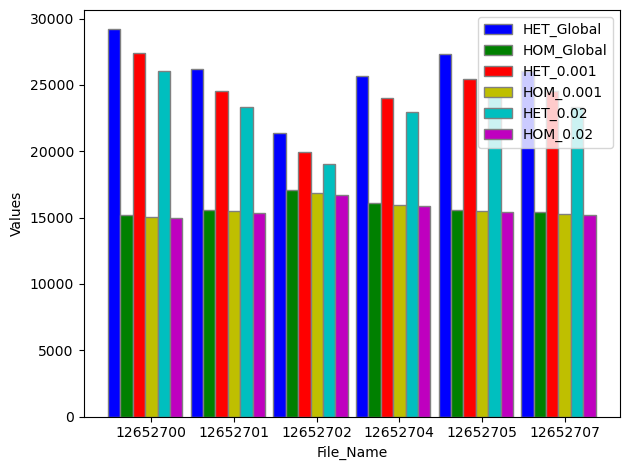

In [90]:
import matplotlib.pyplot as plt

# Given data
File_Name = [12652700, 12652701, 12652702, 12652704, 12652705, 12652707]
HET_Global = [29184, 26170, 21396, 25643, 27315, 26031]
HOM_Global = [15164, 15565, 17063, 16092, 15583, 15421]
HET_0_001 = [27410, 24530, 19921, 24039, 25478, 24505]
HOM_0_001 = [15050, 15464, 16863, 15956, 15468, 15297]
HET_0_02 = [26080, 23364, 18999, 22922, 24319, 23314]
HOM_0_02 = [14995, 15381, 16736, 15862, 15398, 15195]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = range(len(File_Name))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

# Create the bar graph
plt.bar(r1, HET_Global, color='b', width=bar_width, edgecolor='grey', label='HET_Global')
plt.bar(r2, HOM_Global, color='g', width=bar_width, edgecolor='grey', label='HOM_Global')
plt.bar(r3, HET_0_001, color='r', width=bar_width, edgecolor='grey', label='HET_0.001')
plt.bar(r4, HOM_0_001, color='y', width=bar_width, edgecolor='grey', label='HOM_0.001')
plt.bar(r5, HET_0_02, color='c', width=bar_width, edgecolor='grey', label='HET_0.02')
plt.bar(r6, HOM_0_02, color='m', width=bar_width, edgecolor='grey', label='HOM_0.02')

# Add xticks and labels
plt.xlabel('File_Name')
plt.xticks([r + 3 * bar_width for r in range(len(File_Name))], File_Name)
plt.ylabel('Values')

# Add a legend
plt.legend()

# Show the graph
plt.tight_layout()
plt.show()


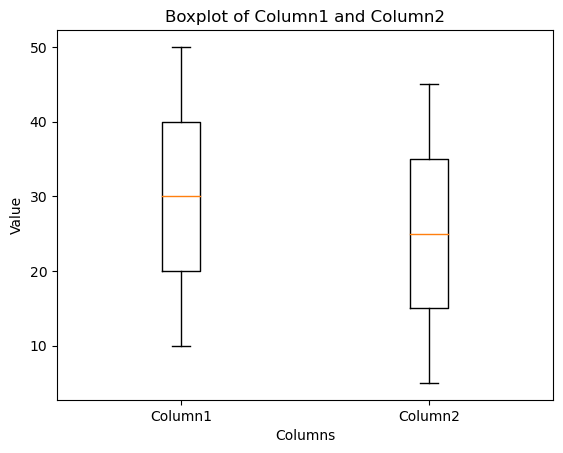

In [4]:
import pandas as pd
# Replace these with your actual data or load your data using pd.read_csv() or other methods
data = {
    'Column1': [10, 15, 20, 25, 30, 35, 40, 45, 50],
    'Column2': [5, 10, 15, 20, 25, 30, 35, 40, 45]
}

df = pd.DataFrame(data)

# Create a boxplot
plt.boxplot([df['Column1'], df['Column2']], labels=['Column1', 'Column2'])
plt.title('Boxplot of Column1 and Column2')
plt.ylabel('Value')
plt.xlabel('Columns')
plt.show()

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data, replace with your actual data
data = {
    'Zygosity': ['HET', 'HET', 'HOM', 'HOM'],
    'gnomADg_AF': [0.05, 0.1, 0.2, 0.3],
    'gnomADg_SAS_AF': [0.03, 0.08, 0.18, 0.25]
}

df = pd.DataFrame(data)

# Group the data by 'Zygosity'
grouped_data = df.groupby('Zygosity')

# Create a larger figure with higher DPI
fig = plt.figure(figsize=(8, 6), dpi=2000)

# Create a boxplot for each group
plt.boxplot([grouped_data.get_group('HET')['gnomADg_AF'], grouped_data.get_group('HET')['gnomADg_SAS_AF'],
             grouped_data.get_group('HOM')['gnomADg_AF'], grouped_data.get_group('HOM')['gnomADg_SAS_AF']],
            labels=['HET gnomADg_AF', 'HET gnomADg_SAS_AF', 'HOM gnomADg_AF', 'HOM gnomADg_SAS_AF'])

plt.title('Boxplot of gnomADg_AF and gnomADg_SAS_AF by Zygosity')
plt.ylabel('Value')
plt.xlabel('Columns')

# Save the figure with higher quality
#plt.savefig('boxplot.png', dpi=2000)

# Show the plot
plt.show()

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data, replace with your actual data
data = {
    'Zygosity': ['HET', 'HET', 'HOM', 'HOM'],
    'gnomADg_AF': [0.05, 0.1, 0.2, 0.3],
    'gnomADg_SAS_AF': [0.03, 0.08, 0.18, 0.25]
}

df = pd.DataFrame(data)

# Group the data by 'Zygosity'
grouped_data = df.groupby('Zygosity')

# Create a larger figure with higher DPI
fig = plt.figure(figsize=(8, 6), dpi=2000)

# Positions for HET and HOM boxplots
het_positions = [1, 2]
hom_positions = [4, 5]

# Boxplot for HET
plt.boxplot([grouped_data.get_group('HET')['gnomADg_AF'], grouped_data.get_group('HET')['gnomADg_SAS_AF']],
            positions=het_positions, labels=['HET gnomADg_AF', 'HET gnomADg_SAS_AF'])

# Boxplot for HOM
plt.boxplot([grouped_data.get_group('HOM')['gnomADg_AF'], grouped_data.get_group('HOM')['gnomADg_SAS_AF']],
            positions=hom_positions, labels=['HOM gnomADg_AF', 'HOM gnomADg_SAS_AF'])

# Set x-axis limits and labels
plt.xlim(0, 6)
plt.xticks([1.5, 4.5], ['HET', 'HOM'])

plt.title('Boxplot of gnomADg_AF and gnomADg_SAS_AF by Zygosity')
plt.ylabel('Value')
plt.xlabel('Zygosity')

# Save the figure with higher quality
plt.savefig('boxplot.png', dpi=2000)

# Show the plot
plt.show()
